# Data from New York State Counties between 1980 - 2019.
# Tell me where to live.

**Dylan Saez - DATS 6103 - Section 011 - Fall 2020**

The goal of this project is to analyze and underscore trends of all NYS counties, in an effort to boil the data down to a result, the data will be telling me where to live. 

For DATS 6103, the purpose of this project is to continue learning and improving skills in:
- Learning about Data Mining
- Learning to extract information from raw data using Python.
- State where the data came from
- State your data cleaning and preprocessing
- Indicate any classifications, clusters, associations/correlations, etc.
- Discuss your predictions you might have and your reasoning behind them
- Describe your learning process
- Present an overall conclusion


The above objectives will be accomplished by: 
    Comparing all New York State counties (62) on the basis of: 
        - House Price Index (HPI)
        - Per Capita Personal Income
        - Unemployment Rate
        - Resident Population
        - Estimte of Median Household Income
We will also compare the values against the values of New York State as a whole.

Some helpful definitions: 
    - House Price Index (HPI): 
    - Per Capita Personal Income: Measure of the amount of money 
         earned per person in a specified location. 
    - Unemployment Rate: Measured by dividing the number of persons   
         unemployed by the number of individuals in the labor force 
    - Resident Population: Measure of all residents living in a 
         specified location
    - Estimate of Median Household Income: 
         Measured by specifying the median (middle number) in a 
         specified area where 50% of results earn higher and 50% of 
         results earn less

The data for this project was sourced from the St. Louis Federal Reserve Regional Bank's Federal Reserve Economic Data (FRED).

(For Resident Population) There are 62 counties in New York State. 3 of them, Hamilton, Lewis, and Schoharie are among the least populated counties in New York and have no data available for "House Price Index (HPI)."

# Hypothetical Scenario:
I only want to live in New York State. I want to live in a highly populated area because I thoroughly enjoy the bustle of highly populated areas.

I work as a Data Scientist, I make $140,000/year, which is above average for Data Scientists in NYS (https://www.glassdoor.com/Salaries/new-york-state-data-scientist-salary-SRCH_IL.0,14_IS428_KO15,29.htm?clickSource=searchBtn) 

Housing costs are not an issue for me, I can live anywhere. 

I would like a county that seems to sustain itself even in the worst of times economically or in general, bad events.

Most importantly, I am risk averse.

Now, I ask the data to tell me what county most closely represents my wishes above.

# Step 1: Import, Clean, Preprocess

In [403]:
#Before importing our data, we need packages that we will later use to analyze our data.
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2') #palette
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid") #clearer
import matplotlib.ticker as ticker
#pd.options.display.float_format = '{:.2f}'.format #values are two decimal places
import warnings
warnings.filterwarnings('ignore')
from matplotlib.animation import FuncAnimation
#!pip install plotly
import plotly as py
import plotly.express as px
#!pip install chart_studio
import chart_studio.plotly as py
import matplotlib.animation as animation
from matplotlib import style

To be able to analyze our data, we must import, clean, and preprocess it to enable effective information extraction from it.

Below are numerous steps for cleaning and reshaping the data. FRED only allowed 12 counties at a time to be downloaded, thus, we have several tables when importing the csv files.

In [404]:
#Import
hpi1 = pd.read_csv("HPI PART 1.csv")
hpi2 = pd. read_csv("HPI PART 2.csv")
hpi3 = pd.read_csv("HPI PART3.csv")
hpi4 = pd.read_csv("HPI PART 4.csv")
hpi5 = pd.read_csv("HPI PART5.csv")
hpiNYS = pd.read_csv("NY HPI.csv")
#The FRED Data only allows 12 rows at a time to be added to an aggregate
#graph, thus I had to download the data in multiple parts. 
# I will be combining into 1 table at a later time.

In [405]:
#check tables
hpi1.head(2)
#hpi2.head(2)
#hpi3.head(2)
hpi4.head(2)
hpi5.head(2)

observation_date  Orleans County  Oswego County  Rensselaer County  \
0       1980-01-01             NaN            NaN              43.86   
1       1981-01-01             NaN            NaN                NaN   

   St. Lawrence County  Tioga County  Tompkins County  Ulster County  \
0                  NaN           NaN            44.22          33.70   
1                  NaN           NaN            44.87          37.68   

   Wayne County  Warren County  Washington County  Unnamed: 11  Unnamed: 12  \
0         49.72            NaN                NaN          NaN          NaN   
1         47.47            NaN                NaN          NaN          NaN   

   Unnamed: 13  
0          NaN  
1          NaN

In [406]:
#New York State Data

In [407]:
hpiNYS.head(2)

observation_date  New York State
0       1980-01-01          108.26
1       1981-01-01          112.97

In [408]:
#merge all data collected to one table
hpi_first_step = pd.merge(hpi1, hpi2, on = "observation_date", how = "inner")
hpi_second_step = pd.merge(hpi_first_step, hpi3, on = "observation_date", how = "inner")
hpi_third_step = pd.merge(hpi_second_step, hpi4, on = "observation_date", how = "inner")
hpi_fourth_step = pd.merge(hpi_third_step, hpi5, on = "observation_date", how = "inner")
hpi_fifth_step = pd.merge(hpi_fourth_step, hpiNYS, on = "observation_date", how = "inner")
hpi_data_i = hpi_fifth_step
hpi_data = hpi_data_i.set_index(['observation_date'])
hpi_data.head()
#Good for now

Westchester County  Nassau County  New York County  \
observation_date                                                       
1980-01-01                     27.22          24.46              NaN   
1981-01-01                     31.50          27.52              NaN   
1982-01-01                     34.53          32.19              NaN   
1983-01-01                     36.67          35.69              NaN   
1984-01-01                     43.82          43.84              NaN   

                  Queens County  Suffolk County  Bronx County  \
observation_date                                                
1980-01-01                24.36           23.94         26.69   
1981-01-01                27.60           28.02         28.86   
1982-01-01                30.34           33.26         32.23   
1983-01-01                33.53           36.38         36.42   
1984-01-01                38.99           43.44         42.39   

                  Montgomery County  Saratoga County  Chautauqua County  \
observation_date                                                          
1980-01-01                      NaN            44.90              51.66   
1981-01-01                      NaN            42.63              52.62   
1982-01-01                      NaN            41.85              49.87   
1983-01-01                      NaN            49.17              56.05   
1984-01-01                      NaN            54.23              56.56   

                  Niagara County       ...        Tioga County  \
observation_date                       ...                       
1980-01-01                 50.60       ...                 NaN   
1981-01-01                 50.50       ...                 NaN   
1982-01-01                 49.99       ...                 NaN   
1983-01-01                 53.17       ...                 NaN   
1984-01-01                 54.69       ...                 NaN   

                  Tompkins County  Ulster County  Wayne County  Warren County  \
observation_date                                                                
1980-01-01                  44.22          33.70         49.72            NaN   
1981-01-01                  44.87          37.68         47.47            NaN   
1982-01-01                  49.12          43.14         52.54            NaN   
1983-01-01                  52.71          48.05         58.59            NaN   
1984-01-01                  55.68          52.72         66.06            NaN   

                  Washington County  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
observation_date                                                             
1980-01-01                      NaN          NaN          NaN          NaN   
1981-01-01                      NaN          NaN          NaN          NaN   
1982-01-01                      NaN          NaN          NaN          NaN   
1983-01-01                      NaN          NaN          NaN          NaN   
1984-01-01                      NaN          NaN          NaN          NaN   

                  New York State  
observation_date                  
1980-01-01                108.26  
1981-01-01                112.97  
1982-01-01                129.28  
1983-01-01                136.86  
1984-01-01                159.73  

[5 rows x 62 columns]

In [409]:
#Per Capita Data
percapita1 = pd.read_csv("PerCapita 1.csv")
percapita2 = pd.read_csv("PerCapita 2.csv")
percapita3 = pd.read_csv("PerCapita 3.csv")
percapita4 = pd.read_csv("PerCapita 4.csv")
percapita5 = pd.read_csv("PerCapita 5.csv")
percapita6 = pd.read_csv("Per Capita 6.csv")
percapitaNYS = pd.read_csv("NYS Per Capita.csv")

In [410]:
#Check tables
percapita1.head(2)
percapita2.head(2)
percapita3.head(2)
percapita4.head(2)
percapita5.head(2)
percapita6.head(2)

observation_date  Warren County  Washington County
0       1980-01-01           8534               7318
1       1981-01-01           9413               8154

In [411]:
percapitaNYS.head(2)

observation_date  New York State
0       1980-01-01           11001
1       1981-01-01           12277

In [412]:
percapita_first_step = pd.merge(percapita1, percapita2, on = 'observation_date', how = 'inner')
percapita_second_step = pd.merge(percapita_first_step, percapita3, on = 'observation_date', how = 'inner' )
percapita_third_step = pd.merge(percapita_second_step, percapita4, on ='observation_date', how = 'inner')
percapita_fourth_step = pd.merge(percapita_third_step, percapita5, on = 'observation_date', how = 'inner')
percapita_fifth_step = pd.merge(percapita_fourth_step, percapita6, on = 'observation_date', how = 'inner')
percapita_sixth_step = pd.merge(percapita_fifth_step, percapitaNYS, on = 'observation_date', how = 'inner')
per_capita_data_i = percapita_sixth_step
per_capita_data = per_capita_data_i.set_index(['observation_date'])
per_capita_data.head()

Westchester County  New York County  Queens County  \
observation_date                                                       
1980-01-01                     15547            18174          10750   
1981-01-01                     17644            20152          12053   
1982-01-01                     19214            21747          13150   
1983-01-01                     20449            23983          14033   
1984-01-01                     22767            25687          15415   

                  Rockland County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1980-01-01                  12701                7636            10529   
1981-01-01                  14233                8305            11917   
1982-01-01                  15383                8936            13350   
1983-01-01                  16429                9390            14361   
1984-01-01                  18207               10366            16055   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1980-01-01                 8941          8127          10720          14830   
1981-01-01                 9922          9062          11769          16655   
1982-01-01                10820          9825          12824          18072   
1983-01-01                11434         10387          13885          19290   
1984-01-01                12563         11282          15348          21755   

                       ...        St. Lawrence County  Saratoga County  \
observation_date       ...                                               
1980-01-01             ...                       6869             9476   
1981-01-01             ...                       7626            10706   
1982-01-01             ...                       8353            11848   
1983-01-01             ...                       9045            12588   
1984-01-01             ...                       9842            13993   

                  Schoharie County  Tioga County  Tompins County  \
observation_date                                                   
1980-01-01                    7286          8674            7468   
1981-01-01                    8067          9576            8560   
1982-01-01                    8771         10612            9502   
1983-01-01                    9266         11393           10698   
1984-01-01                   10267         12566           11932   

                  Ulster County  Wayne County  Warren County  \
observation_date                                               
1980-01-01                 8986          9056           8534   
1981-01-01                 9992         10058           9413   
1982-01-01                11215         11147          10293   
1983-01-01                12271         11512          11073   
1984-01-01                13699         12636          12416   

                  Washington County  New York State  
observation_date                                     
1980-01-01                     7318           11001  
1981-01-01                     8154           12277  
1982-01-01                     8810           13327  
1983-01-01                     9442           14286  
1984-01-01                    10454           15749  

[5 rows x 64 columns]

In [413]:
#Unemployment Rate Data
unemp1 = pd.read_csv("Unemployment 1.csv")
unemp2 = pd.read_csv("Unemployment 2.csv")
unemp3 = pd.read_csv("Unemployment 3.csv")
unemp4 = pd.read_csv("Unemployment 4.csv")
unemp5 = pd.read_csv("Unemployment 5.csv")
unemp6 = pd.read_csv("Unemployment 6.csv")


In [414]:
unempNYS = pd.read_csv("NYS Unemployment Rate.csv")

In [415]:
#Check tables
unemp1.head(2)
unemp2.head(2)
unemp3.head(2)
unemp4.head(2)
unemp5.head(2)
unemp6.head(2)
unempNYS.head(2)

observation_date   NYS
0       1976-01-01  10.2
1       1977-01-01   9.1

In [416]:
unemp_first_step = pd.merge(unemp1, unemp2, on="observation_date", how = 'inner')
unemp_second_step = pd.merge(unemp_first_step, unemp3, on = 'observation_date', how='inner')
unemp_third_step = pd.merge(unemp_second_step, unemp4, on = 'observation_date', how = 'inner')
unemp_fourth_step = pd.merge(unemp_third_step, unemp5, on = 'observation_date', how = 'inner')
unemp_fifth_step = pd.merge(unemp_fourth_step, unemp6, on = 'observation_date', how = 'inner')
unemp_sixth_step = pd.merge(unemp_fifth_step, unempNYS, on = 'observation_date', how = 'inner')
unemp_data_i = unemp_sixth_step
unemp_data = unemp_data_i.set_index(['observation_date'])
unemp_data.head()

Westchester County  New York County  Queens County  \
observation_date                                                       
1990-01-01                       3.5              6.0            6.0   
1991-01-01                       5.4              7.7            8.0   
1992-01-01                       6.2              9.4           10.6   
1993-01-01                       5.5              9.0            9.7   
1994-01-01                       4.9              7.6            8.3   

                  Rockland County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1990-01-01                    3.3                 6.4              3.0   
1991-01-01                    5.6                 9.0              5.2   
1992-01-01                    6.4                10.0              6.7   
1993-01-01                    6.2                 8.8              8.6   
1994-01-01                    5.3                 8.3              6.9   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1990-01-01                  4.5           8.4            3.0            3.7   
1991-01-01                  6.6          10.4            4.7            5.7   
1992-01-01                  7.0          13.1            5.0            7.0   
1993-01-01                  6.2          12.2            4.2            5.9   
1994-01-01                  5.3          10.1            4.1            5.1   

                 ...   St. Lawrence County  Saratoga County  Schoharie County  \
observation_date ...                                                            
1990-01-01       ...                   8.0              3.6               5.2   
1991-01-01       ...                   9.8              5.5               7.2   
1992-01-01       ...                   9.8              5.8               8.4   
1993-01-01       ...                   8.9              5.0               6.8   
1994-01-01       ...                   9.4              4.8               6.2   

                  Tioga County  Tompkins County  Ulster County  Wayne County  \
observation_date                                                               
1990-01-01                 4.3              3.8            3.7           4.8   
1991-01-01                 5.9              4.3            5.9           6.5   
1992-01-01                 6.6              4.7            6.6           7.3   
1993-01-01                 6.4              4.1            7.4           6.1   
1994-01-01                 6.8              3.8            6.6           6.1   

                  Warren County  Washington County  NYS  
observation_date                                         
1990-01-01                  5.9                5.4  5.4  
1991-01-01                  8.8                7.4  7.3  
1992-01-01                  9.5                8.1  8.6  
1993-01-01                  8.4                6.8  7.9  
1994-01-01                  7.8                6.3  6.9  

[5 rows x 64 columns]

In [417]:
#Resident Population Data
# In Thousands of Persons
pop1 = pd.read_csv("Population1.csv")
pop2 = pd.read_csv("Population 2.csv")
pop3 = pd.read_csv("Population 3.csv")
pop4 = pd.read_csv("Population 4.csv")
pop5 = pd.read_csv("Population Part 5.csv")
pop6 = pd.read_csv("Population 6.csv")
popNYS = pd.read_csv("NYS Population.csv")

In [418]:
#Check tables
#pop1.head(2)
pop2.head(2)
#pop3.head(2)
#pop4.head(2)
#pop5.head(2)
#pop6.head(2)

observation_date  Schenectady County  Kings County  Putnam County  \
0       1970-01-01             161.078      2602.012         56.696   
1       1971-01-01             162.600      2609.000         58.600   

   Richmond County  Allegany County  Cayuga County  Chautauqua County  \
0          295.443           46.458         77.439            147.305   
1          304.900           48.100         78.900            150.100   

   Chenango County  Clinton County  Columbia County  Cortland County  \
0           46.368          72.934           51.519           45.894   
1           46.600          76.500           54.200           45.800   

   Unnamed: 12  
0          NaN  
1          NaN

In [419]:
popNYS.head(2)

observation_date  New York State
0       1980-01-01       17566.754
1       1981-01-01       17567.734

In [420]:
pop_first_step = pd.merge(pop1, pop2, on = 'observation_date', how = 'inner')
pop_second_step = pd.merge(pop_first_step, pop3, on = 'observation_date', how = 'inner')
pop_third_step = pd.merge(pop_second_step, pop4, on = 'observation_date', how = 'inner')
pop_fourth_step = pd.merge(pop_third_step, pop5, on = 'observation_date', how = 'inner')
pop_fifth_step = pd.merge(pop_fourth_step, pop6, on = 'observation_date', how = 'inner')
pop_sixth_step = pd.merge(pop_fifth_step, popNYS, on ='observation_date', how = 'inner')
pop_data_i = pop_sixth_step
pop_data = pop_data_i.set_index(['observation_date'])
pop_data.head()


Westchester County  Queens County  Rockland County  \
observation_date                                                       
1980-01-01                   866.599       1891.325          259.530   
1981-01-01                   866.593       1902.587          259.063   
1982-01-01                   865.695       1911.597          260.232   
1983-01-01                   869.852       1931.294          261.573   
1984-01-01                   875.597       1943.568          262.931   

                  New York County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1980-01-01               1428.285              85.697          245.055   
1981-01-01               1426.006              86.080          246.001   
1982-01-01               1422.332              85.877          246.676   
1983-01-01               1436.028              85.732          248.683   
1984-01-01               1457.879              85.296          250.646   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1980-01-01              253.466      1168.972        285.909       1321.582   
1981-01-01              253.454      1163.912        286.690       1314.360   
1982-01-01              253.352      1164.329        287.159       1314.841   
1983-01-01              253.883      1175.406        287.780       1322.686   
1984-01-01              253.969      1179.413        288.450       1319.985   

                       ...        St. Lawrence County  Saratoga County  \
observation_date       ...                                               
1980-01-01             ...                    114.347          153.759   
1981-01-01             ...                    113.535          154.865   
1982-01-01             ...                    112.660          155.572   
1983-01-01             ...                    112.692          157.424   
1984-01-01             ...                    113.003          159.213   

                  Schoharie County  Tioga County  Tompkins County  \
observation_date                                                    
1980-01-01                  29.710        49.812           87.085   
1981-01-01                  29.638        50.315           88.150   
1982-01-01                  29.727        50.102           88.458   
1983-01-01                  30.445        50.060           88.828   
1984-01-01                  30.216        50.122           89.080   

                  Ulster County  Wayne County  Warren County  \
observation_date                                               
1980-01-01              158.158        84.581         54.854   
1981-01-01              157.625        85.376         55.255   
1982-01-01              157.770        85.837         55.031   
1983-01-01              158.414        85.796         55.136   
1984-01-01              159.557        86.257         55.189   

                  Washington County  New York State  
observation_date                                     
1980-01-01                   54.795       17566.754  
1981-01-01                   54.575       17567.734  
1982-01-01                   54.737       17589.738  
1983-01-01                   54.910       17686.905  
1984-01-01                   55.347       17745.684  

[5 rows x 64 columns]

In [421]:
#Estimate of Median Household Income Data
med1 = pd.read_csv("Median Income 1.csv")
med2 = pd.read_csv("Median Income 2.csv")
med3 = pd.read_csv("Median 3.csv")
med4 = pd.read_csv("Median 4.csv")
med5 = pd.read_csv("Median 5.csv")
med6 = pd.read_csv("Median 6.csv")
medNYS = pd.read_csv("NYS Median Income.csv")

In [422]:
#Check tables
med1.head(2)
med2.head(2)
med3.head(2)
med4.head(2)
med5.head(2)
med6.head(2)

observation_date  Warren County  Washington County
0       1989-01-01        28304.0            26354.0
1       1990-01-01            NaN                NaN

In [423]:
med_first_step = pd.merge(med1, med2, on = 'observation_date', how = 'inner')
med_second_step = pd.merge(med_first_step, med3, on ='observation_date', how = 'inner')
med_third_step = pd.merge(med_second_step, med4, on = 'observation_date', how = 'inner')
med_fourth_step = pd.merge(med_third_step, med5, on = 'observation_date', how = 'inner')
med_fifth_step = pd.merge(med_fourth_step, med6, on = 'observation_date', how = 'inner')
med_sixth_step = pd.merge(med_fifth_step, medNYS, on = 'observation_date', how = 'inner')
median_data_i = med_sixth_step
median_data = median_data_i.dropna()
median_data = median_data.set_index('observation_date')
median_data.head()

Westchester County  New York County  Queens County  \
observation_date                                                       
1989-01-01                   42303.0          27667.0        30900.0   
1993-01-01                   48830.0          31962.0        31970.0   
1995-01-01                   53043.0          34405.0        34115.0   
1997-01-01                   55040.0          38224.0        35820.0   
1998-01-01                   56865.0          41590.0        36480.0   

                  Rockland County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1989-01-01                46458.0             24119.0          40134.0   
1993-01-01                52728.0             27109.0          43785.0   
1995-01-01                56007.0             29439.0          43491.0   
1997-01-01                58362.0             31348.0          47828.0   
1998-01-01                59898.0             32057.0          50370.0   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1989-01-01              26415.0       19881.0        32283.0        48820.0   
1993-01-01              30065.0       21454.0        37462.0        53547.0   
1995-01-01              32643.0       22225.0        38784.0        58155.0   
1997-01-01              34668.0       24031.0        40490.0        61026.0   
1998-01-01              35422.0       25750.0        41604.0        61096.0   

                       ...        St. Lawrence County  Saratoga County  \
observation_date       ...                                               
1989-01-01             ...                    24095.0          35392.0   
1993-01-01             ...                    28047.0          40806.0   
1995-01-01             ...                    28861.0          43786.0   
1997-01-01             ...                    31169.0          46290.0   
1998-01-01             ...                    32418.0          48375.0   

                  Schoharie County  Tioga County  Tompkins County  \
observation_date                                                    
1989-01-01                 23996.0       30365.0          28235.0   
1993-01-01                 28852.0       34508.0          32809.0   
1995-01-01                 31010.0       35554.0          33941.0   
1997-01-01                 33209.0       38503.0          36822.0   
1998-01-01                 34777.0       40155.0          38797.0   

                  Ulster County  Wayne County  Warren County  \
observation_date                                               
1989-01-01              30706.0       32491.0        28304.0   
1993-01-01              35850.0       36270.0        33446.0   
1995-01-01              36387.0       39431.0        35145.0   
1997-01-01              38162.0       40181.0        37096.0   
1998-01-01              40425.0       40842.0        37812.0   

                  Washington County  New York State  
observation_date                                     
1989-01-01                  26354.0           31496  
1993-01-01                  30699.0           31697  
1995-01-01                  32358.0           33028  
1997-01-01                  33905.0           35798  
1998-01-01                  34441.0           37394  

[5 rows x 64 columns]

Our tables:
- hpi_data
- per_capita_data
- unemp_data
- pop_data
- median_data

# Step 2: Analyze each relation to inch closer to the county I should live in

# 2a) Residents per County

**Remember**, I want to live in a highly populated county. I enjoy the hustle and bustle.

In [424]:
#STEP 1: Since I know that we have NYS in the pop_data table, let's drop that column
#want to get rid of New York State
pop_data.drop('New York State', axis=1, inplace = True)
pop_data.columns
#Good

Index(['Westchester County', 'Queens County', 'Rockland County',
       'New York County', 'Cattaraugus County', 'Dutchess County',
       'Oneida County', 'Bronx County', 'Albany County', 'Nassau County',
       'Suffolk County', 'Genesee County', 'Schenectady County',
       'Kings County', 'Putnam County', 'Richmond County', 'Allegany County',
       'Cayuga County', 'Chautauqua County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County', 'Unnamed: 12',
       'Delaware County', 'Essex County', 'Franklin County', 'Fulton County',
       'Greene County', 'Hamilton County', 'Jefferson County', 'Lewis County',
       'Montgomery County', 'Otsego County', 'Schuyler County',
       'Seneca County', 'Steuben County', 'Sullivan County', 'Wyoming County',
       'Yates County', 'Broome County', 'Chemung County', 'Erie County',
       'Herkimer County', 'Livingston County', 'Madison County',
       'Monroe County', 'Niagara County', 'Onondaga County', 'Ontario C

In [425]:
pop_data.head()

Westchester County  Queens County  Rockland County  \
observation_date                                                       
1980-01-01                   866.599       1891.325          259.530   
1981-01-01                   866.593       1902.587          259.063   
1982-01-01                   865.695       1911.597          260.232   
1983-01-01                   869.852       1931.294          261.573   
1984-01-01                   875.597       1943.568          262.931   

                  New York County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1980-01-01               1428.285              85.697          245.055   
1981-01-01               1426.006              86.080          246.001   
1982-01-01               1422.332              85.877          246.676   
1983-01-01               1436.028              85.732          248.683   
1984-01-01               1457.879              85.296          250.646   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1980-01-01              253.466      1168.972        285.909       1321.582   
1981-01-01              253.454      1163.912        286.690       1314.360   
1982-01-01              253.352      1164.329        287.159       1314.841   
1983-01-01              253.883      1175.406        287.780       1322.686   
1984-01-01              253.969      1179.413        288.450       1319.985   

                        ...          Rensselaer County  St. Lawrence County  \
observation_date        ...                                                   
1980-01-01              ...                    151.966              114.347   
1981-01-01              ...                    151.835              113.535   
1982-01-01              ...                    151.806              112.660   
1983-01-01              ...                    151.974              112.692   
1984-01-01              ...                    152.136              113.003   

                  Saratoga County  Schoharie County  Tioga County  \
observation_date                                                    
1980-01-01                153.759            29.710        49.812   
1981-01-01                154.865            29.638        50.315   
1982-01-01                155.572            29.727        50.102   
1983-01-01                157.424            30.445        50.060   
1984-01-01                159.213            30.216        50.122   

                  Tompkins County  Ulster County  Wayne County  Warren County  \
observation_date                                                                
1980-01-01                 87.085        158.158        84.581         54.854   
1981-01-01                 88.150        157.625        85.376         55.255   
1982-01-01                 88.458        157.770        85.837         55.031   
1983-01-01                 88.828        158.414        85.796         55.136   
1984-01-01                 89.080        159.557        86.257         55.189   

                  Washington County  
observation_date                     
1980-01-01                   54.795  
1981-01-01                   54.575  
1982-01-01                   54.737  
1983-01-01                   54.910  
1984-01-01                   55.347  

[5 rows x 63 columns]

In [426]:
#Rename the columns for ease
pop_data = pop_data.rename({'1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
pop_data = pop_data.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
pop_data = pop_data.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
pop_data

Westchester County  Queens County  Rockland County  \
observation_date                                                       
1980                         866.599       1891.325          259.530   
1981                         866.593       1902.587          259.063   
1982                         865.695       1911.597          260.232   
1983                         869.852       1931.294          261.573   
1984                         875.597       1943.568          262.931   
1985                         873.022       1949.579          264.364   
1986                         871.631       1953.616          265.492   
1987                         872.497       1952.640          264.626   
1988                         874.759       1951.557          264.575   
1989                         875.043       1950.425          264.823   
1990                         875.578       1957.281          265.981   
1991                         878.615       1975.556          267.800   
1992                         885.146       1996.512          269.753   
1993                         890.061       2023.400          272.523   
1994                         893.531       2047.884          274.855   
1995                         897.945       2074.581          276.649   
1996                         902.174       2105.520          277.714   
1997                         905.632       2138.503          279.082   
1998                         911.628       2174.983          282.044   
1999                         918.532       2208.975          285.265   
2000                         925.549       2229.678          287.350   
2001                         935.243       2234.531          288.562   
2002                         941.715       2239.385          289.948   
2003                         944.982       2244.238          290.662   
2004                         947.268       2250.718          292.649   
2005                         947.719       2256.576          294.636   
2006                         945.050       2264.661          295.927   
2007                         946.443       2277.779          297.005   
2008                         949.846       2289.025          298.747   
2009                         955.833       2307.279          299.959   
2010                         950.601       2234.701          312.499   
2011                         956.262       2255.482          315.452   
2012                         959.585       2272.222          317.196   
2013                         964.567       2287.185          319.284   
2014                         967.044       2298.736          321.119   
2015                         968.773       2305.838          322.919   
2016                         970.267       2306.830          323.258   
2017                         969.689       2295.808          324.622   
2018                         968.213       2274.605          325.522   
2019                         967.506       2253.858          325.789   

                  New York County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1980                     1428.285              85.697          245.055   
1981                     1426.006              86.080          246.001   
1982                     1422.332              85.877          246.676   
1983                     1436.028              85.732          248.683   
1984                     1457.879              85.296          250.646   
1985                     1464.286              85.545          252.443   
1986                     1475.202              84.880          253.212   
1987                     1481.531              83.883          255.937   
1988                     1484.183              83.510          259.259   
1989                     1486.046              83.571          258.634   
1990                     1487.073              84.455          260.238   
1991                     1483.6

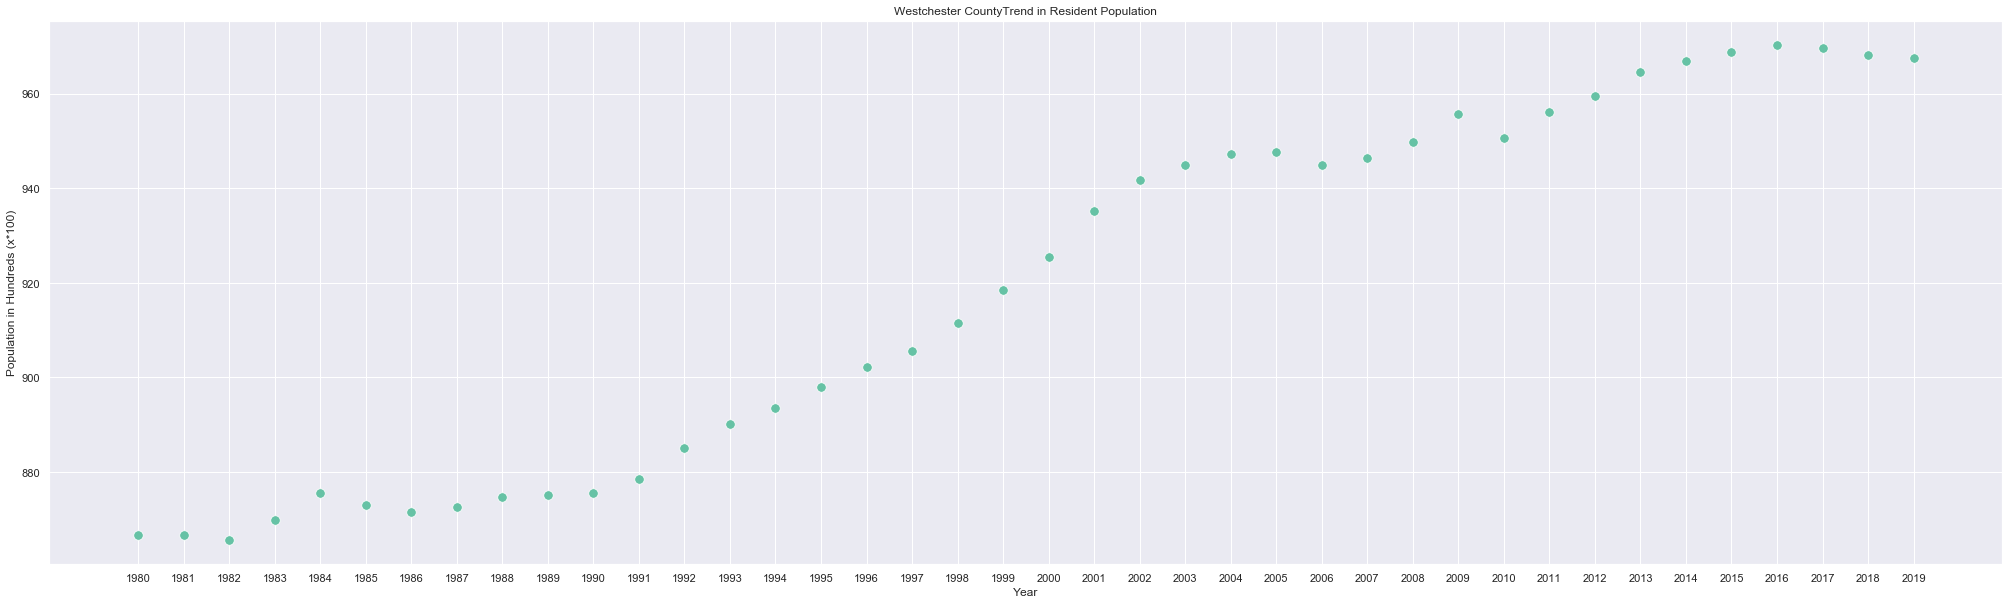

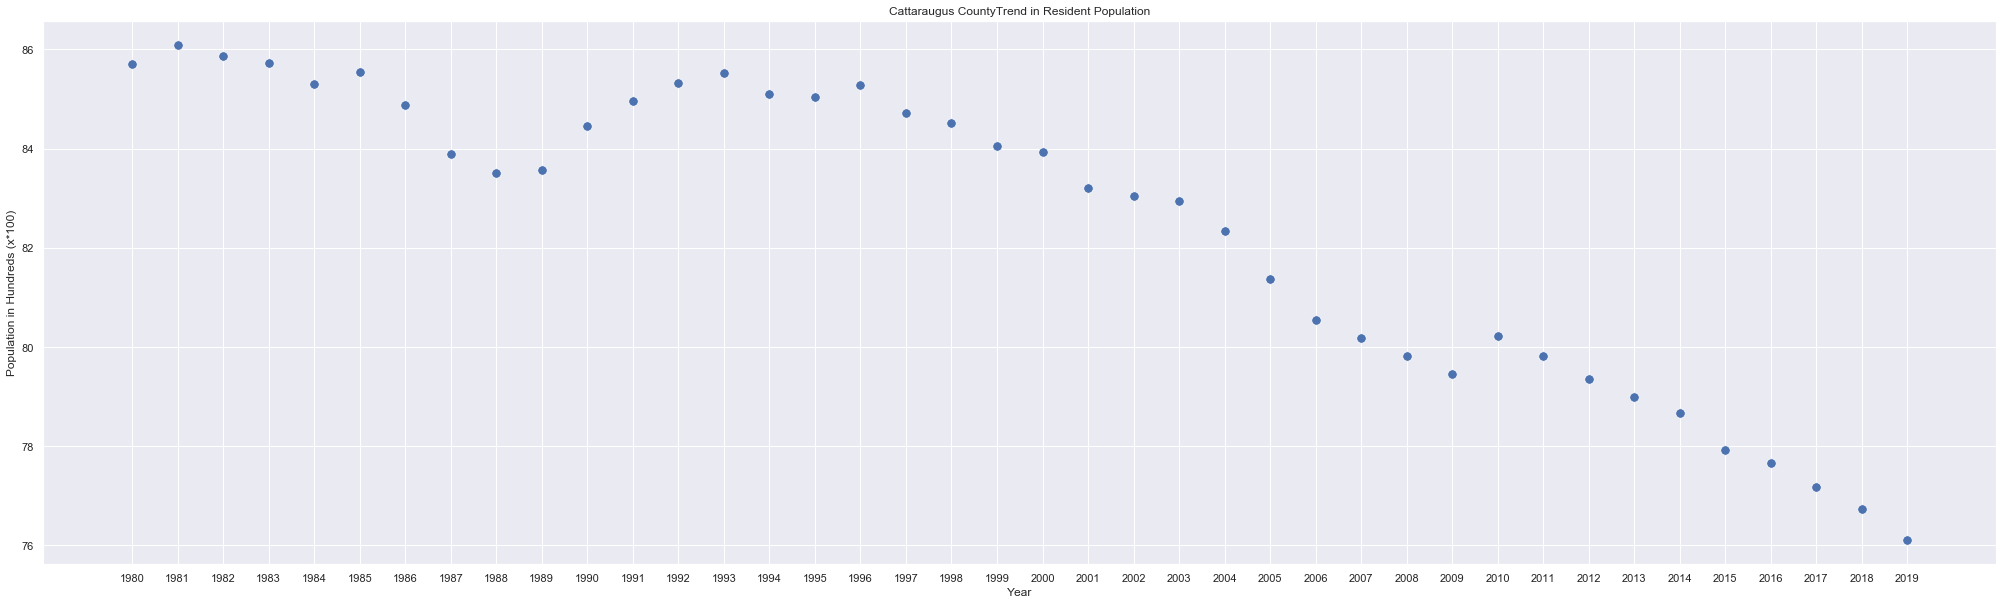

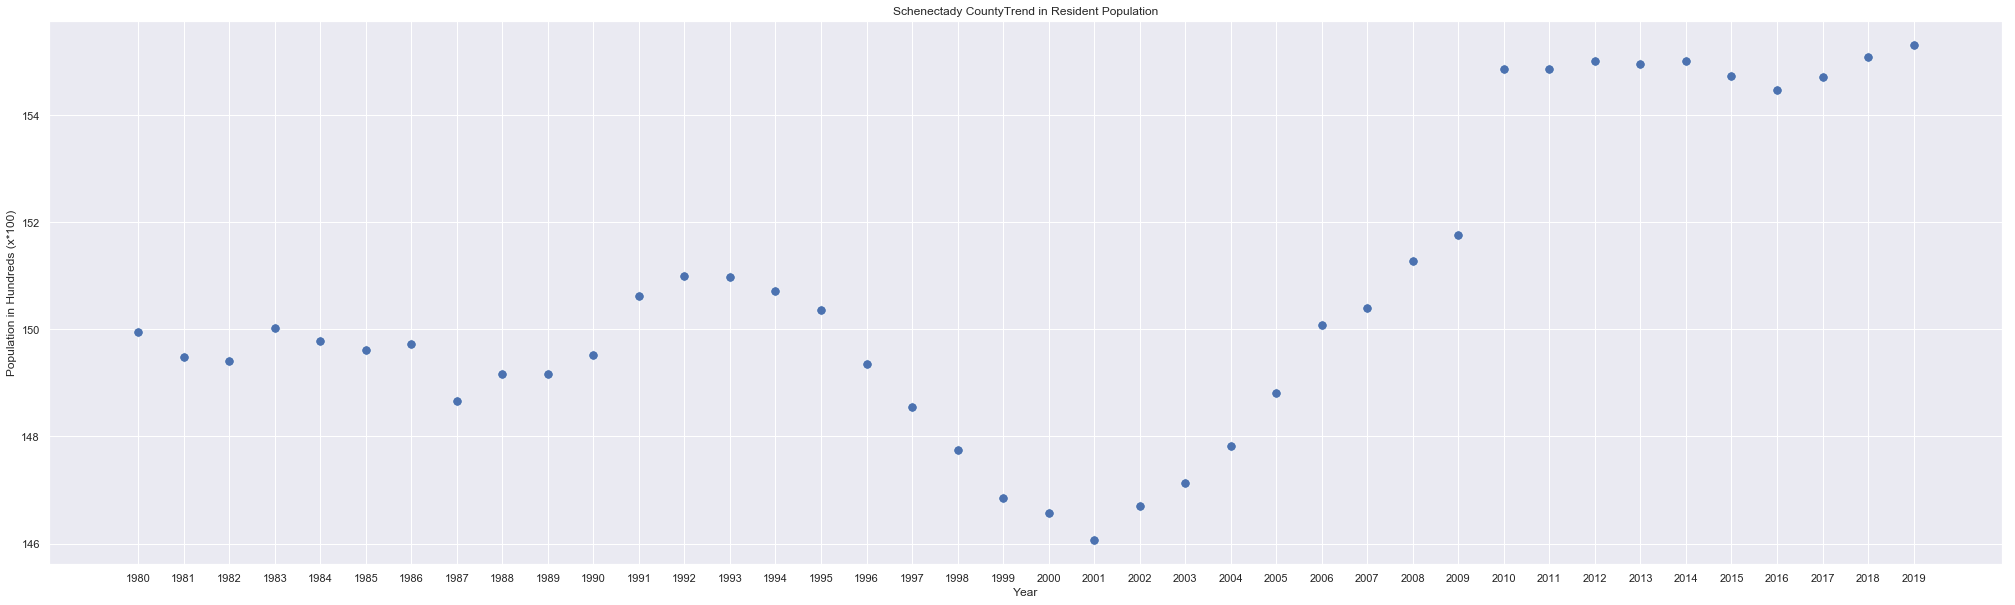

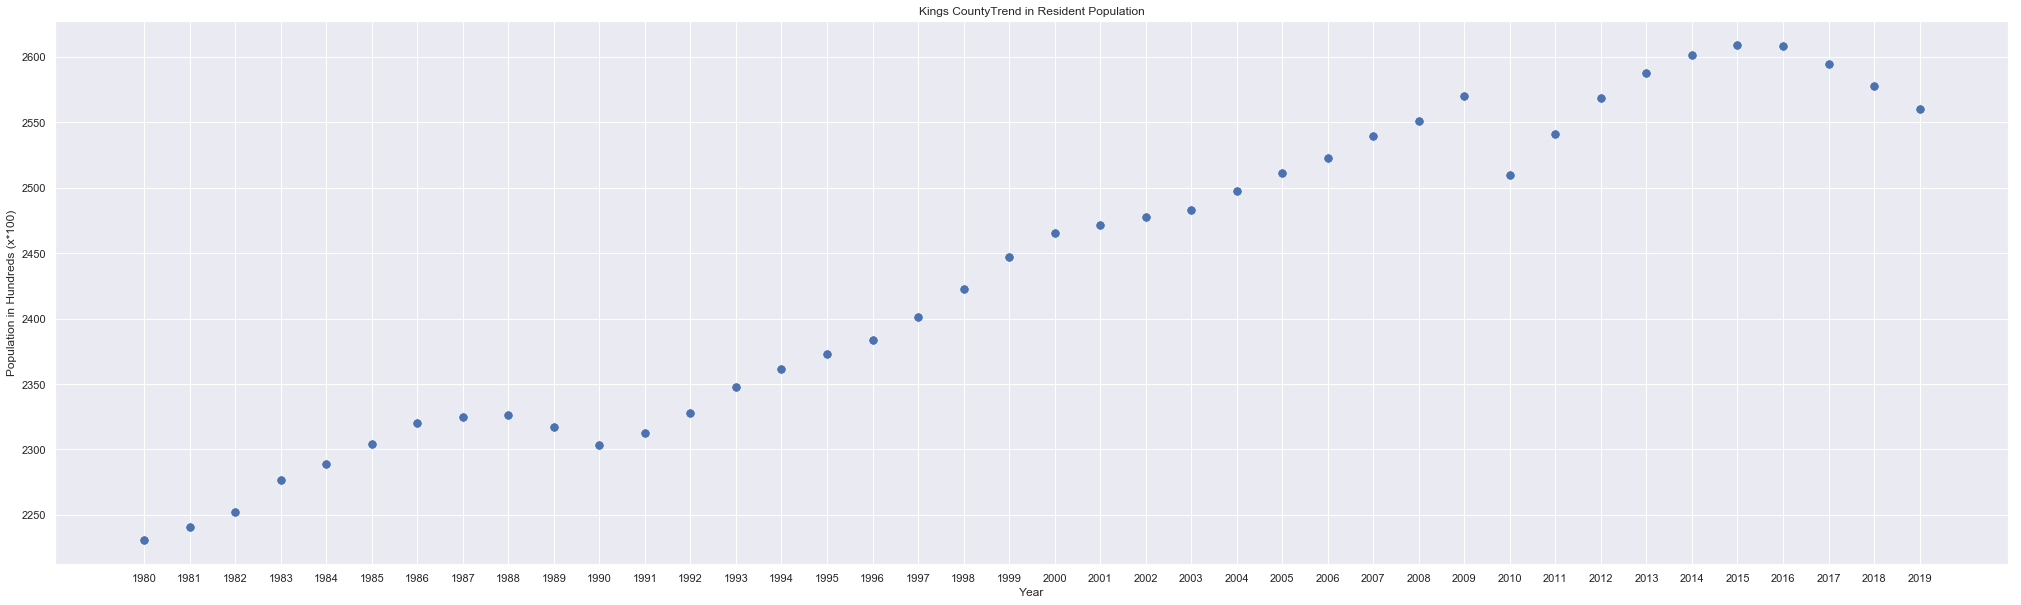

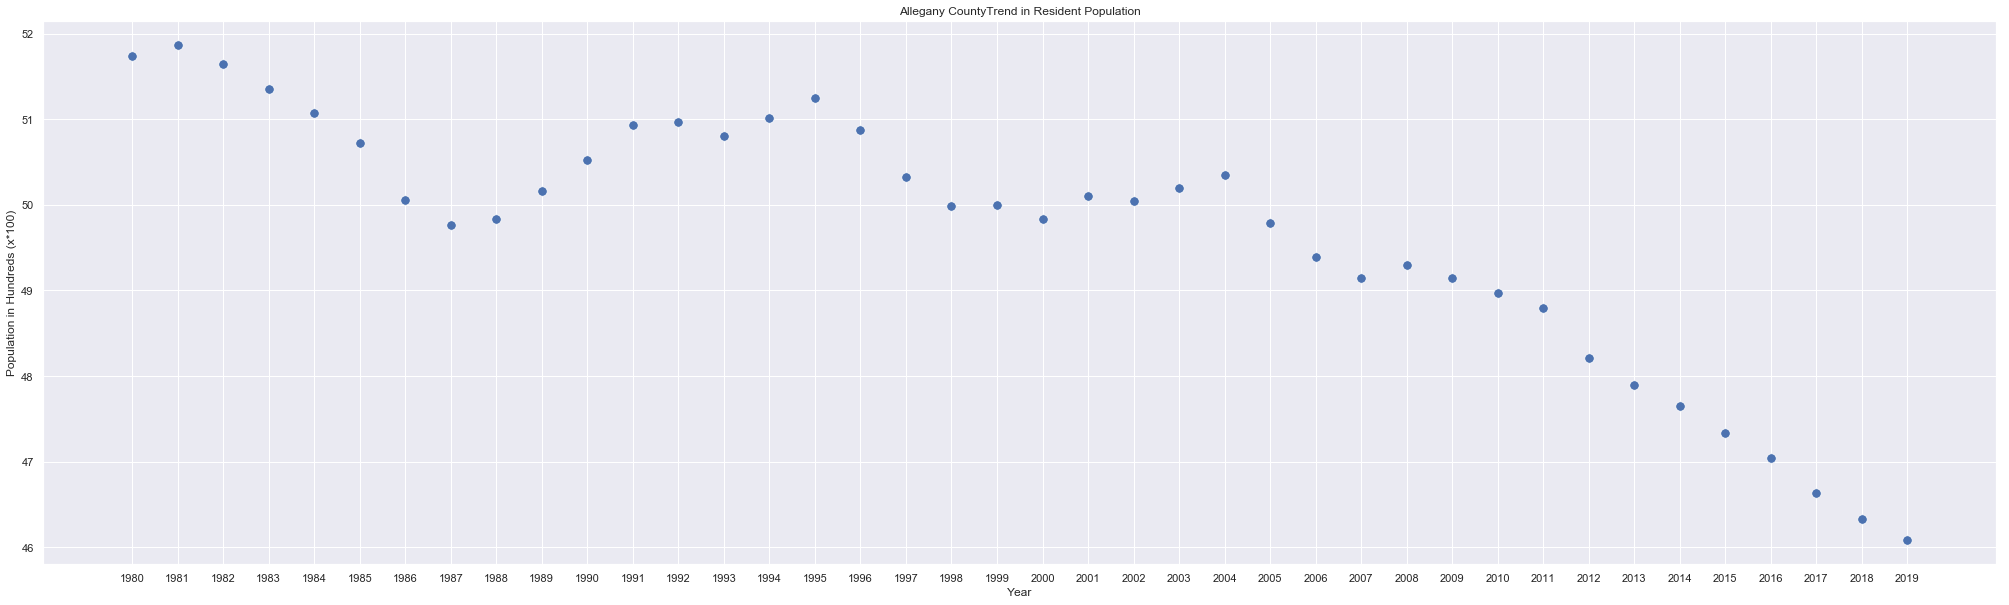

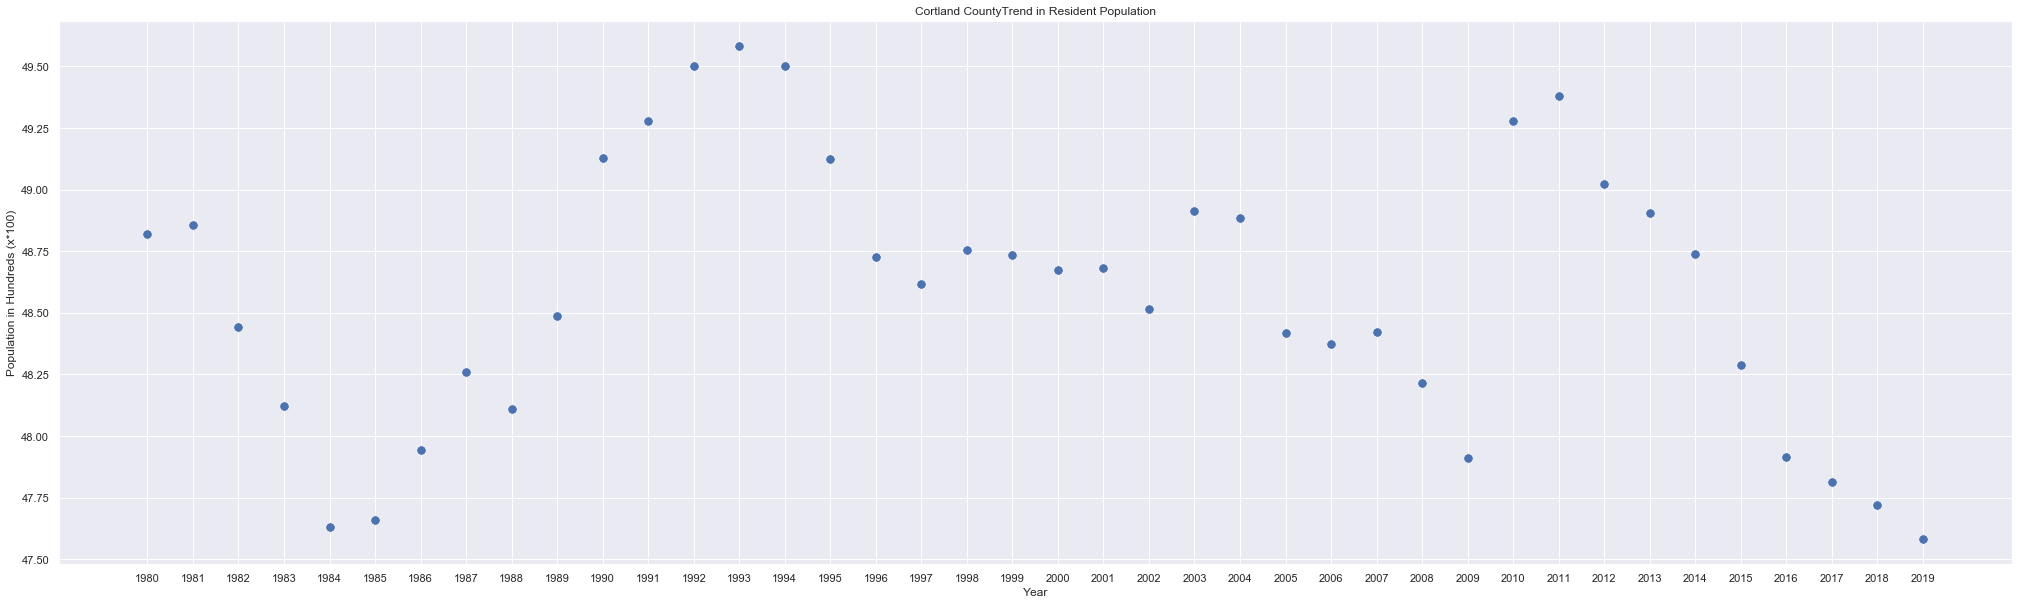

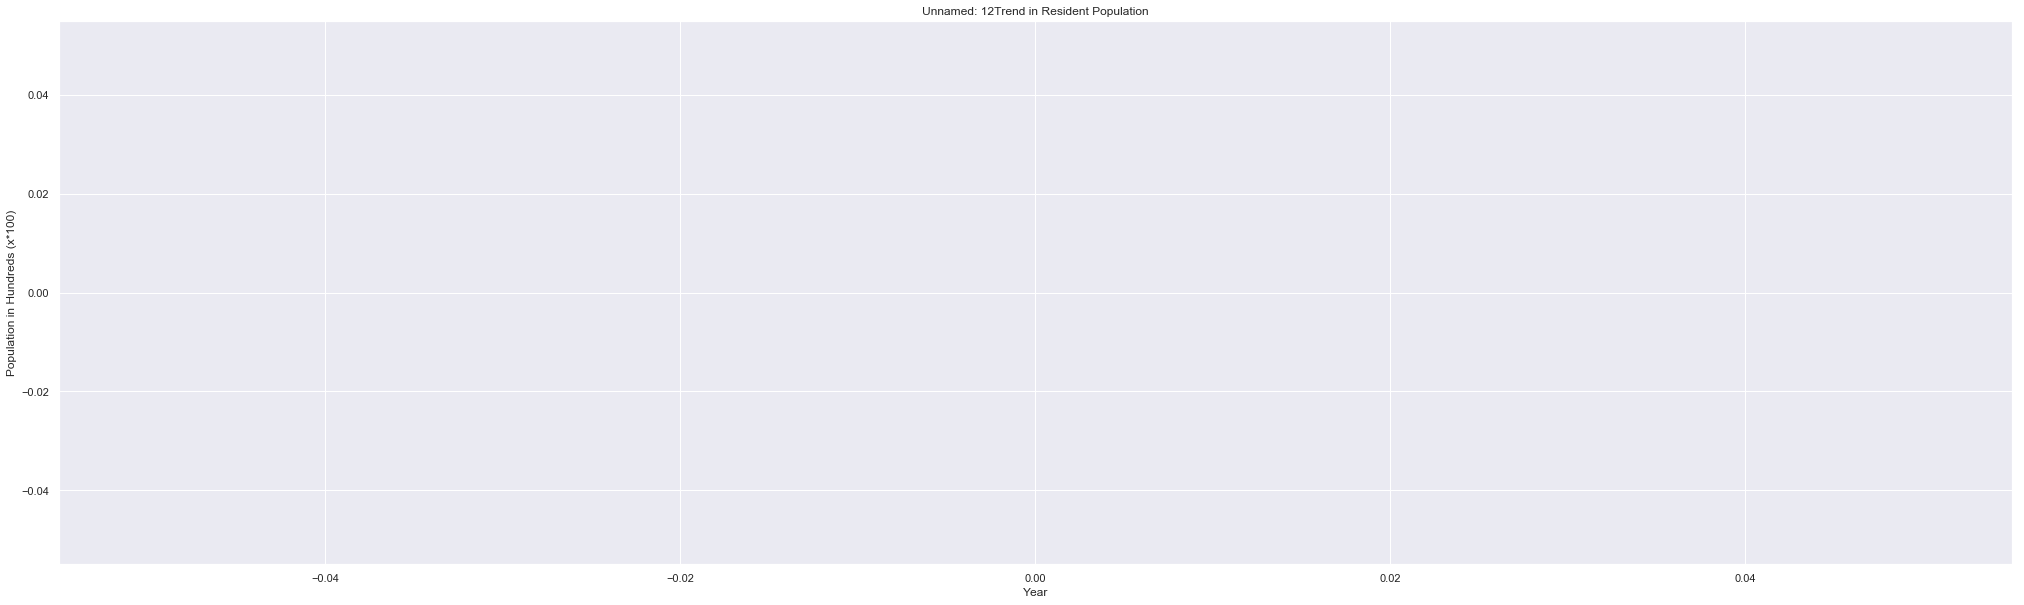

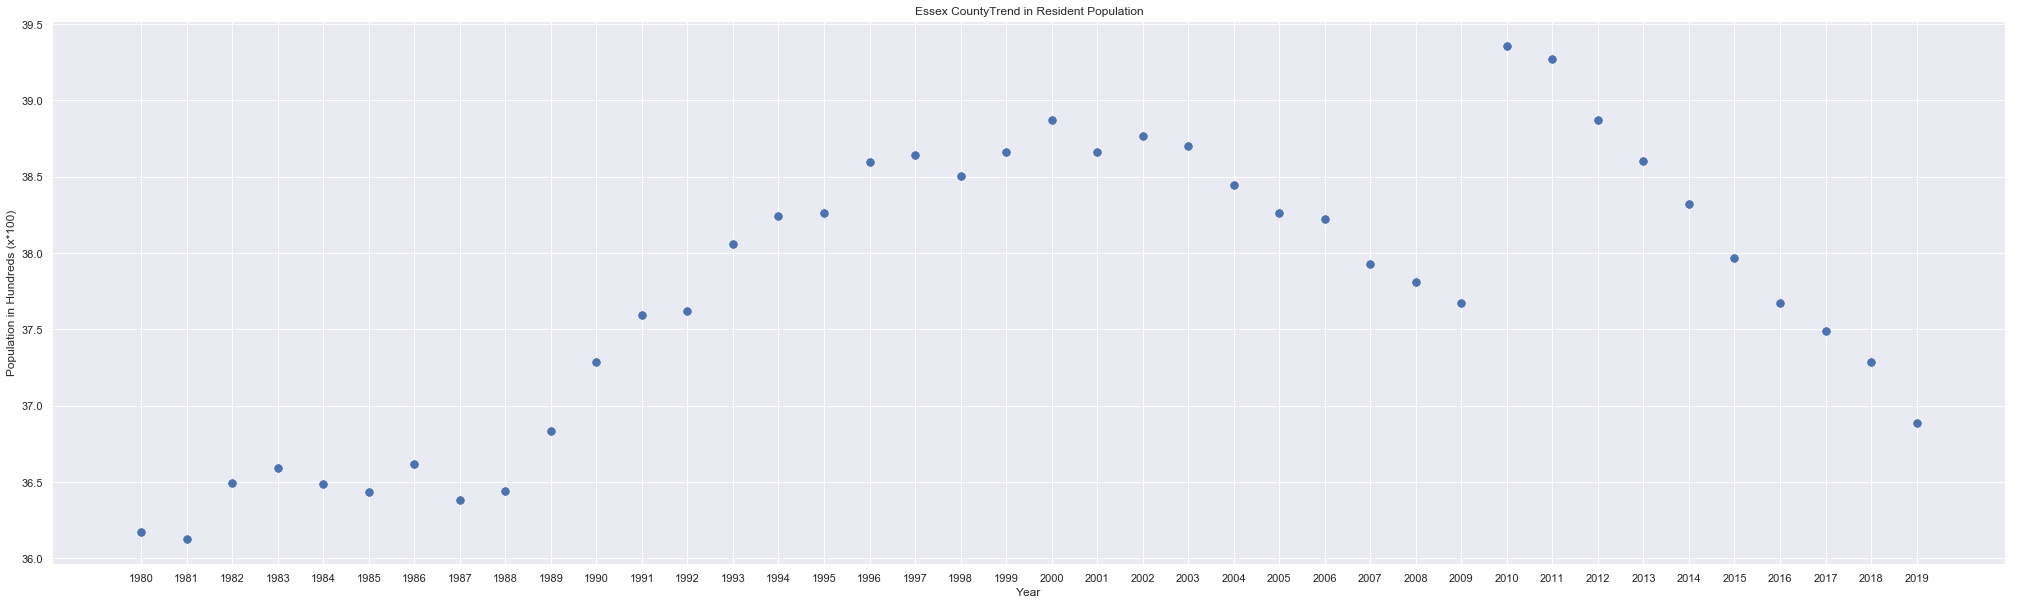

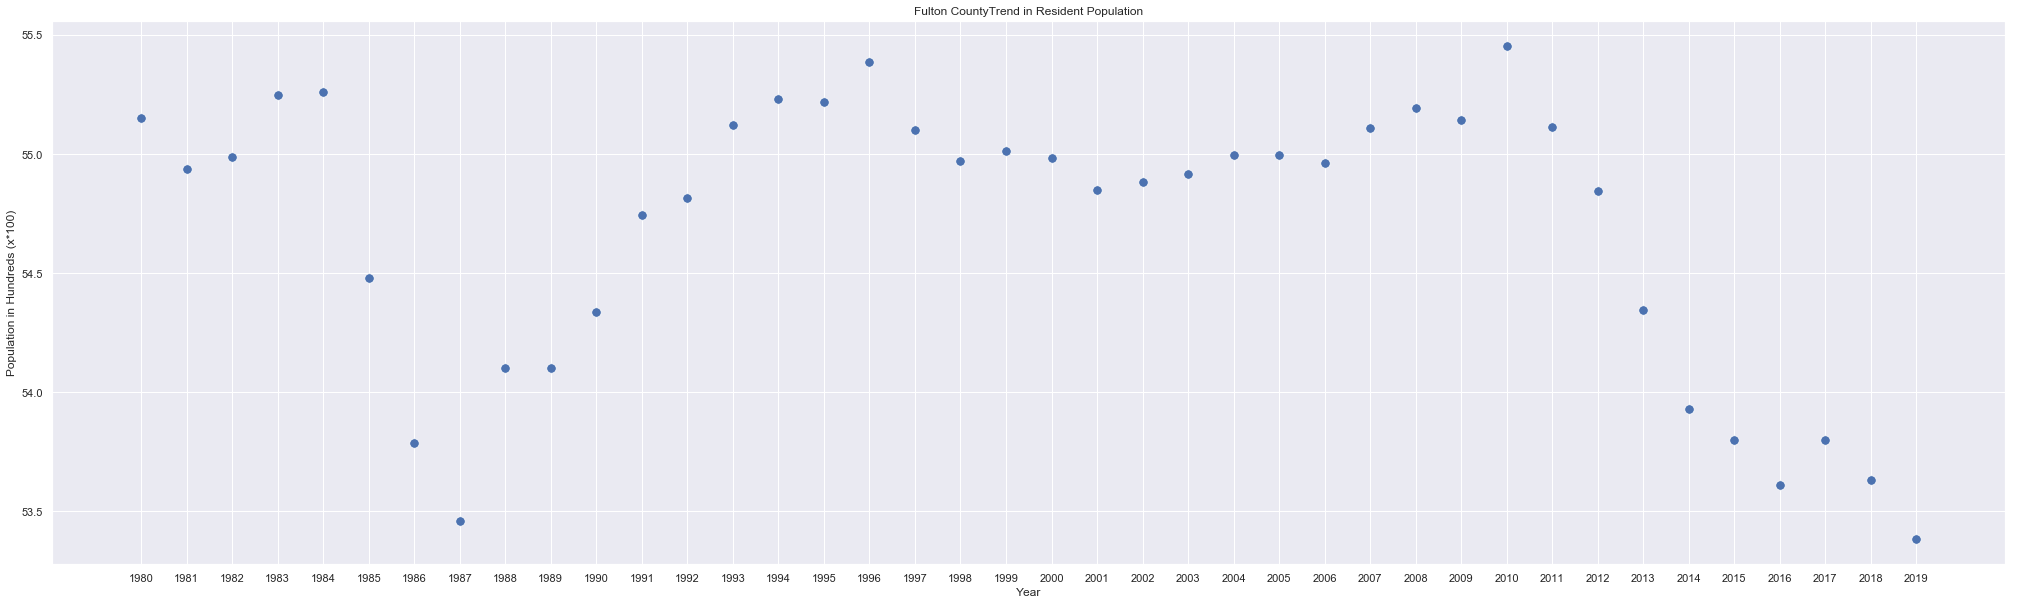

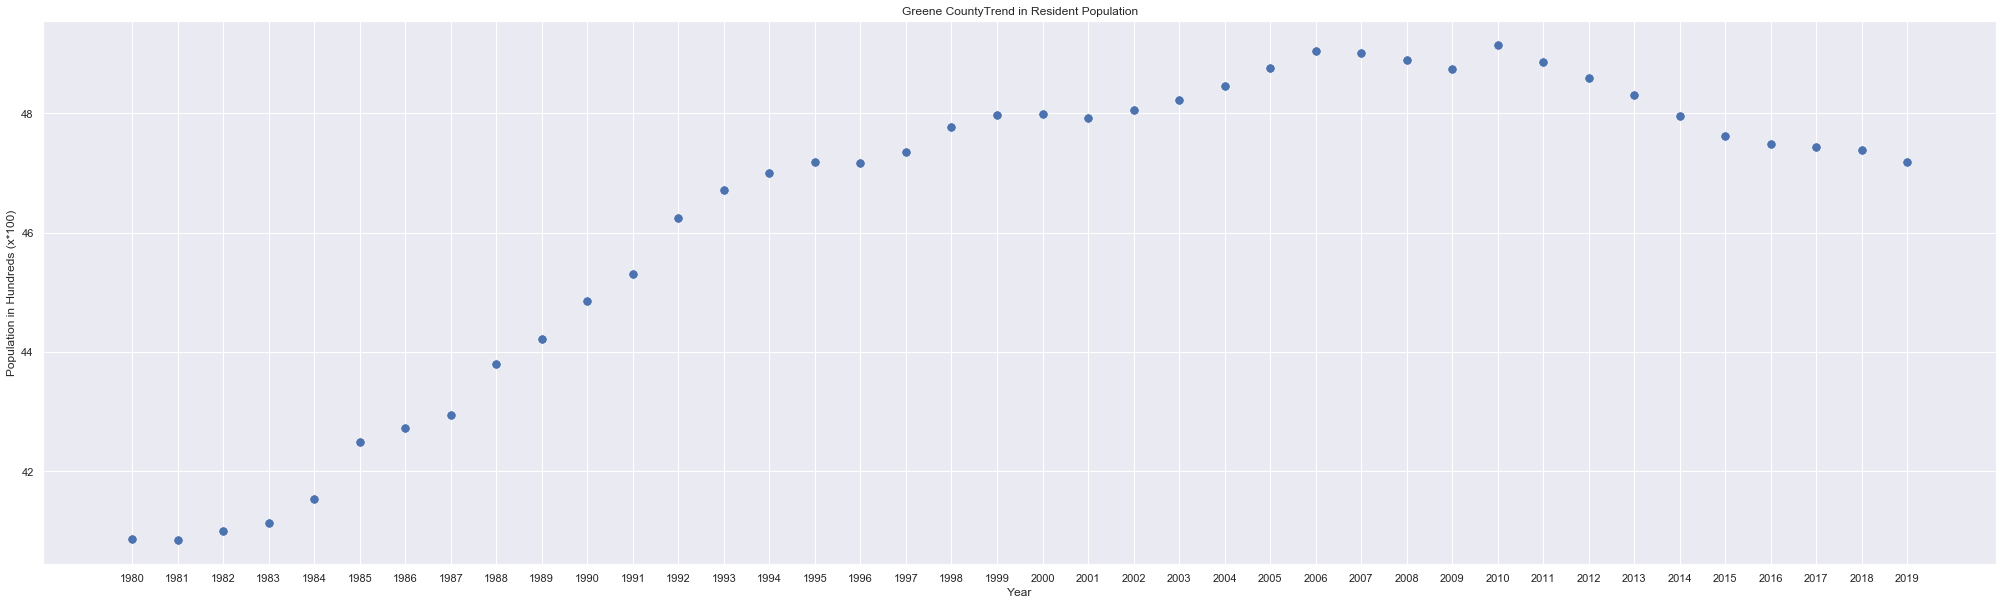

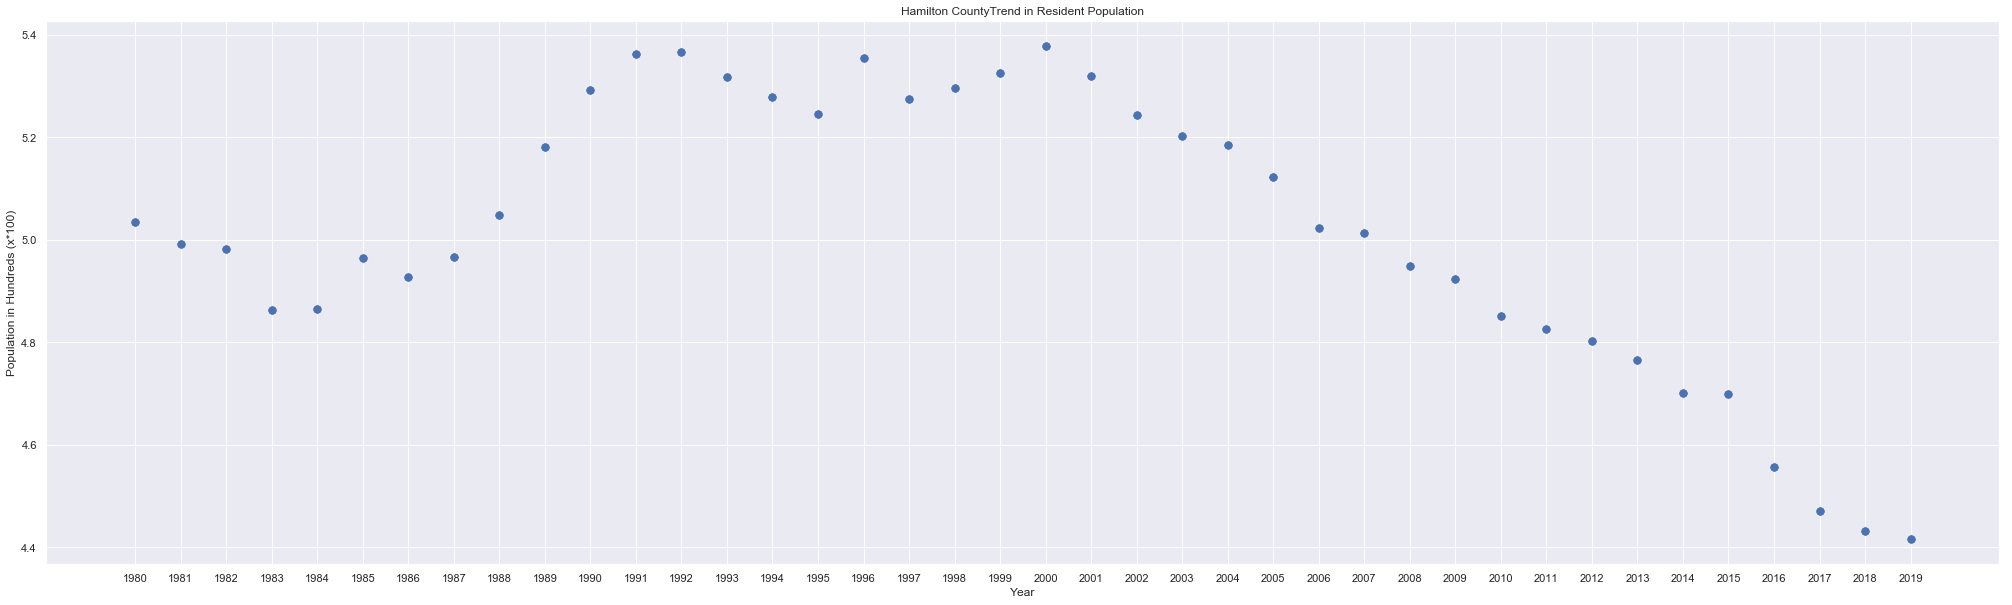

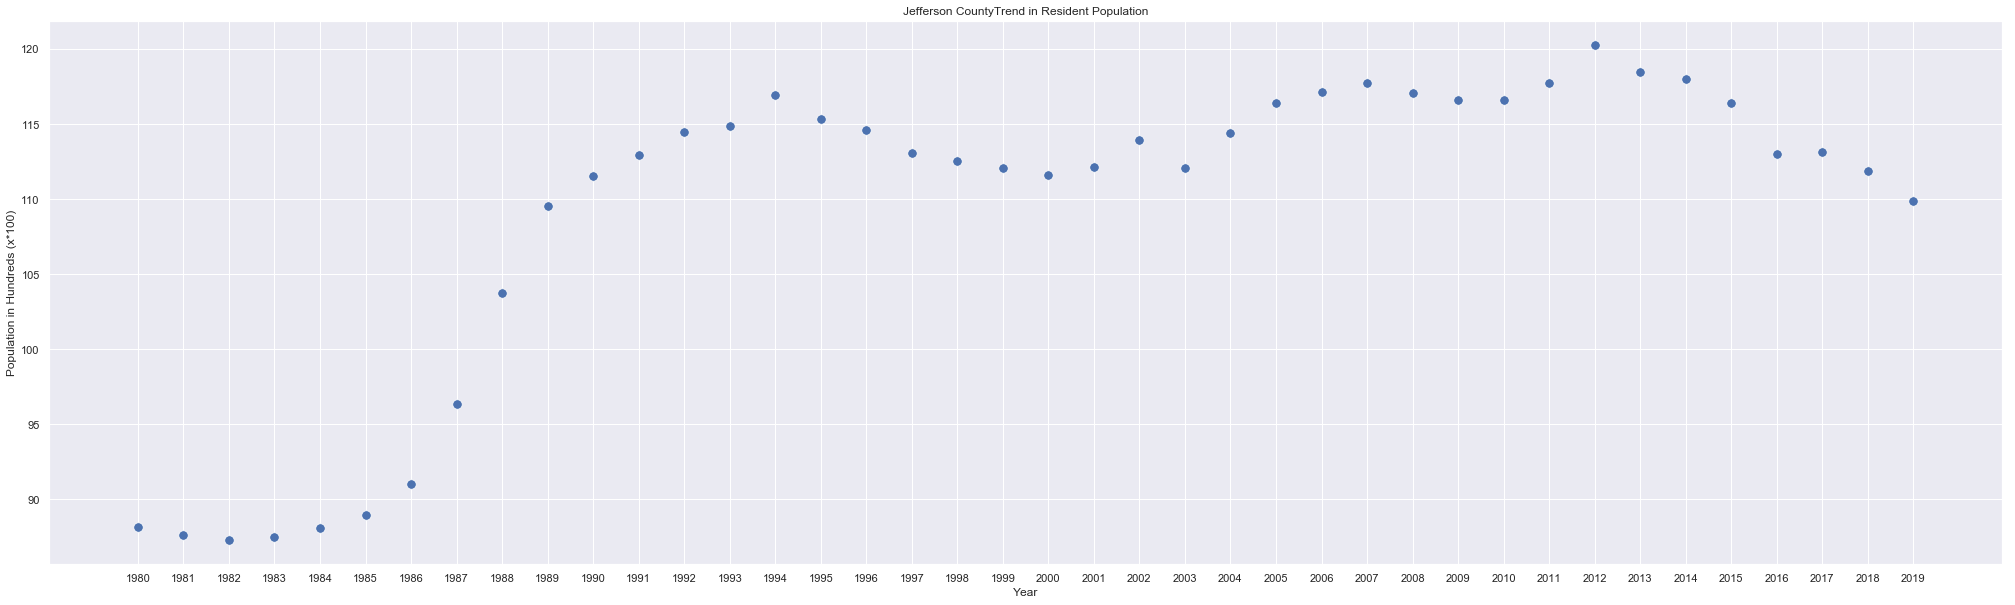

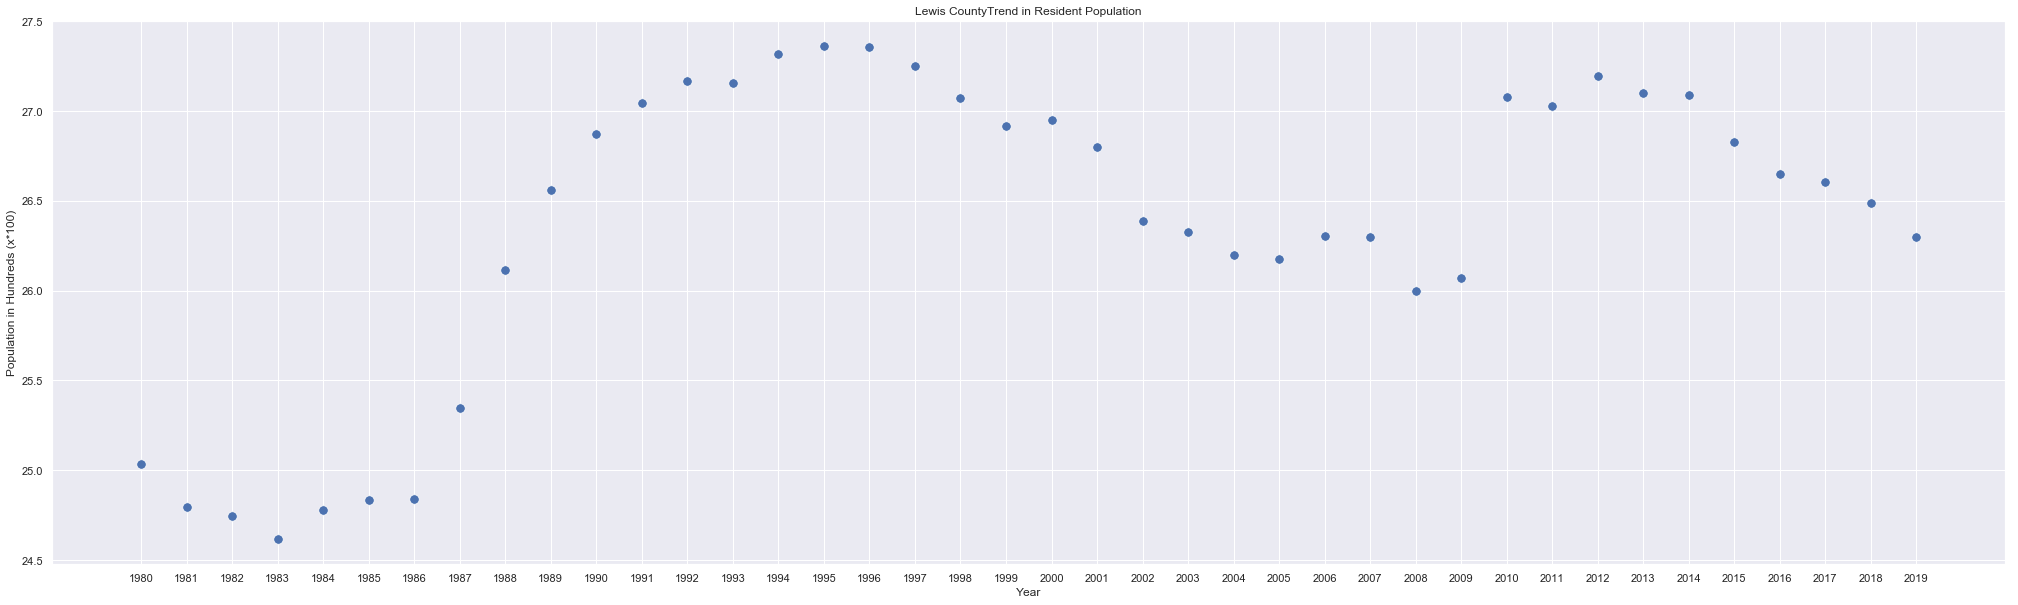

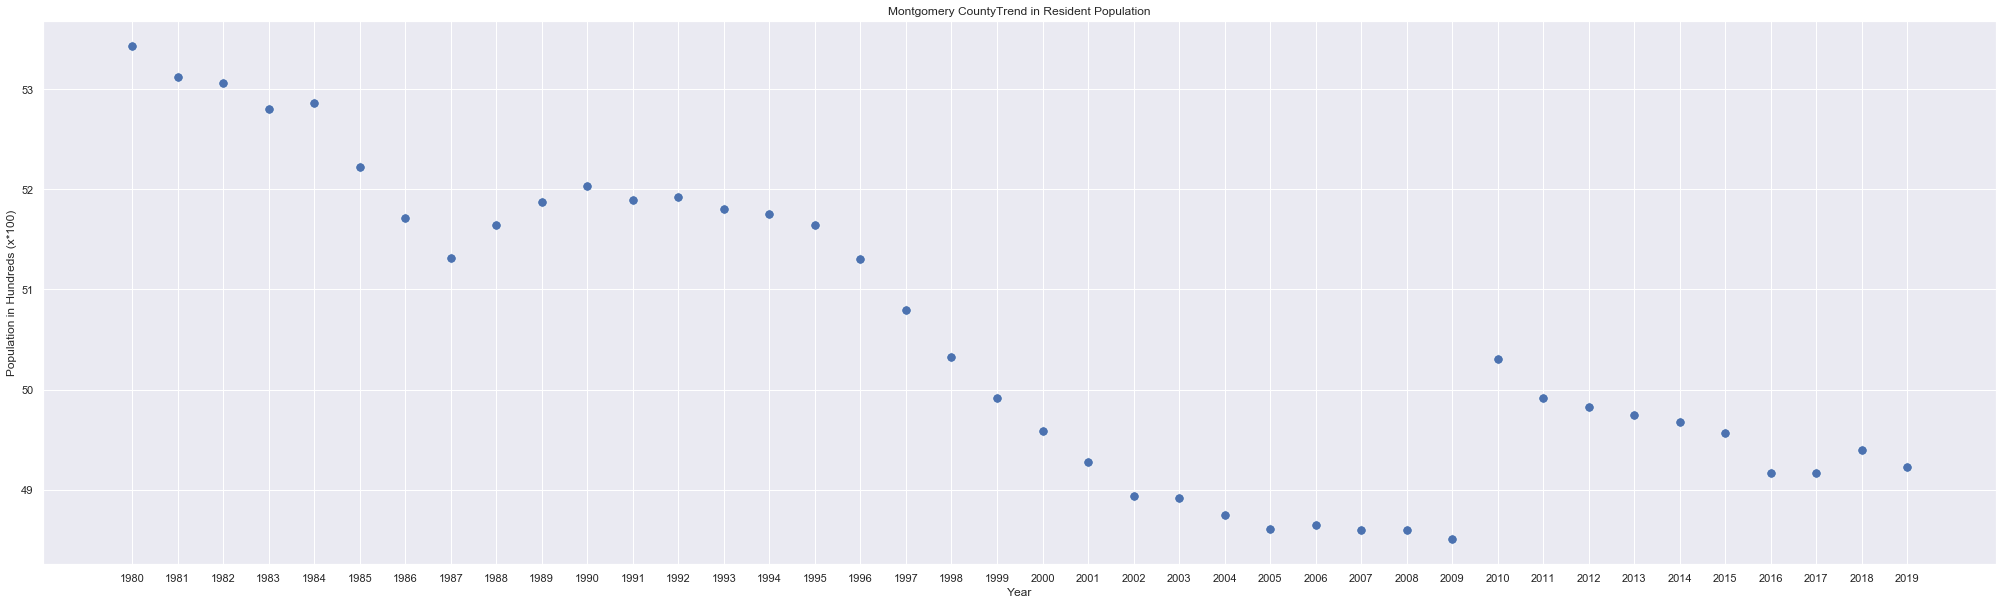

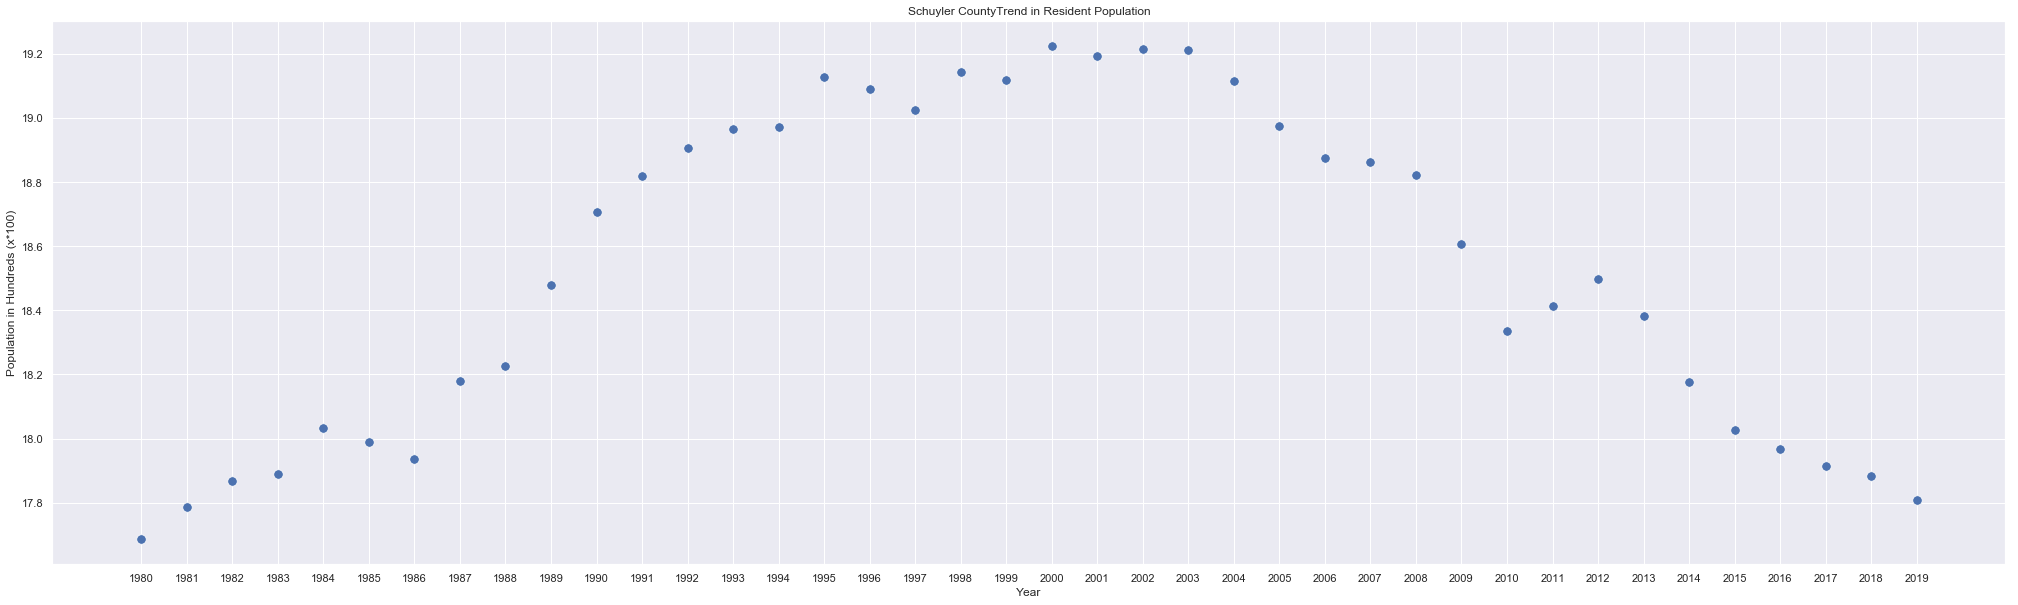

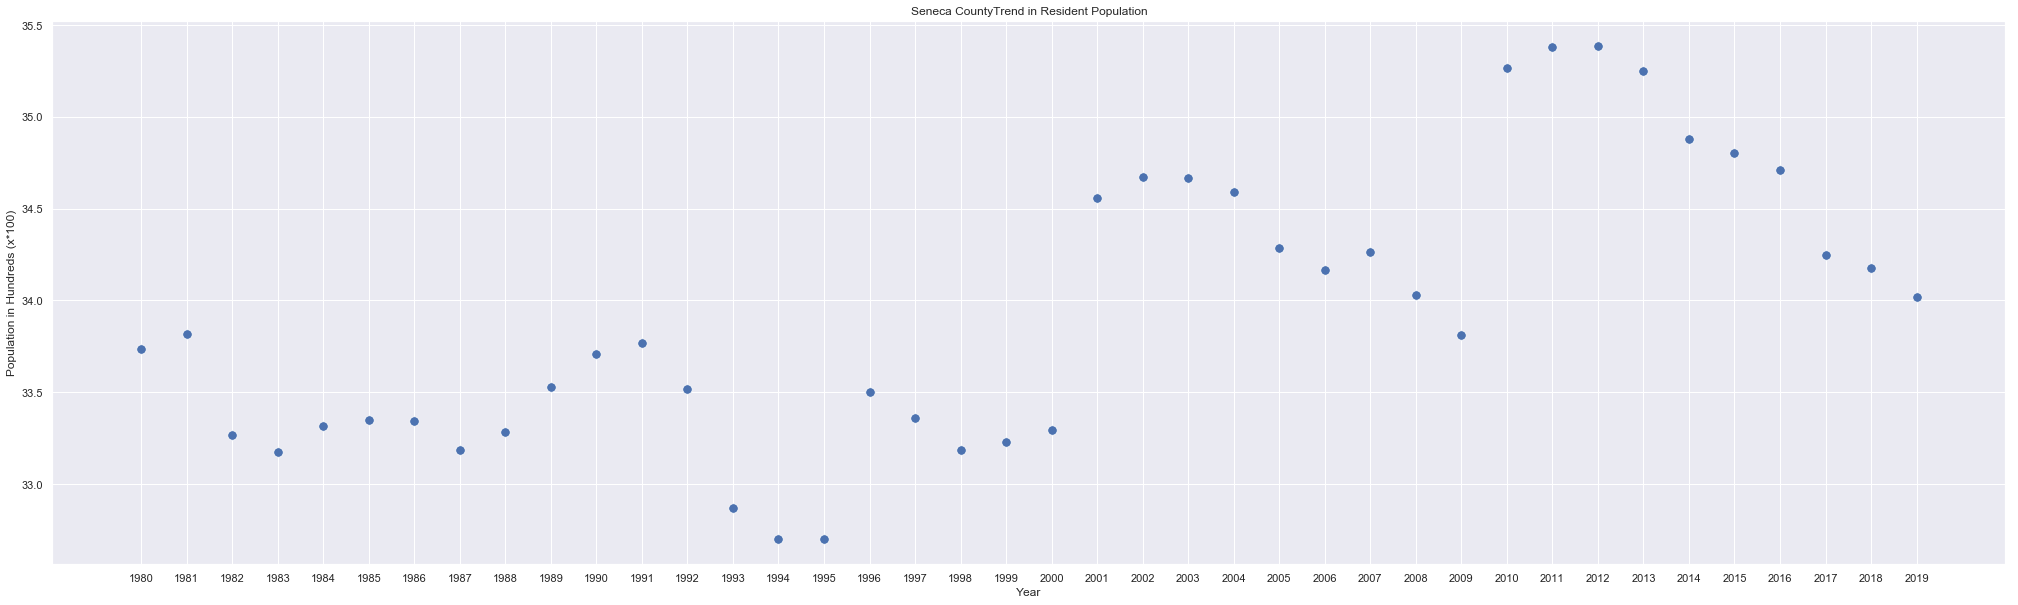

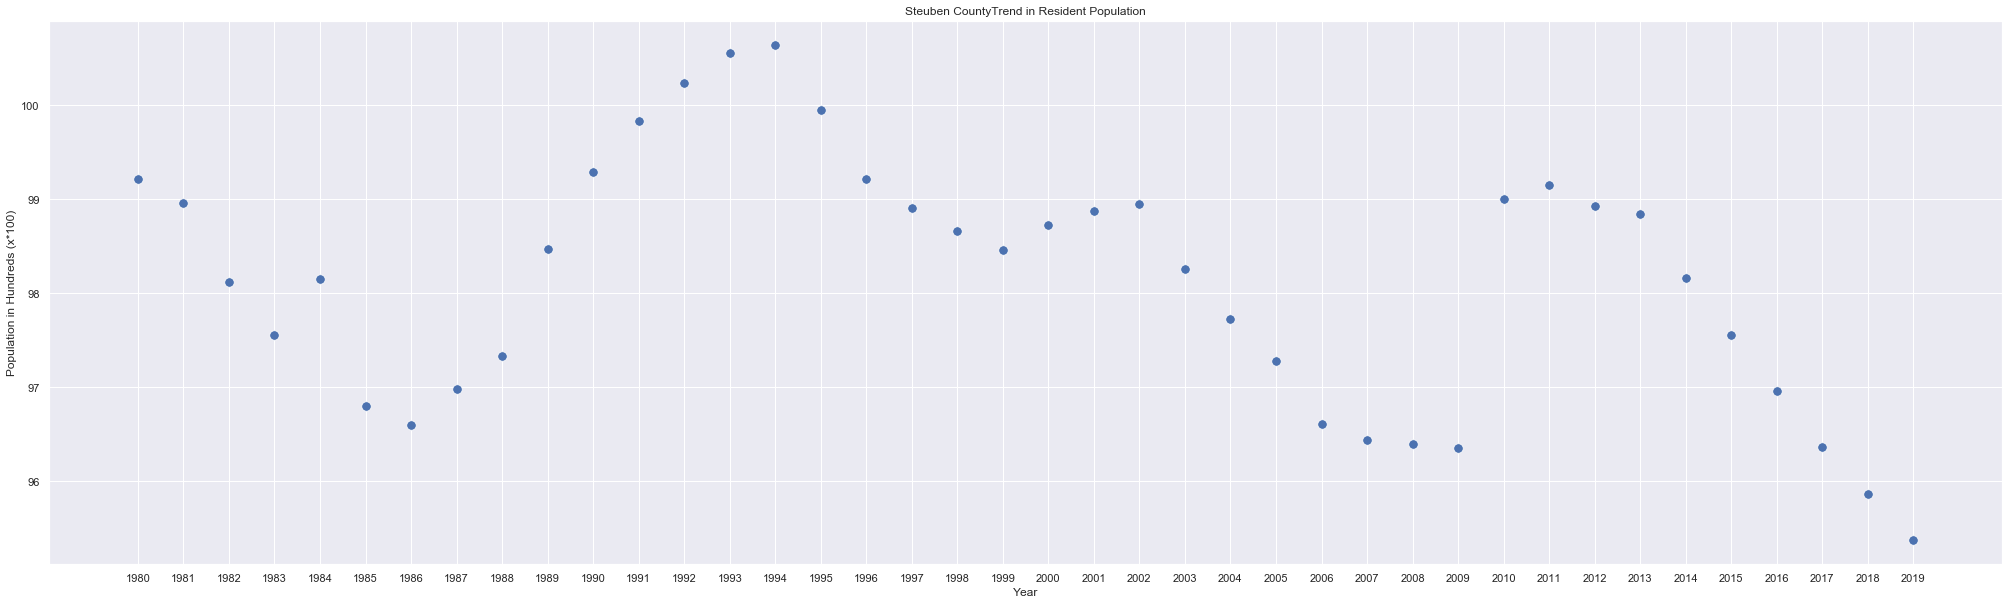

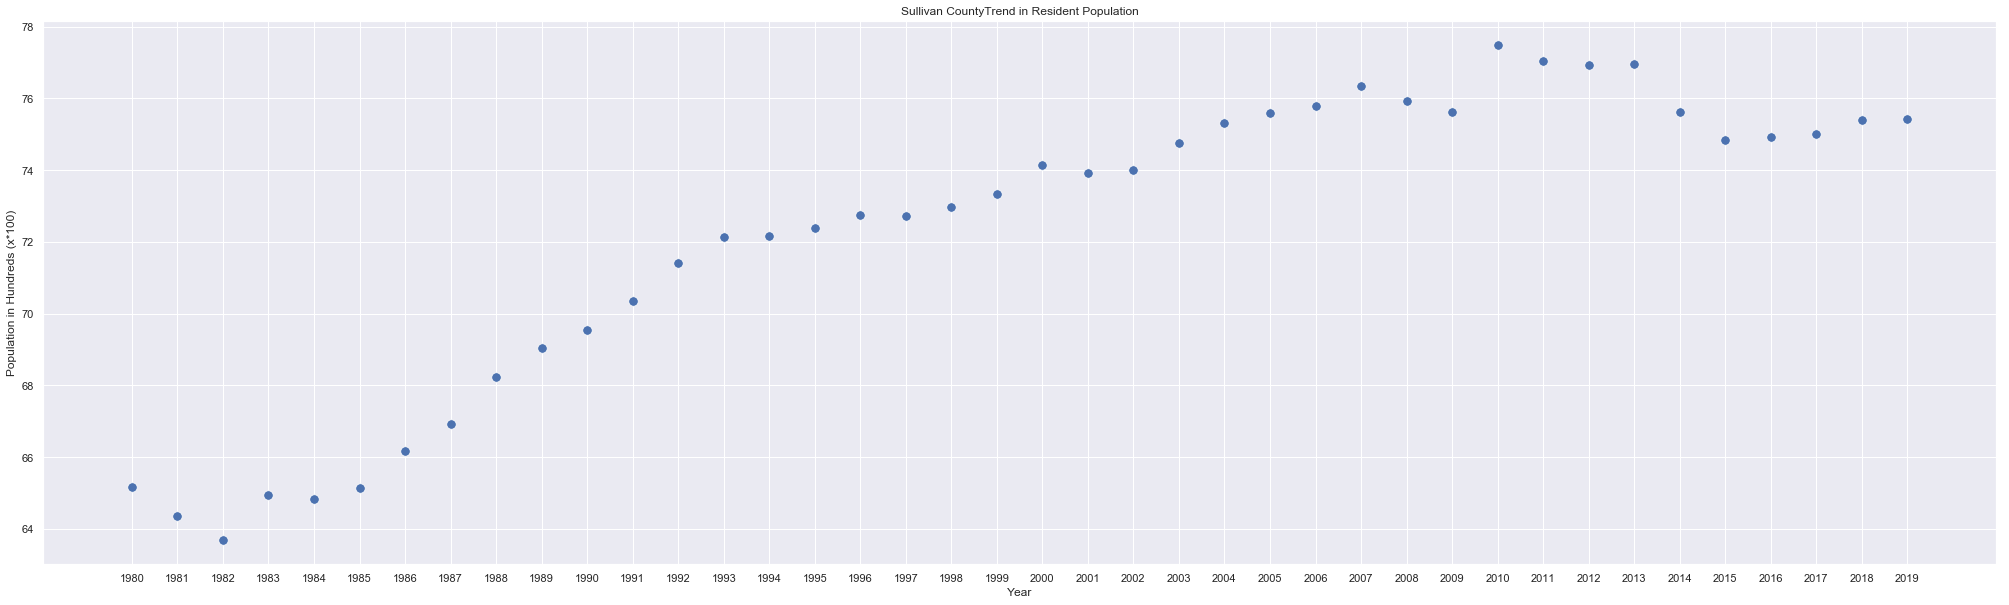

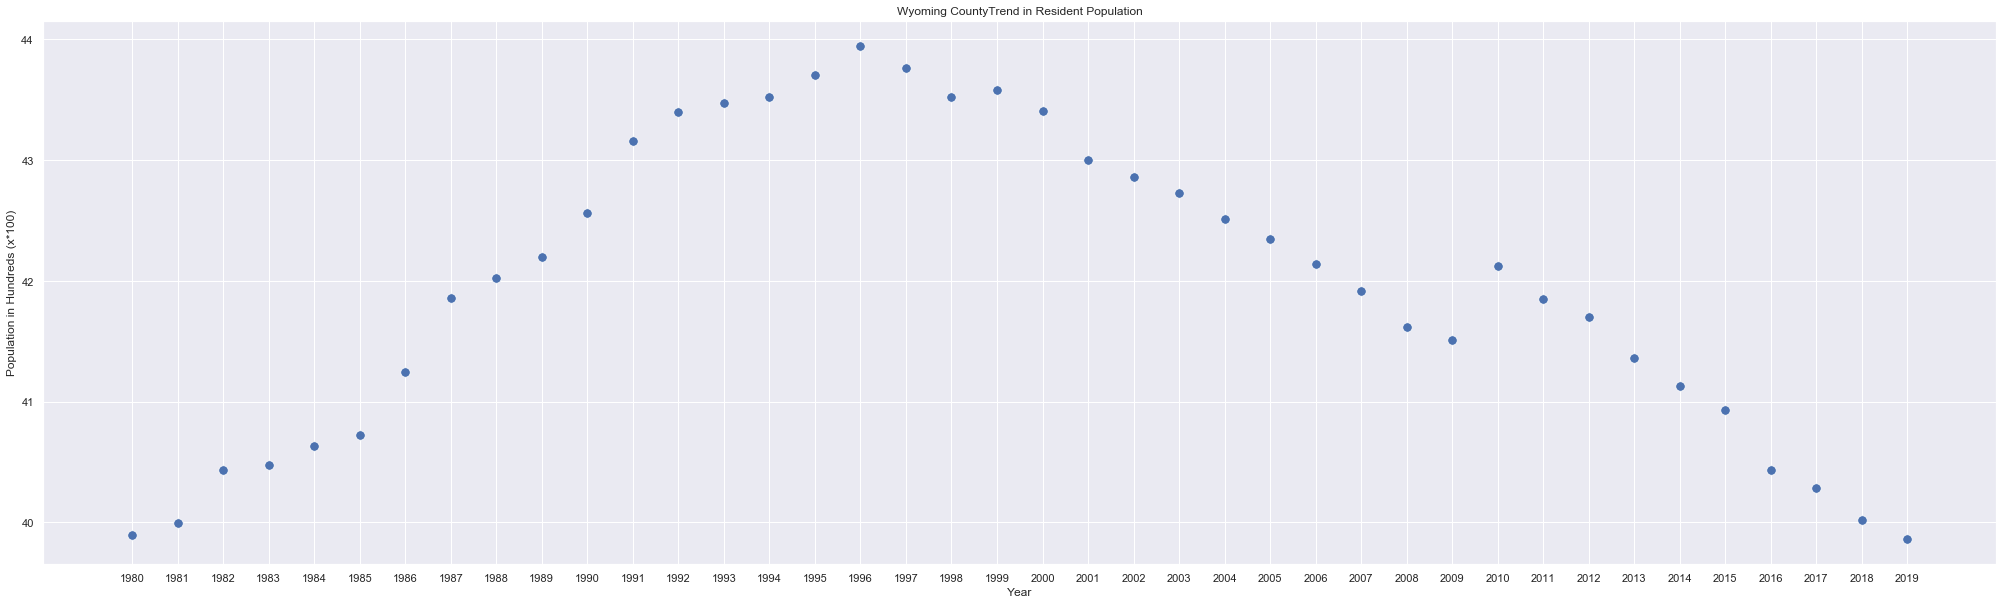

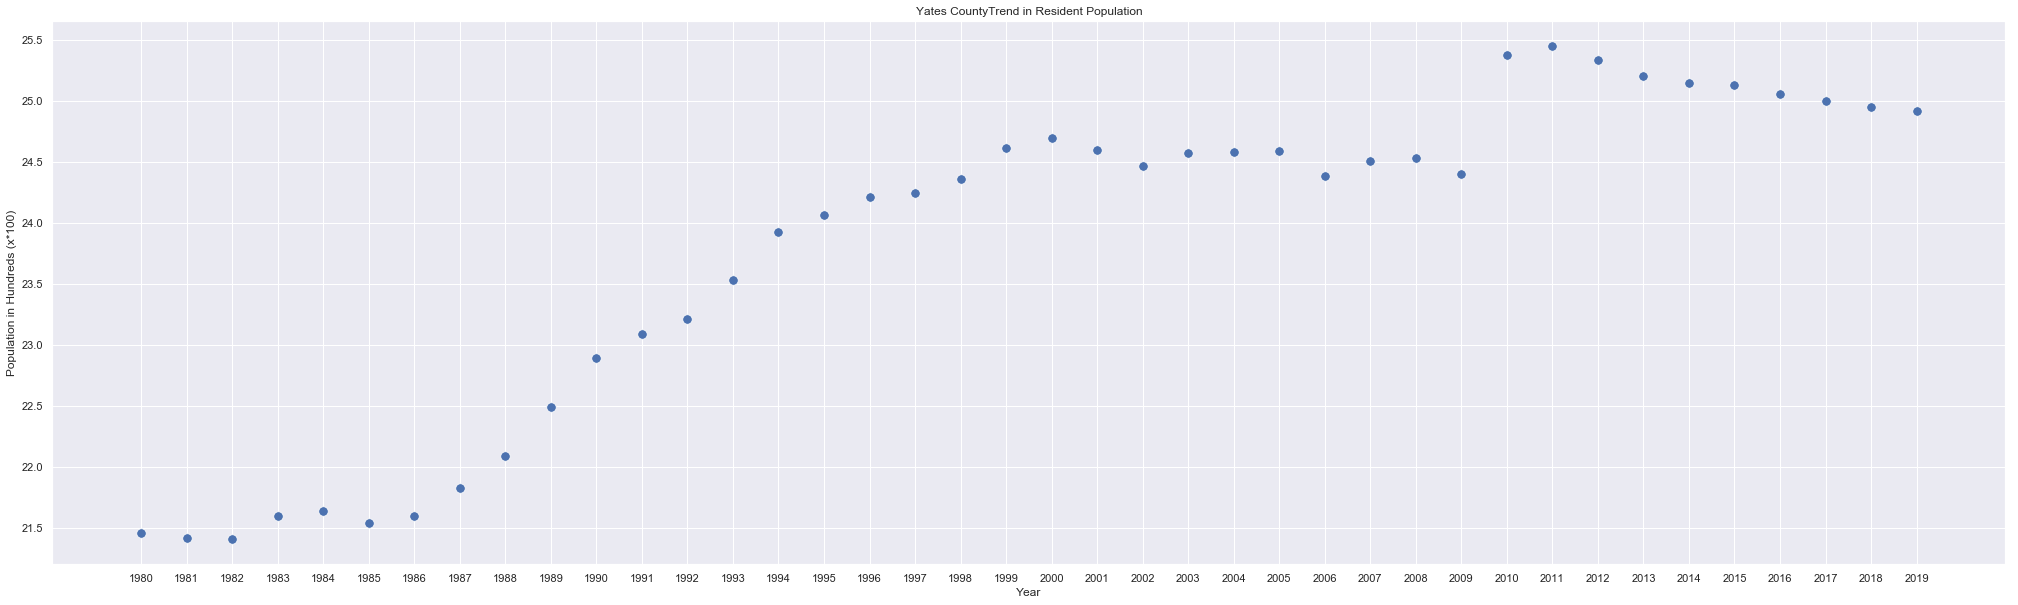

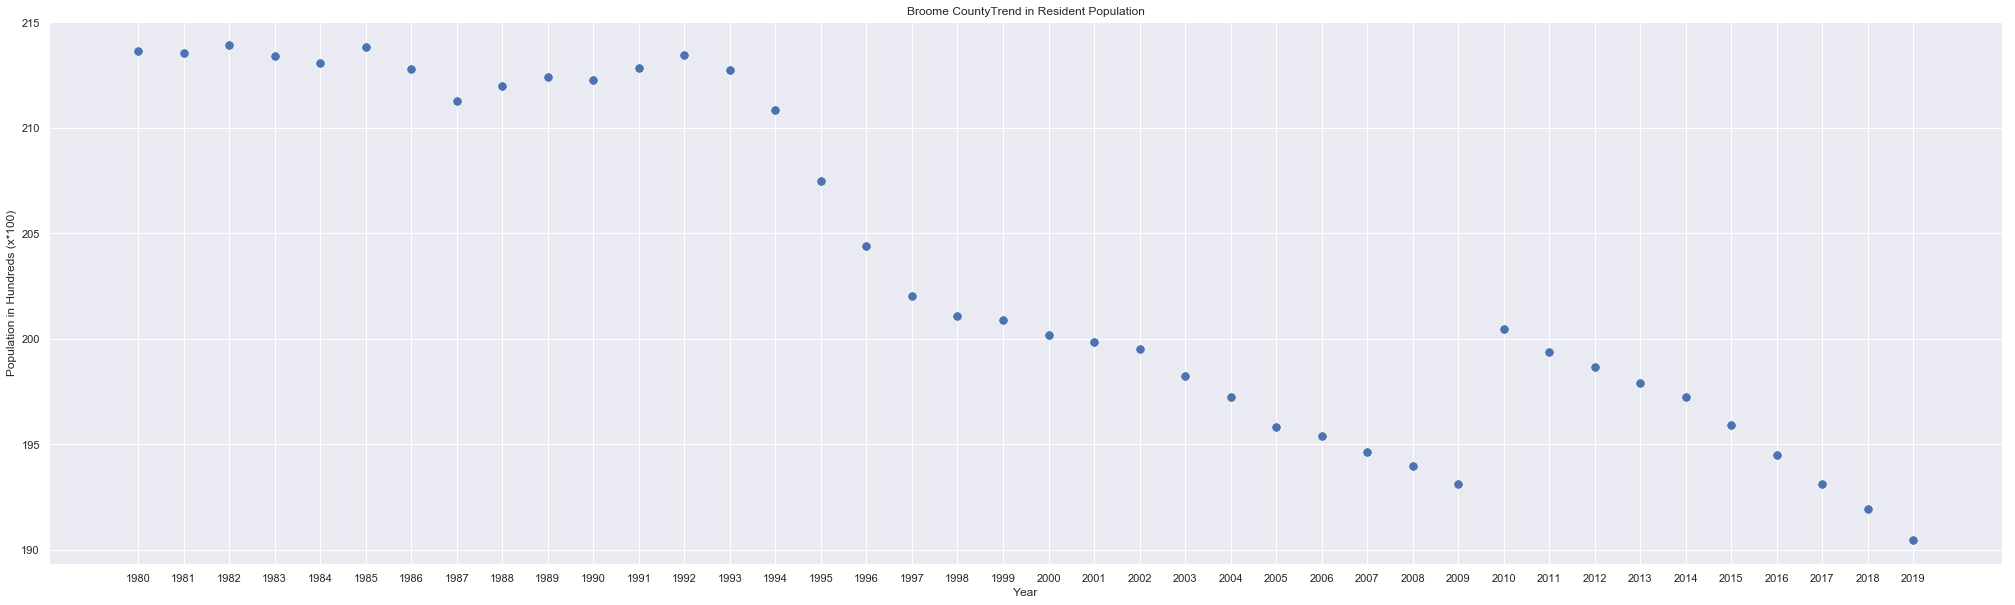

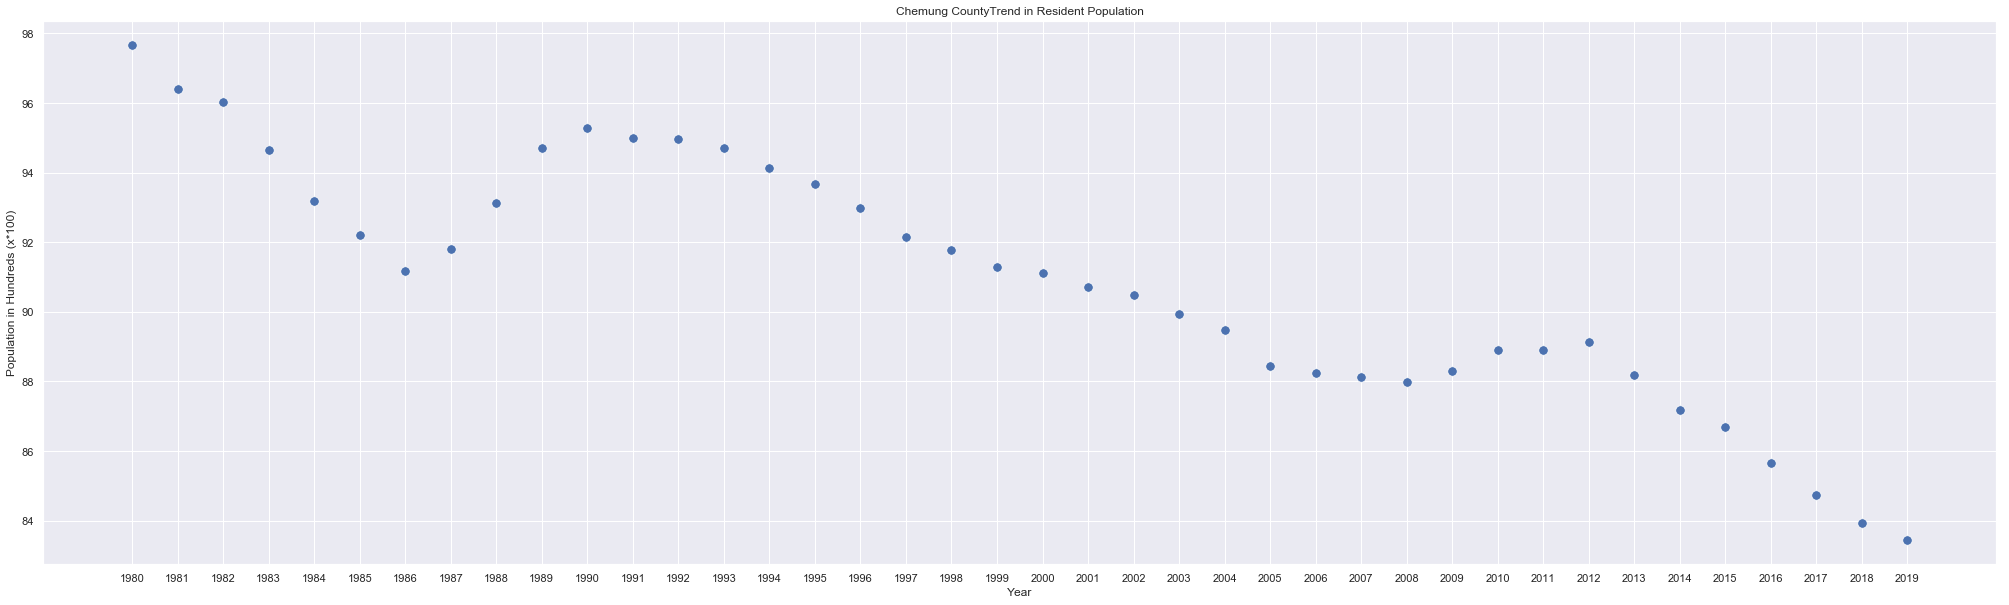

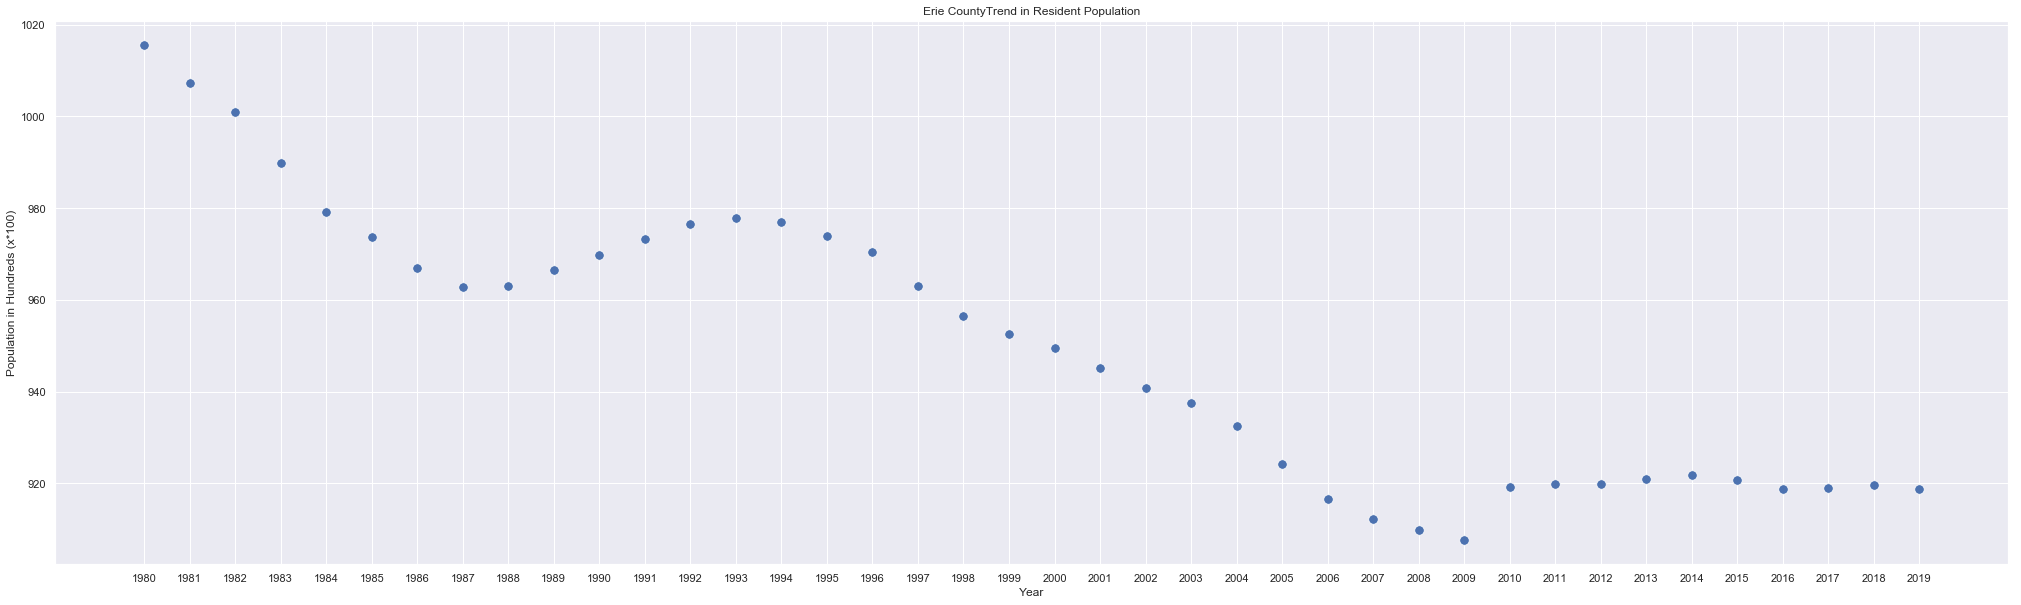

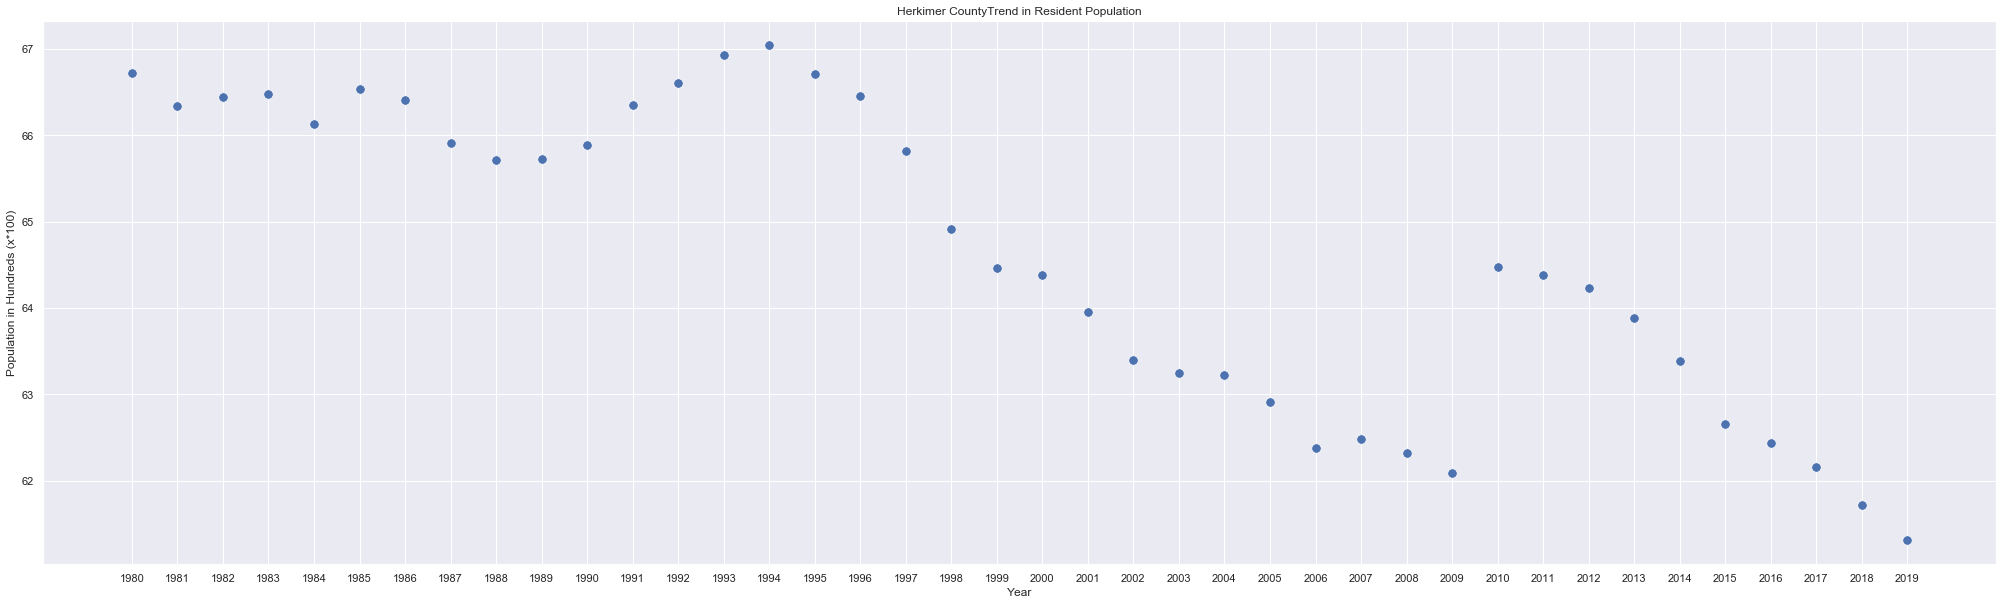

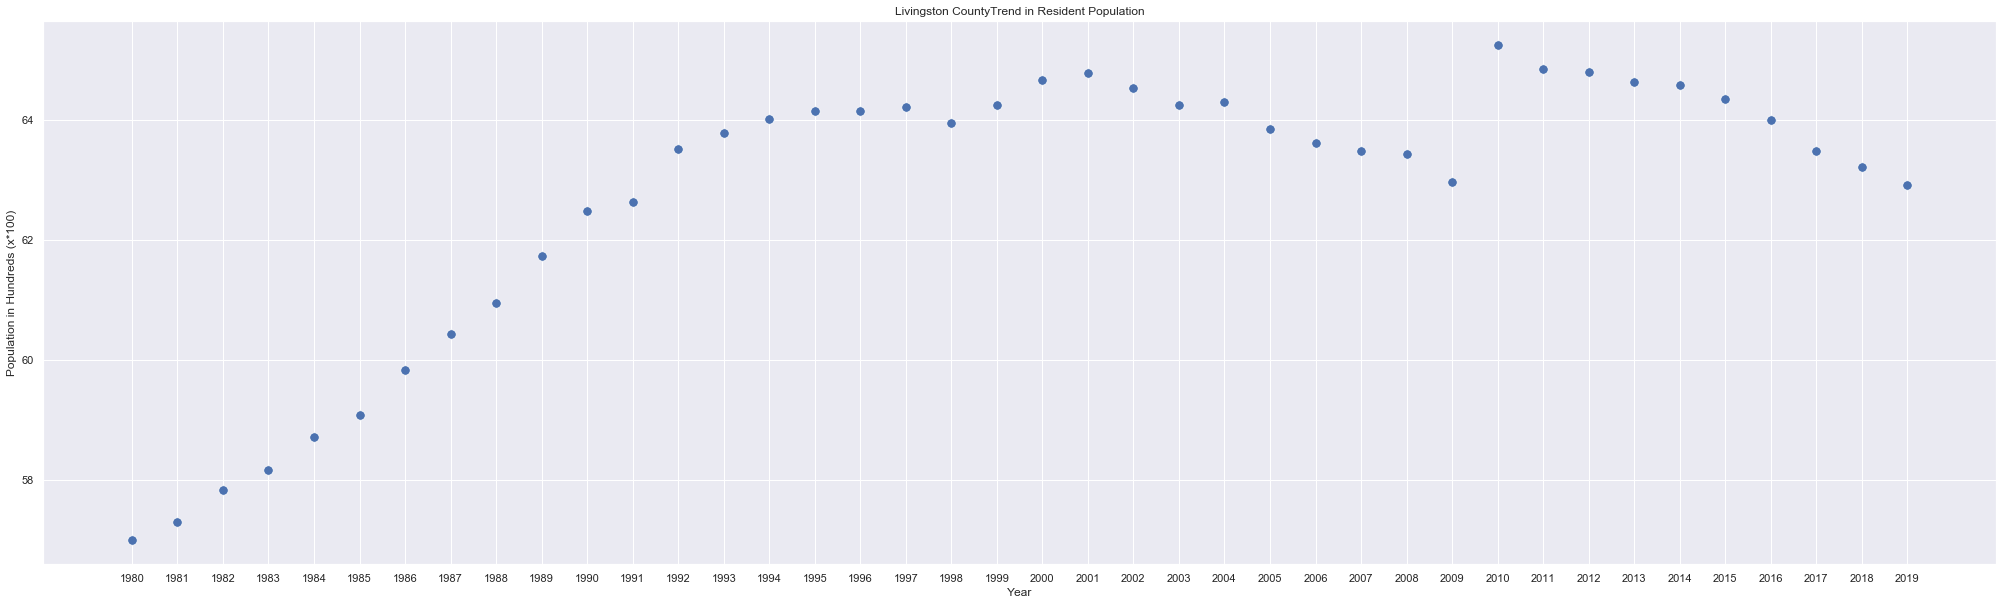

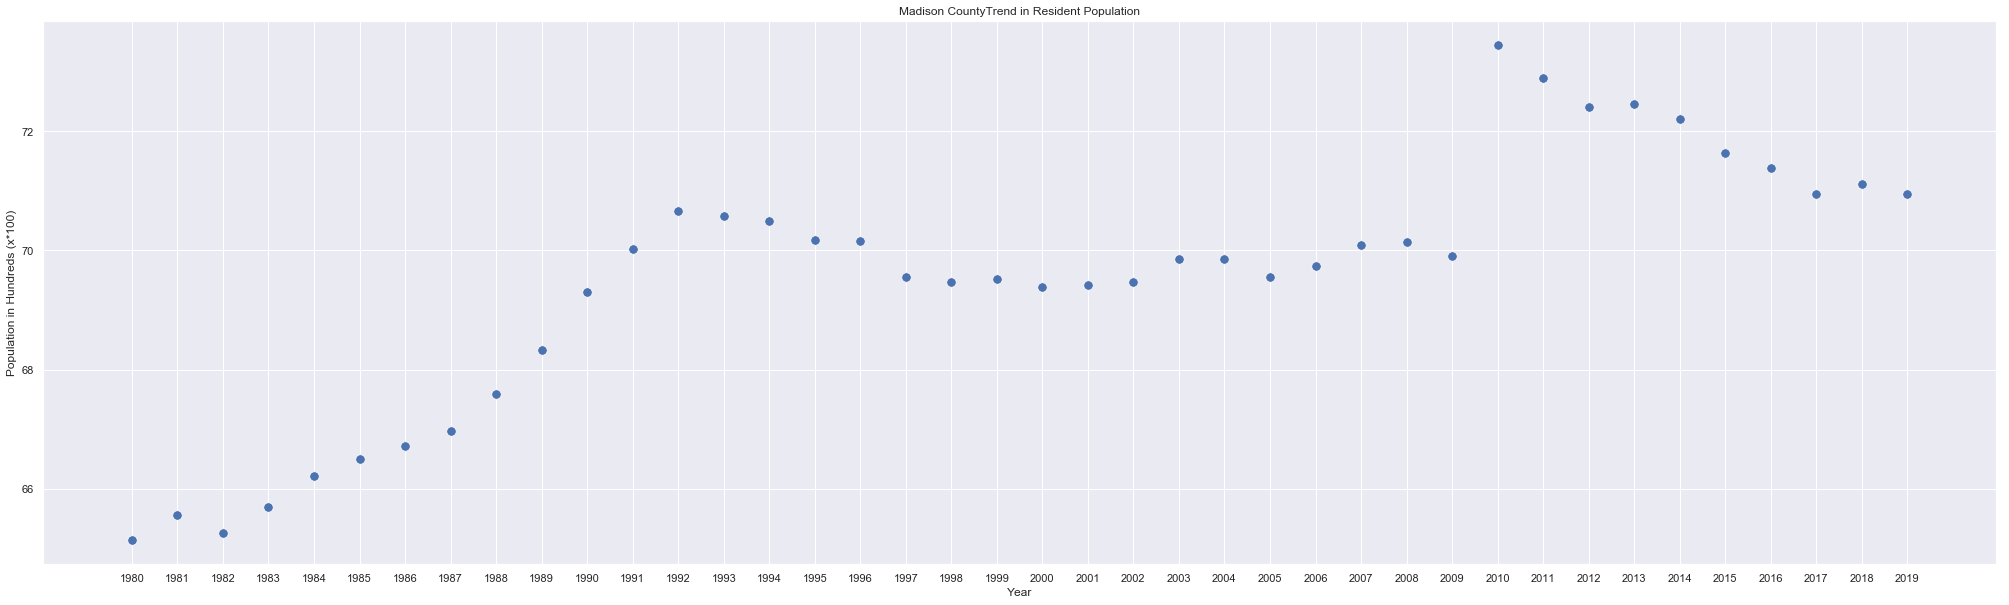

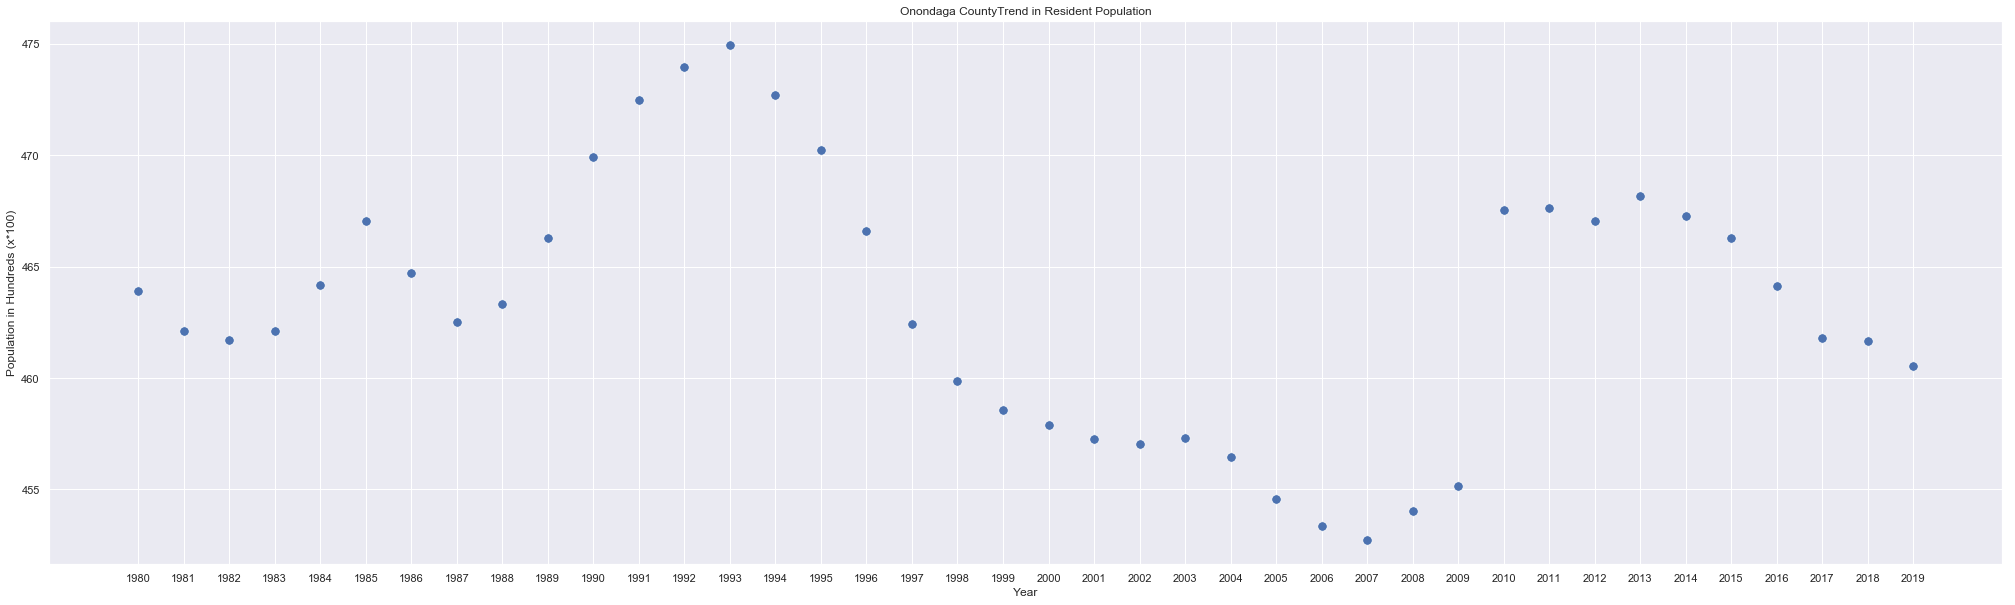

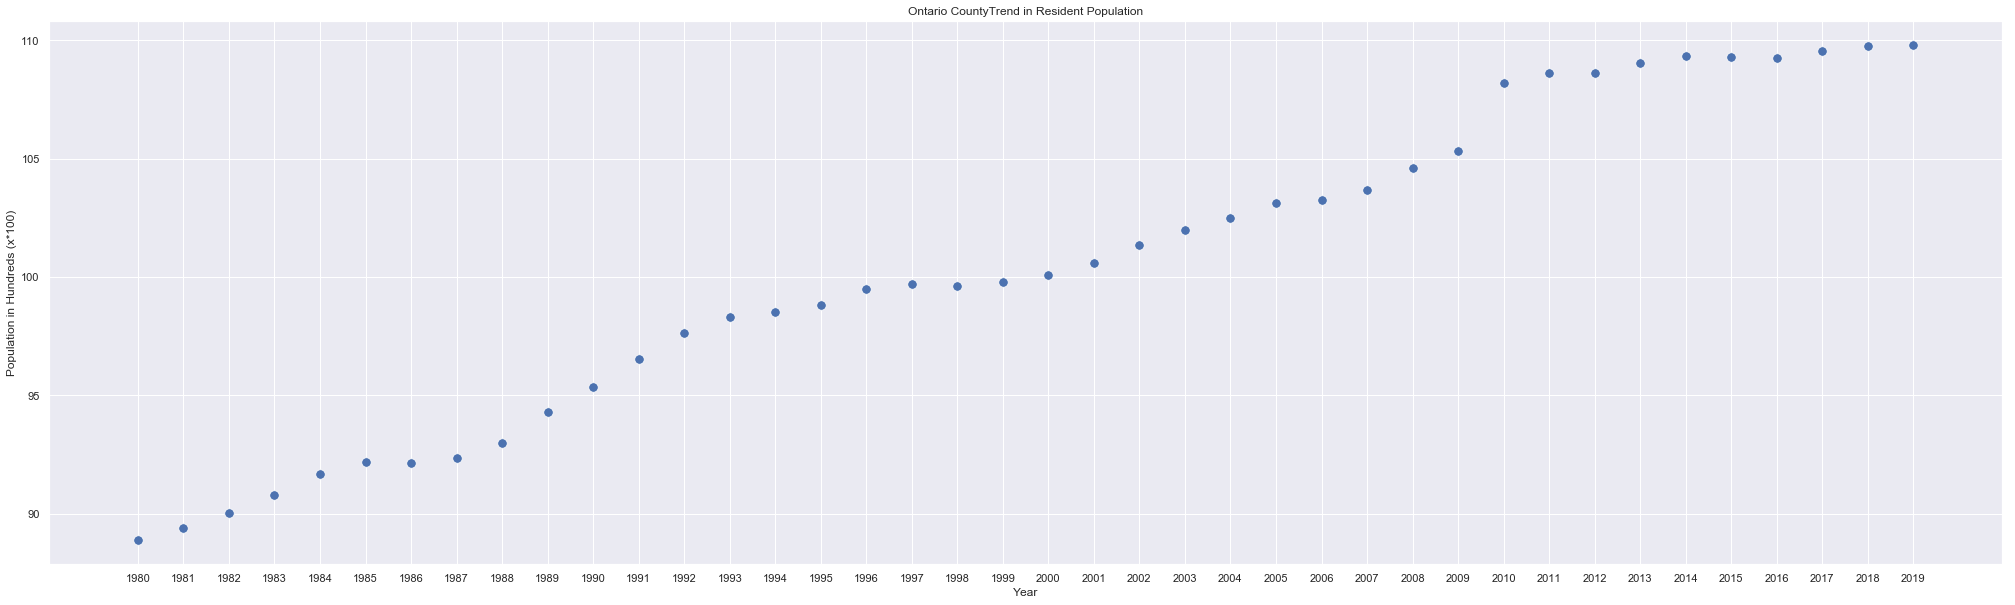

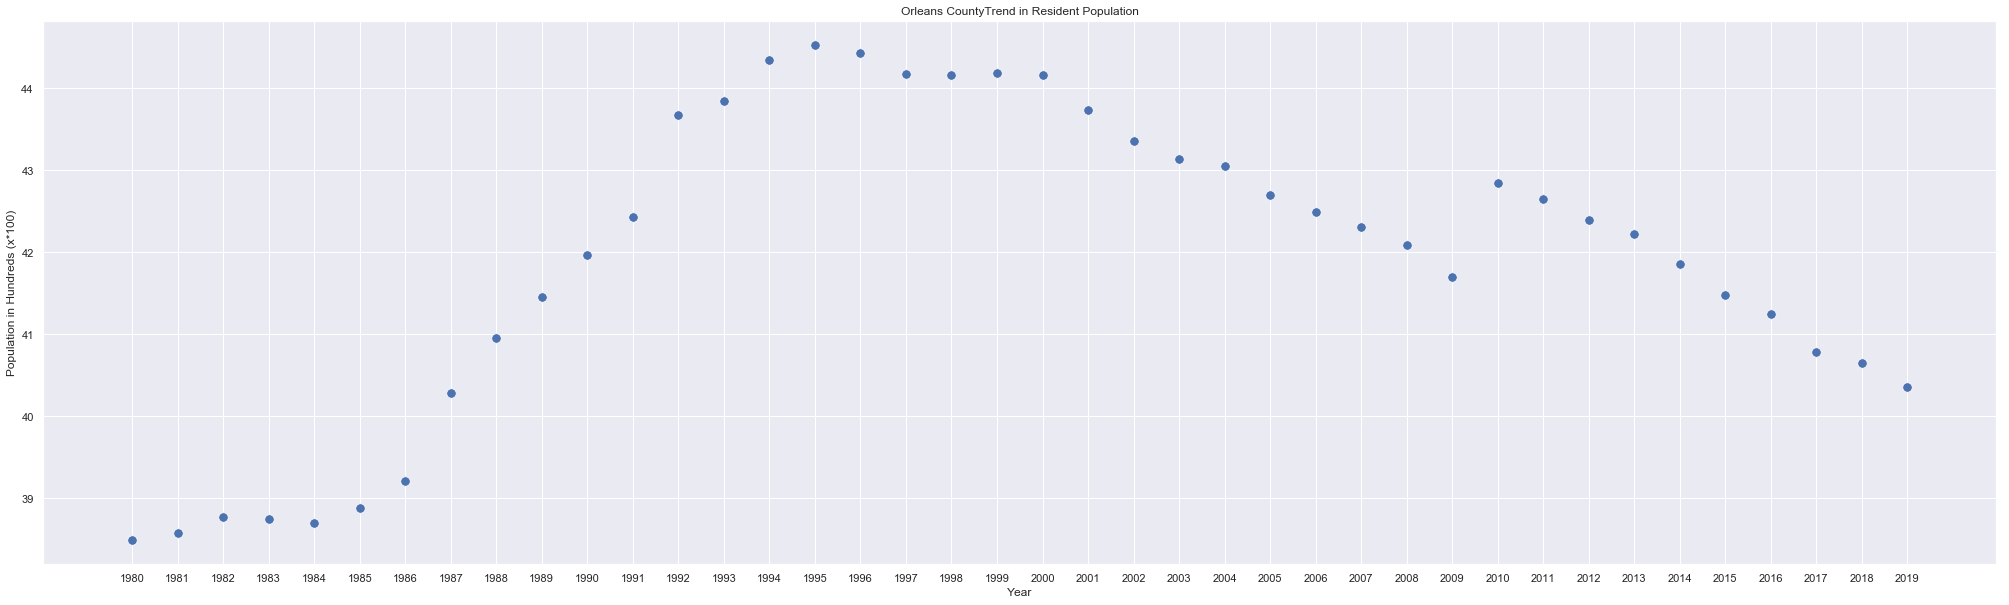

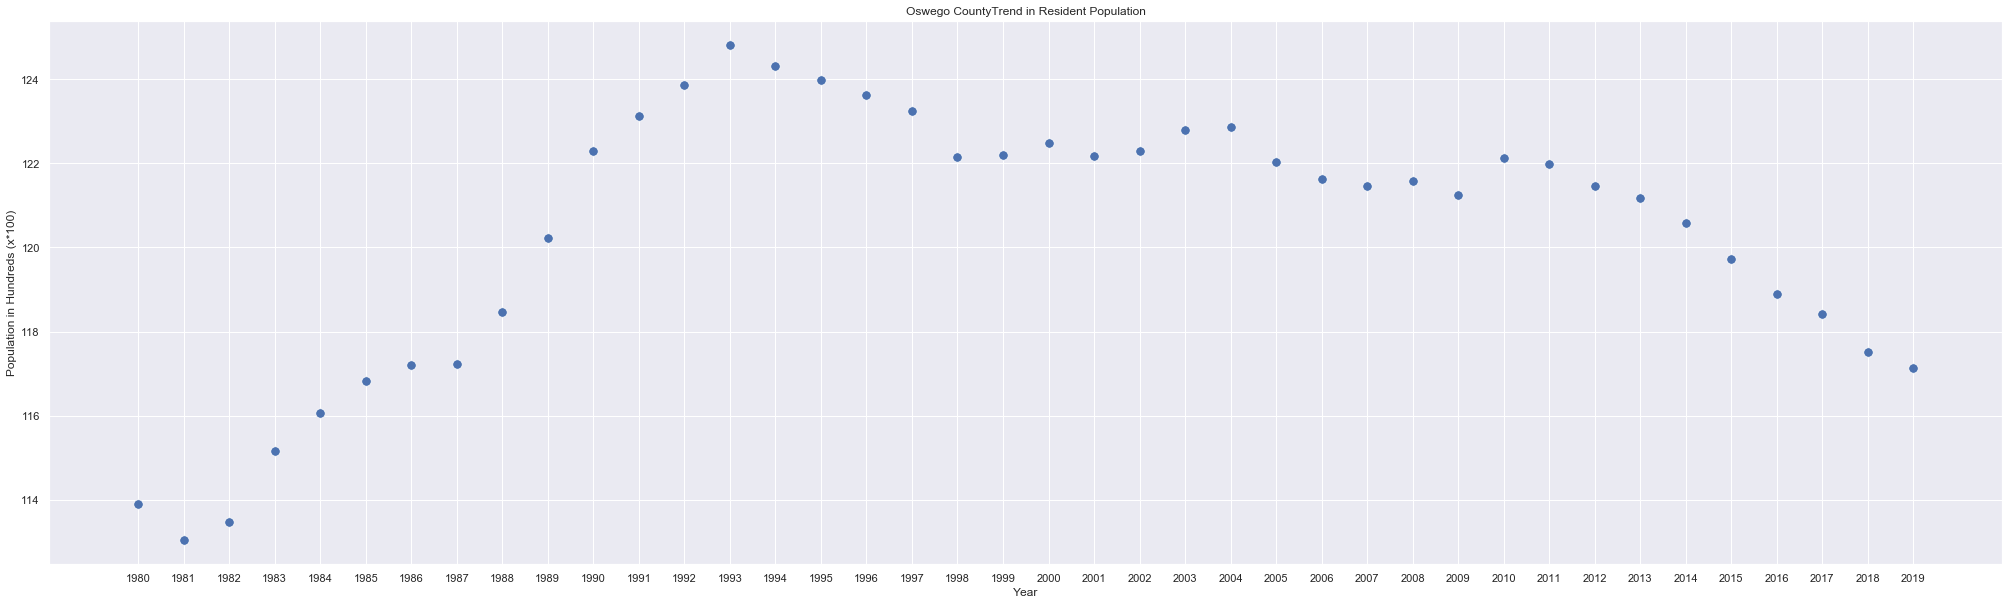

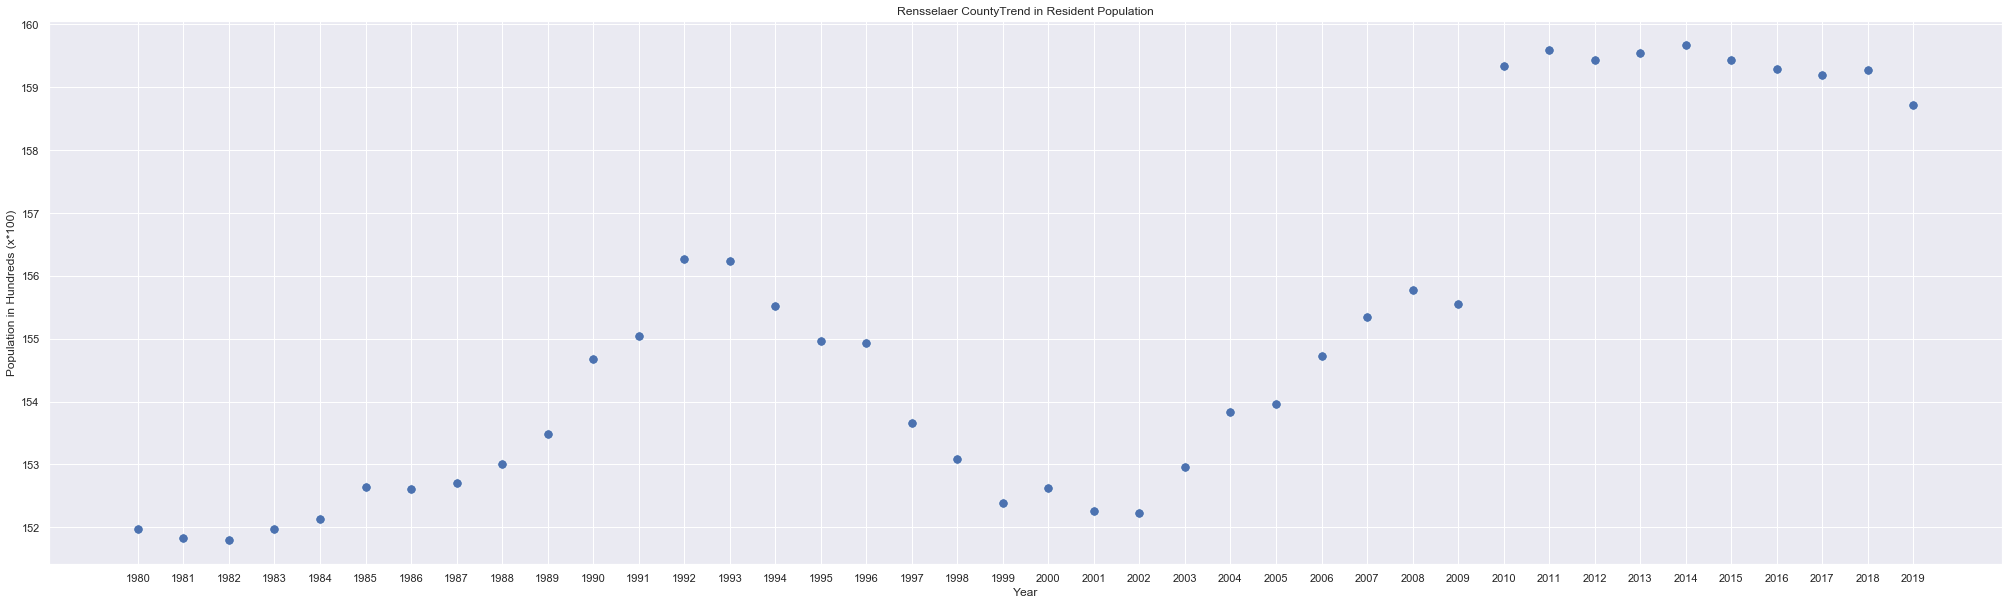

ValueError: Format ' lawrence countytrend in resident population' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

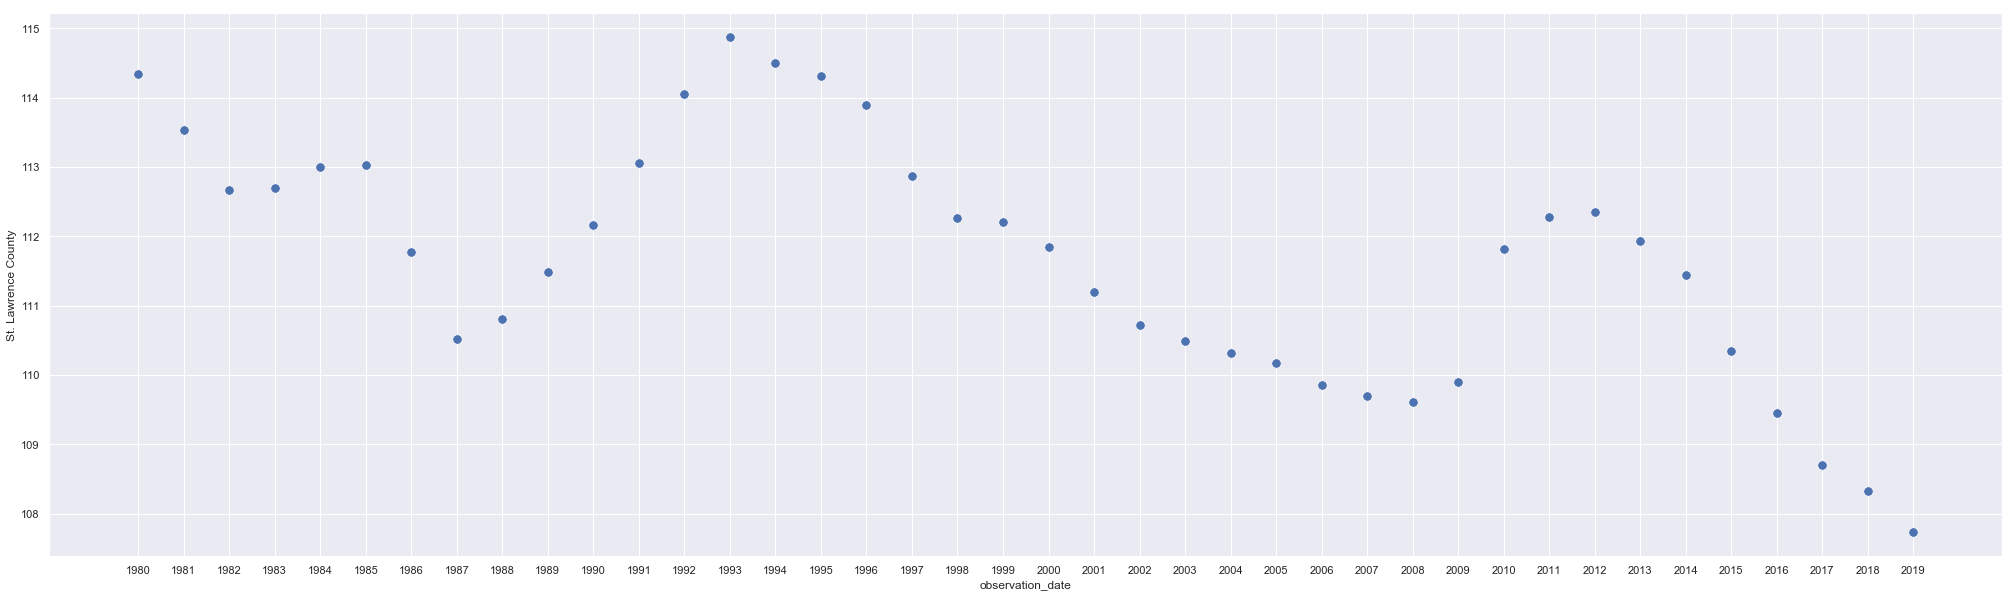

In [427]:
#Let's plot each year's trend in resident population
def population_line(str):
    sns.scatterplot(x=pop_data.index, y = pop_data[str], s=90)
    sns.set(rc={'figure.figsize':(35,10)})
    plt.savefig(str + 'Trend in Resident Population')
    plt.title(str + 'Trend in Resident Population')
    plt.ylabel('Population in Hundreds (x*100)')
    plt.xlabel('Year')
    plt.show()
populations = pop_data.columns
for pop in populations:
     population_line(pop)

In [428]:
#From the above graphs, we may be able to visualize which counties have increased in resident population
#thoroughout the years, however, I want my results in numbers!

In [429]:
pop_data_transposed = pop_data.T

In [430]:
#Percent Change
pop_percent = []
def pop_percent_change(str):
    a = ((pop_data[str][-1] - pop_data[str][0])/(pop_data[str][0]))*100
    print(a)
    pop_percent.append(a)
for pop in populations:
    pop_percent_change(pop)
pop_percent

11.644024514221705
19.168202186297947
25.530381844102813
14.032283472836307
-11.178921082418285
20.062026891922223
-9.782377123558975
21.320869960957157
6.8542788089916655
2.6742192311941193
14.979392336736936
-3.5690235690235648
3.569951849332432
14.740962462147495
27.369061961576826
35.25675441511922
-10.921495110355217
-4.153002728615395
-13.627360898417573
-4.330820363164708
-0.32817337461300383
-0.04370702842636063
-2.537894305612448
nan
-5.74278147958312
1.9598628925254202
11.335662934852776
-3.209254256341443
15.484202540319632
-12.276519666269357
24.59756554094677
5.036948272418611
-7.8931117723011095
0.7075751163774849
0.6841569603076004
0.8389410962558744
-3.868288700525133
15.7731563195457
-0.09023687178844808
16.09581061559253
-10.840260615592
-14.540837224543296
-9.529558668284304
-8.086758401534915
10.36382135213836
8.888718342287024
5.629430477986085
-7.949277338423795
-0.7311605449215373
23.47118964334321
48.28025870271144
4.821280133000816
2.8296503103572266
4.44046694

[11.644024514221705,
 19.168202186297947,
 25.530381844102813,
 14.032283472836307,
 -11.178921082418285,
 20.062026891922223,
 -9.782377123558975,
 21.320869960957157,
 6.8542788089916655,
 2.6742192311941193,
 14.979392336736936,
 -3.5690235690235648,
 3.569951849332432,
 14.740962462147495,
 27.369061961576826,
 35.25675441511922,
 -10.921495110355217,
 -4.153002728615395,
 -13.627360898417573,
 -4.330820363164708,
 -0.32817337461300383,
 -0.04370702842636063,
 -2.537894305612448,
 nan,
 -5.74278147958312,
 1.9598628925254202,
 11.335662934852776,
 -3.209254256341443,
 15.484202540319632,
 -12.276519666269357,
 24.59756554094677,
 5.036948272418611,
 -7.8931117723011095,
 0.7075751163774849,
 0.6841569603076004,
 0.8389410962558744,
 -3.868288700525133,
 15.7731563195457,
 -0.09023687178844808,
 16.09581061559253,
 -10.840260615592,
 -14.540837224543296,
 -9.529558668284304,
 -8.086758401534915,
 10.36382135213836,
 8.888718342287024,
 5.629430477986085,
 -7.949277338423795,
 -0.731

In [431]:
df_pop_percent = pd.DataFrame(pop_percent)
df_pop_percent.columns = ['Percent Change %']
percent_with_indexes = df_pop_percent.set_index(pop_data_transposed.index)
percent_with_indexes.head()

Percent Change %
Westchester County         11.644025
Queens County              19.168202
Rockland County            25.530382
New York County            14.032283
Cattaraugus County        -11.178921

In [432]:
#Averages
pop_averages = []
def pop_mean(str):
    a = pop_data[str].mean()
    print(a)
    pop_averages.append(a)
#Call the above loop once again:
for pop in populations:
    avg = pop_mean(pop)

918.8071249999999
2135.51295
288.0495000000001
1545.7792999999997
82.4628
275.82185000000004
240.3451
1307.9590750000002
297.3446499999999
1331.3428250000002
1410.1367750000004
59.532000000000004
150.656525
2435.2624749999995
91.79442500000002
429.6305249999999
49.679275000000004
80.49780000000001
138.28837500000003
50.49520000000001
82.04405
62.156625000000005
48.573725
nan
46.841875
37.77805000000001
48.78069999999999
54.685149999999986
46.35402499999999
5.02035
109.27467500000003
26.375975000000004
50.546524999999995
60.89709999999999
18.536350000000002
33.92445000000001
98.14222500000001
72.232325
41.947050000000004
23.801624999999998
203.388675
90.9146
949.7689999999999
64.61355
62.75057500000001
69.52015000000002
729.2036250000001
217.90860000000004
463.1856749999999
100.40697499999999
335.998025
41.92677500000002
120.36972499999999
155.09210000000002
111.654225
197.65860000000004
31.44712500000001
50.944225
96.94902499999998
173.186
90.65915
61.799549999999996
60.25125000000001


In [433]:
df_averages_pop = pd.DataFrame(pop_averages)
df_averages_pop.columns = ['Average']
with_indexes = df_averages_pop.set_index(pop_data_transposed.index)
with_indexes.head(2)

Average
Westchester County   918.807125
Queens County       2135.512950

In [434]:
percent_and_averages = pd.merge(percent_with_indexes, with_indexes, left_index = True, right_index = True, how = 'inner')
percent_and_averages
#Now we have a dataframe with the percent change and averages of all counties

Percent Change %      Average
Westchester County          11.644025   918.807125
Queens County               19.168202  2135.512950
Rockland County             25.530382   288.049500
New York County             14.032283  1545.779300
Cattaraugus County         -11.178921    82.462800
Dutchess County             20.062027   275.821850
Oneida County               -9.782377   240.345100
Bronx County                21.320870  1307.959075
Albany County                6.854279   297.344650
Nassau County                2.674219  1331.342825
Suffolk County              14.979392  1410.136775
Genesee County              -3.569024    59.532000
Schenectady County           3.569952   150.656525
Kings County                14.740962  2435.262475
Putnam County               27.369062    91.794425
Richmond County             35.256754   429.630525
Allegany County            -10.921495    49.679275
Cayuga County               -4.153003    80.497800
Chautauqua County          -13.627361   138.288375
Chenango County             -4.330820    50.495200
Clinton County              -0.328173    82.044050
Columbia County             -0.043707    62.156625
Cortland County             -2.537894    48.573725
Unnamed: 12                       NaN          NaN
Delaware County             -5.742781    46.841875
Essex County                 1.959863    37.778050
Franklin County             11.335663    48.780700
Fulton County               -3.209254    54.685150
Greene County               15.484203    46.354025
Hamilton County            -12.276520     5.020350
...                               ...          ...
Otsego County                0.707575    60.897100
Schuyler County              0.684157    18.536350
Seneca County                0.838941    33.924450
Steuben County              -3.868289    98.142225
Sullivan County             15.773156    72.232325
Wyoming County              -0.090237    41.947050
Yates County                16.095811    23.801625
Broome County              -10.840261   203.388675
Chemung County             -14.540837    90.914600
Erie County                 -9.529559   949.769000
Herkimer County             -8.086758    64.613550
Livingston County           10.363821    62.750575
Madison County               8.888718    69.520150
Monroe County                5.629430   729.203625
Niagara County              -7.949277   217.908600
Onondaga County             -0.731161   463.185675
Ontario County              23.471190   100.406975
Orange County               48.280259   335.998025
Orleans County               4.821280    41.926775
Oswego County                2.829650   120.369725
Rensselaer County            4.440467   155.092100
St. Lawrence County         -5.778027   111.654225
Saratoga County             49.495639   197.658600
Schoharie County             4.338607    31.447125
Tioga County                -3.230145    50.944225
Tompkins County             17.333640    96.949025
Ulster County               12.275699   173.186000
Wayne County                 6.309928    90.659150
Warren County               16.571262    61.799550
Washington County           11.696323    60.251250

[63 rows x 2 columns]

In [435]:
popNYS = popNYS.set_index('observation_date')
popNYS['New York State'].mean()
#From 1980 - 2019, the average residents in New York State was 18646.22 * 1000 = 18,646,223.5 

18646.223350000004

In [436]:
NYS_percent_change = ((popNYS['New York State'][-1] - popNYS['New York State'][0])/(popNYS['New York State'][0]))*100
NYS_percent_change
#Percent Change of Population is 10.74% for NYS

10.740783413942044

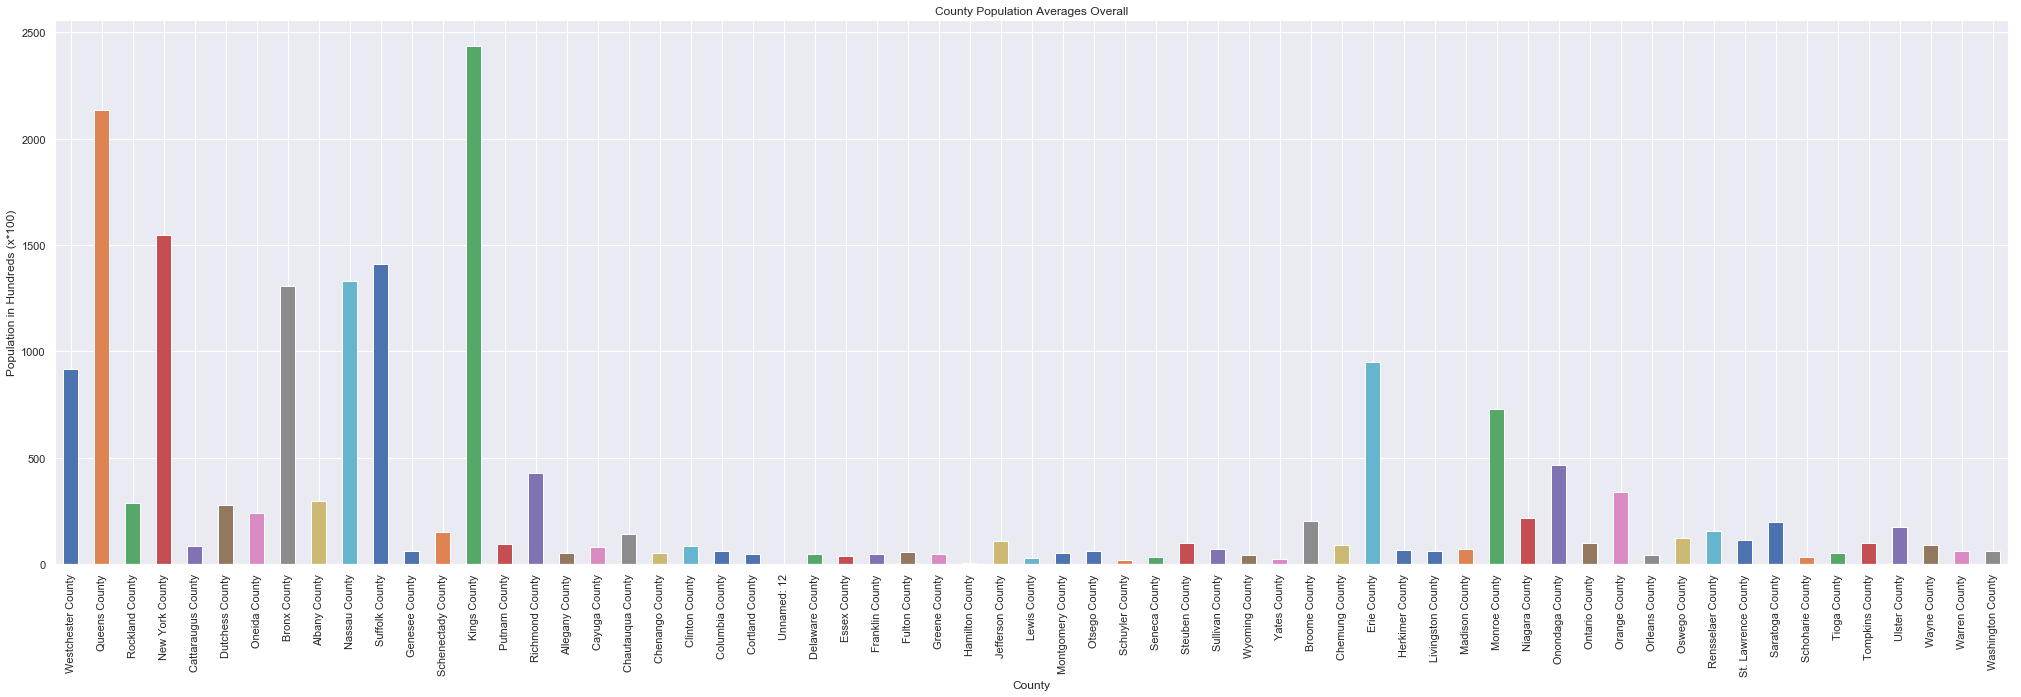

In [437]:
percent_and_averages['Average'].plot.bar()
plt.savefig('County Population Averages Overall')
plt.title('County Population Averages Overall')
plt.ylabel('Population in Hundreds (x*100)')
plt.xlabel('County')
plt.show()
#We see that certain counties with an overall increase in average.

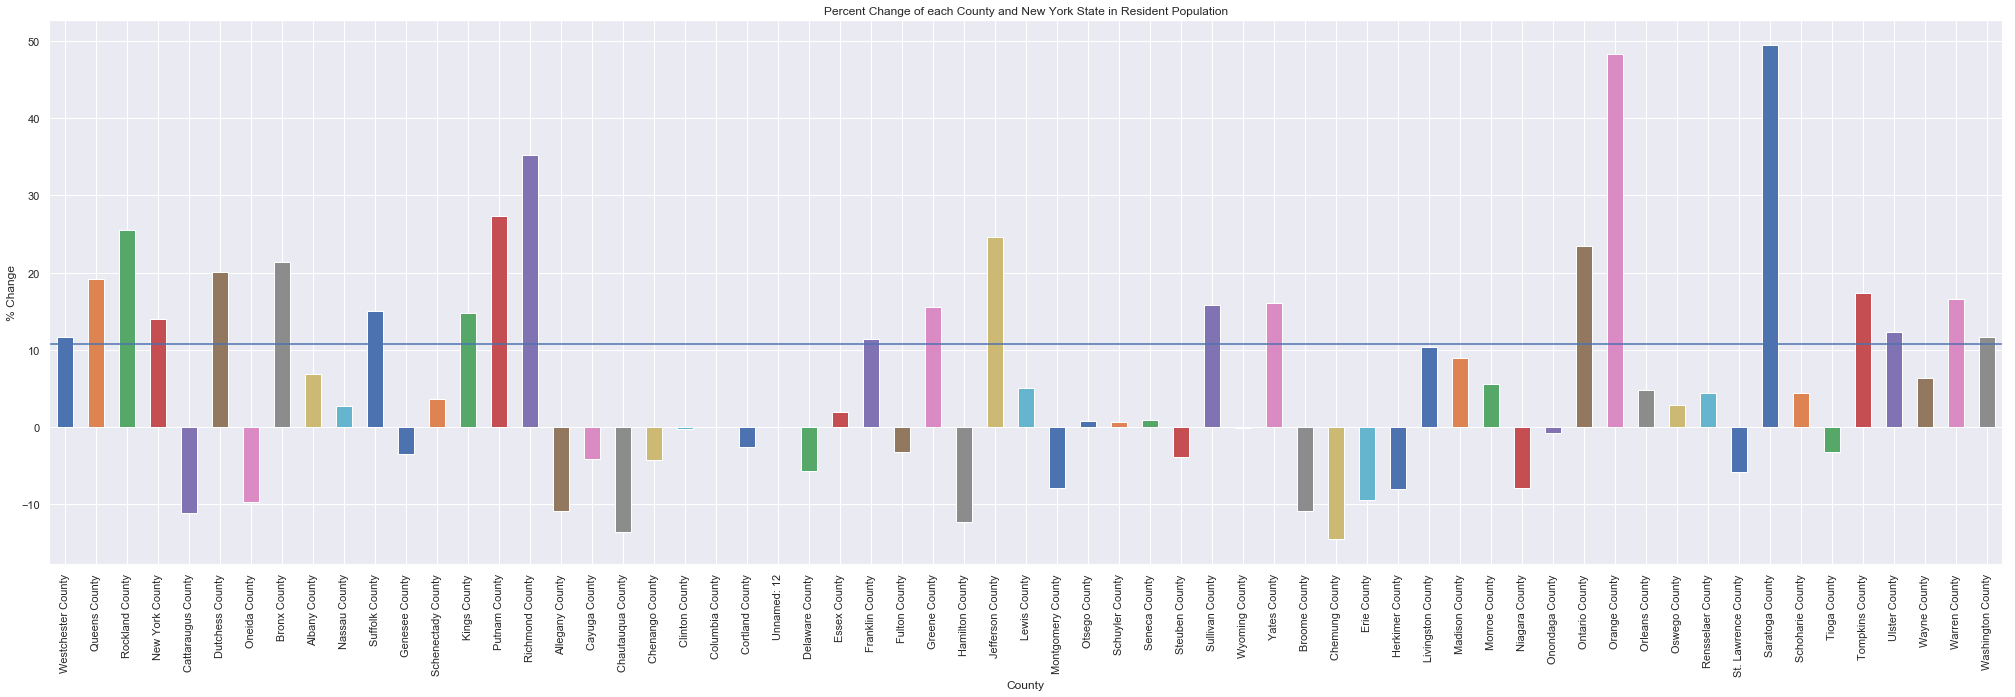

In [438]:
percent_graph = percent_and_averages['Percent Change %'].plot.bar()
percent_graph.axhline(NYS_percent_change) #At least a 250% increase
plt.savefig("Percent Change of each County and New York State")
plt.title("Percent Change of each County and New York State in Resident Population")
plt.ylabel('% Change')
plt.xlabel('County')
plt.show()
#We see certain counties with a percent decrease

In [439]:
#Who is still in the race? From the above, we will eliminate those below the NYS percent change average.
#Why? Because if any county is below the NYS average, that tells me that those coming to live in NYS choose
#those counties above the line, and not below. **Remember** I want the hustle and bustle!

#Westchester
#Queens
#Rockland
#New York
#Dutchess
#Bronx
#Suffolk
#Kings
#Putnam
#Richmond
#Franklin
#Greene
#Jefferson
#Sullivan
#Yates
#Ontario
#Orange
#Saratoga
#Tompkins
#Ulster
#Warren
#Washington

# Step 2b: Analyze Median Data - And then there were 22.
We have median data starting from 1989.

In [440]:
#Now let's look at median data
median_data = median_data.dropna()
median_data.head()
median_data = median_data.rename({'1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
median_data = median_data.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
median_data = median_data.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
median_data.shape



(25, 64)

In [441]:
#Let's create a histogram to understand the distribution of each county
def median_histogram(str):
    plt.hist(x = median_data[str], bins = 5, cumulative = False, orientation='vertical')
    plt.savefig(str +' '+'Histogram')
    plt.title(str +' '+'Histogram')
    plt.ylabel('Frequency')
    plt.xlabel('Estimated Median Household Income')
    plt.show()

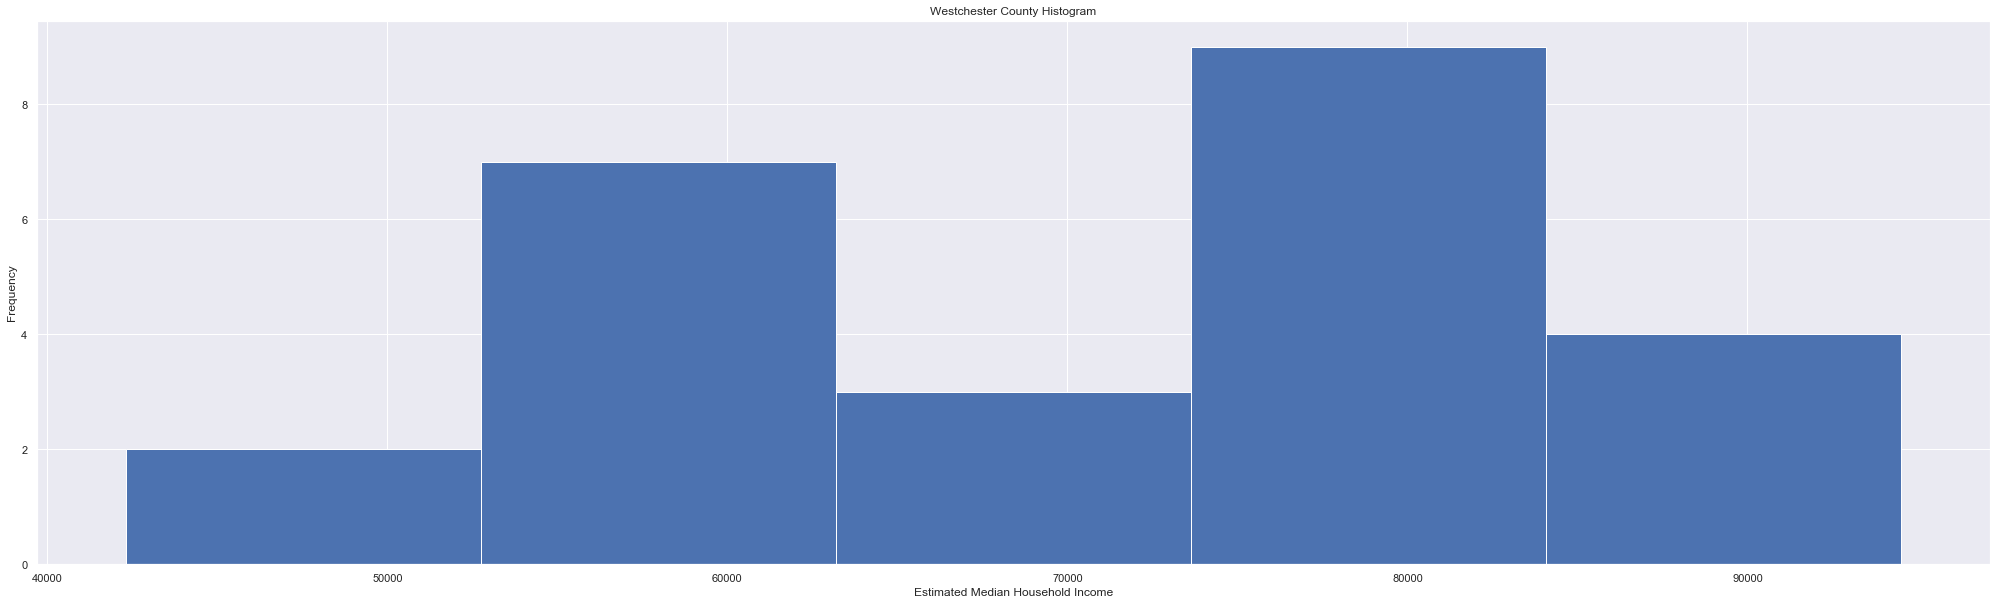

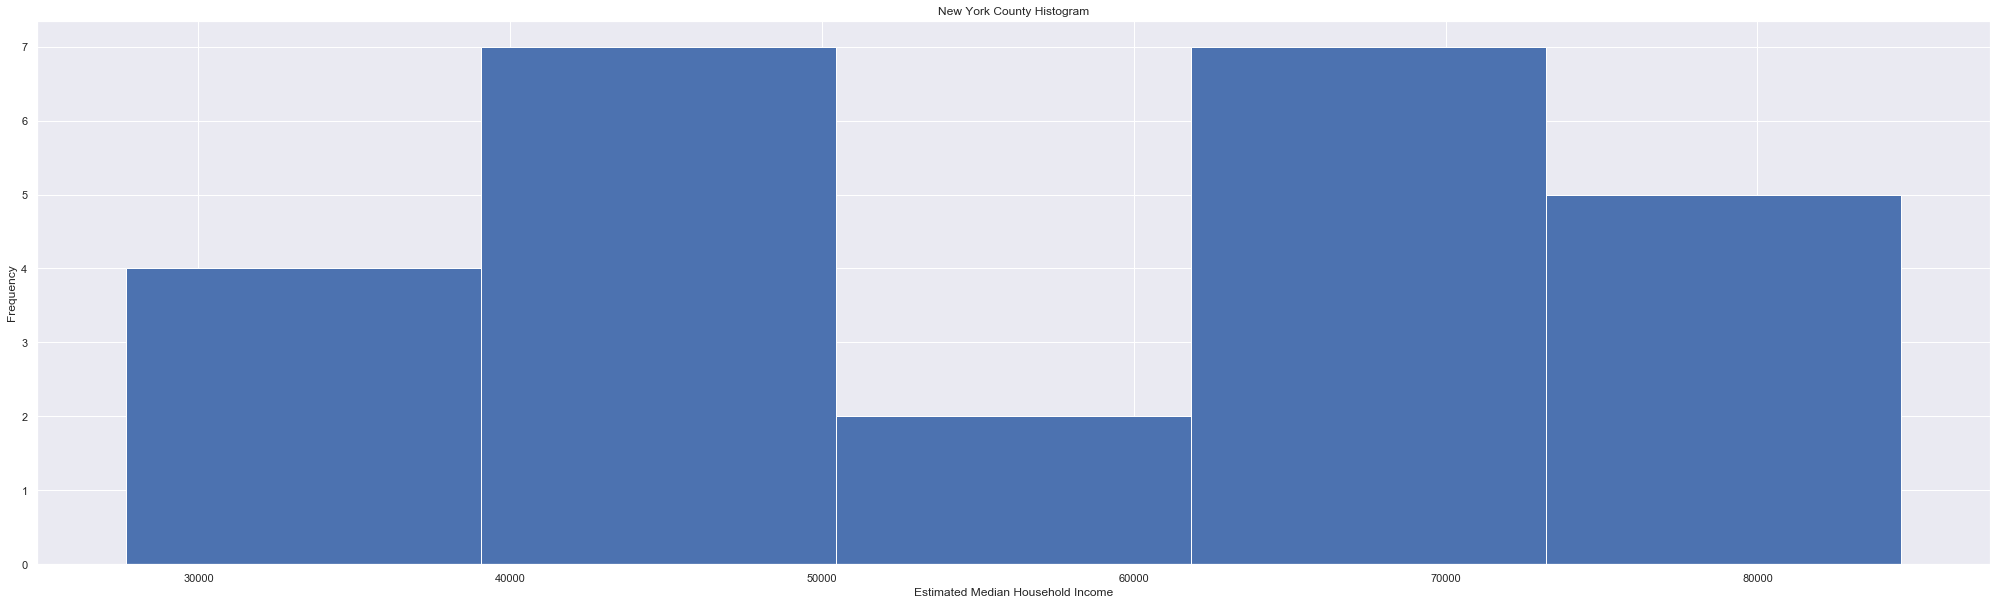

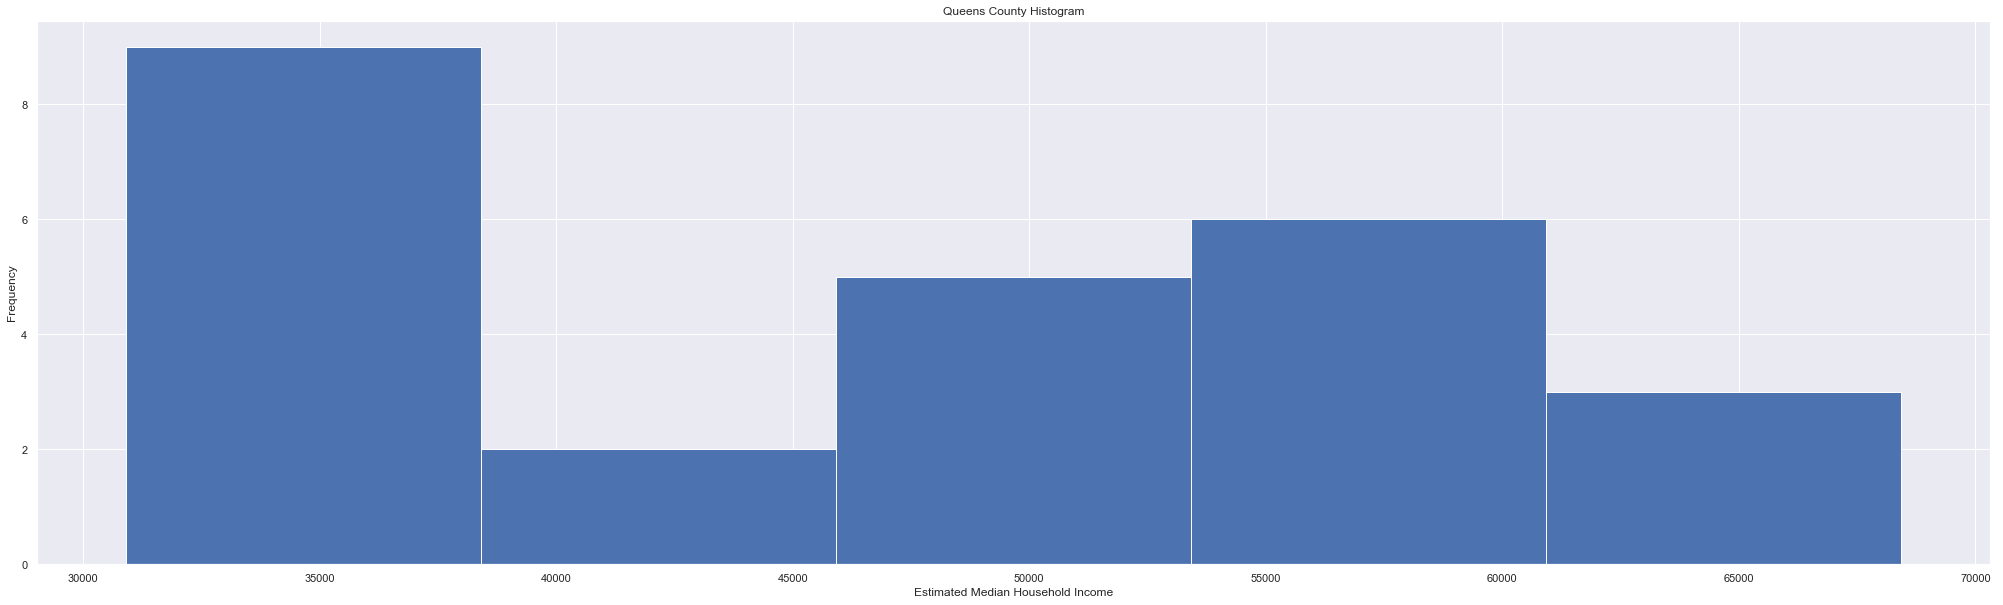

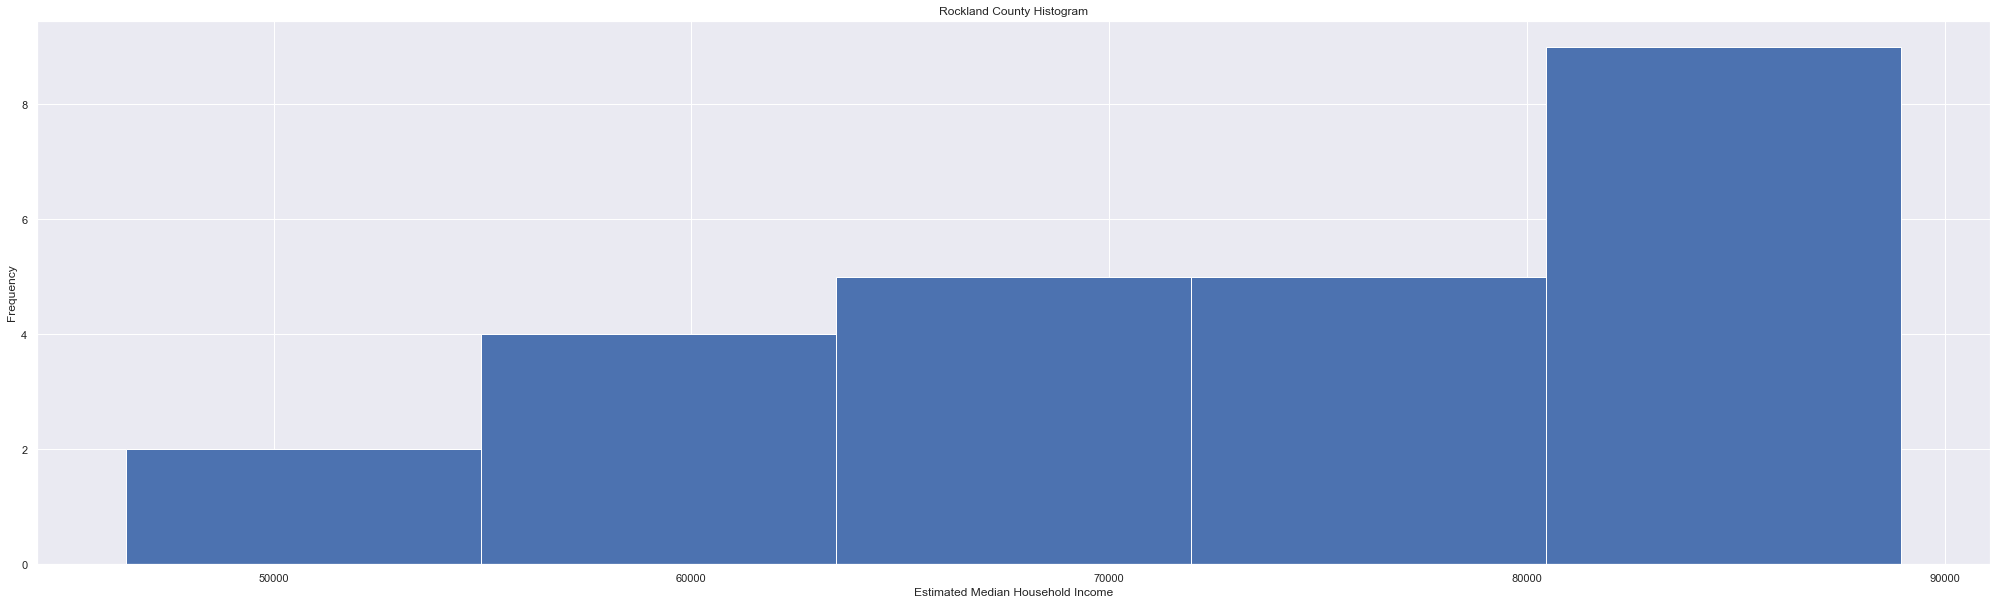

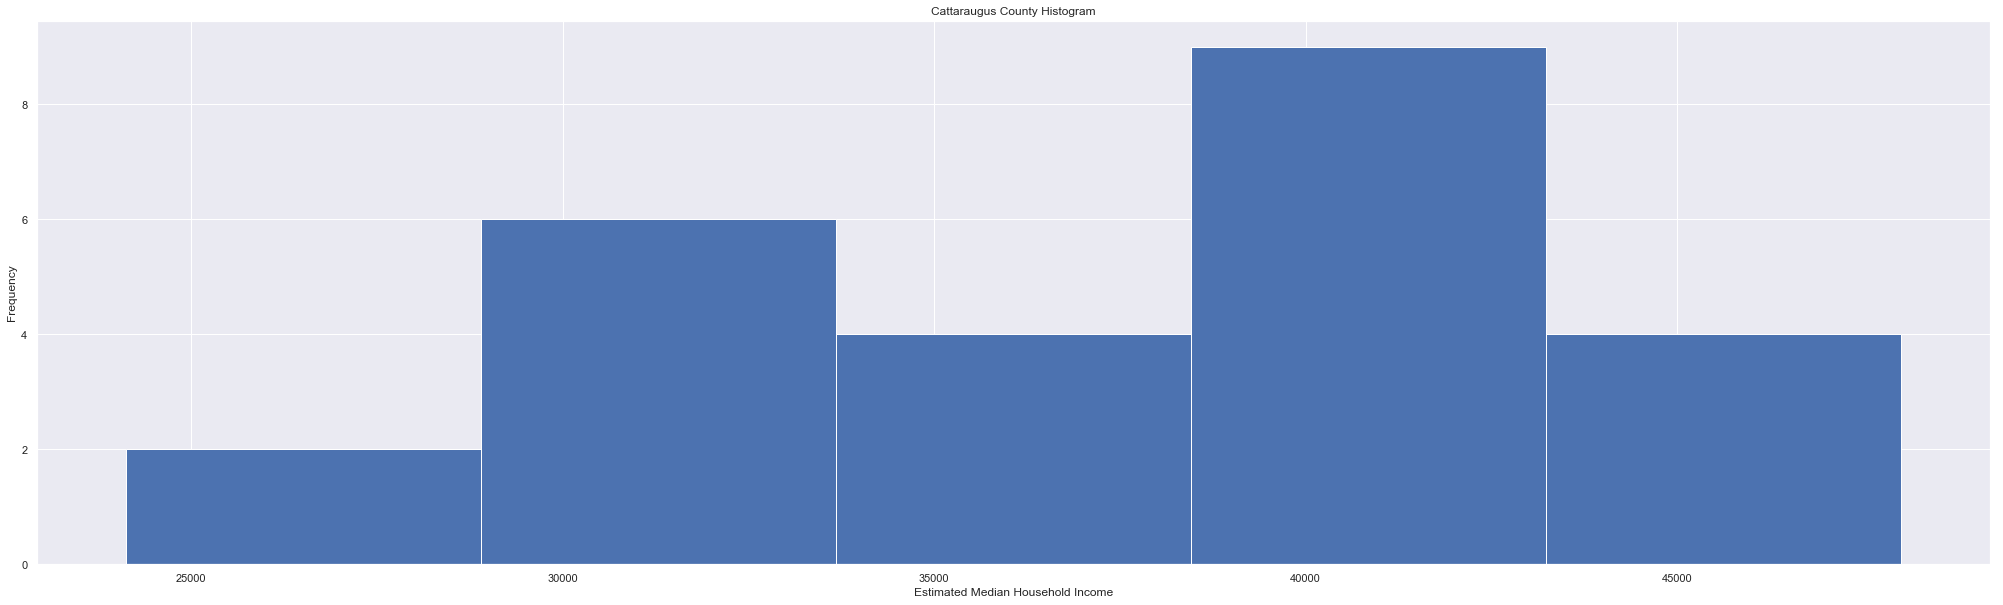

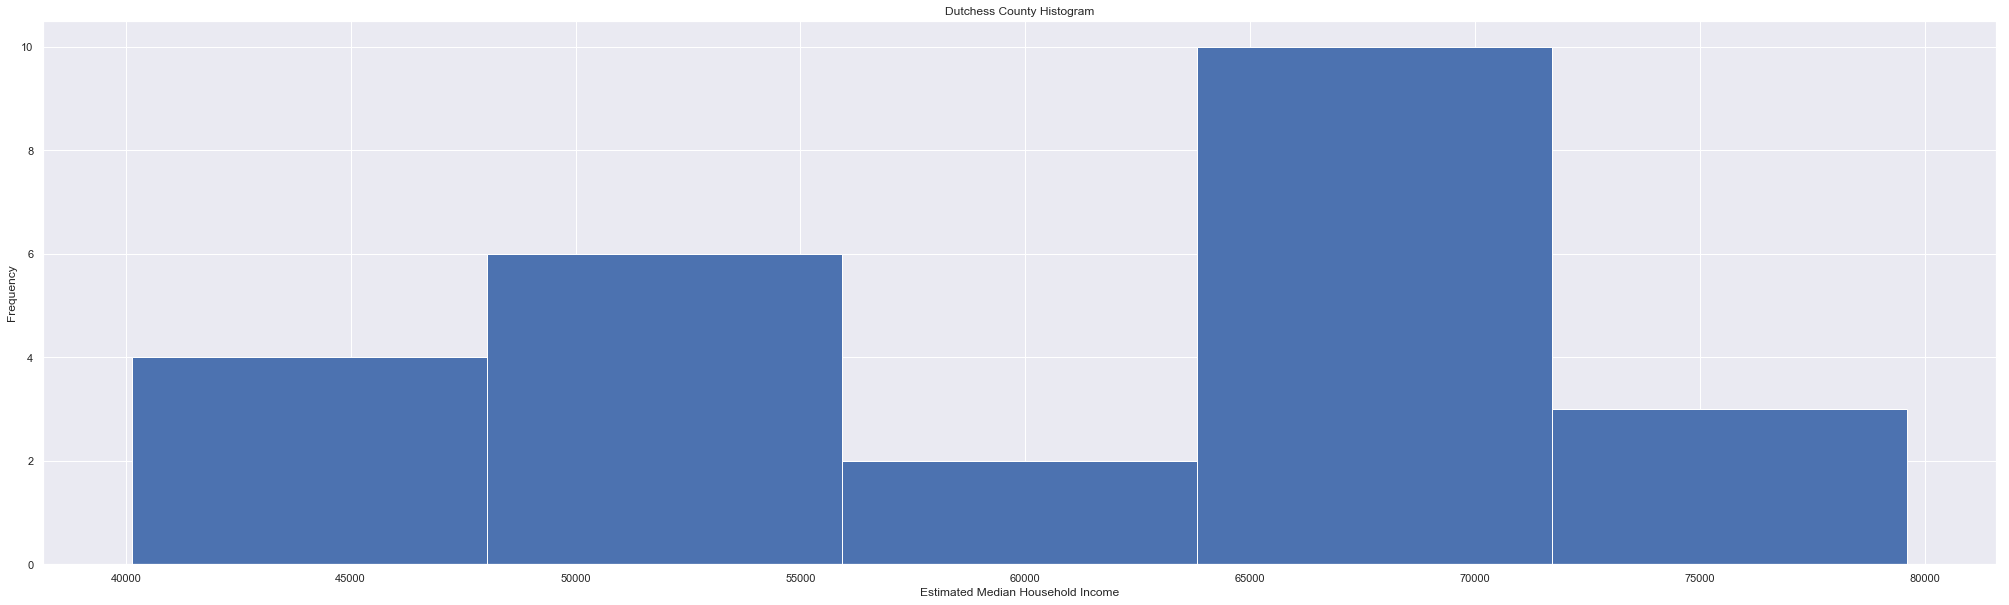

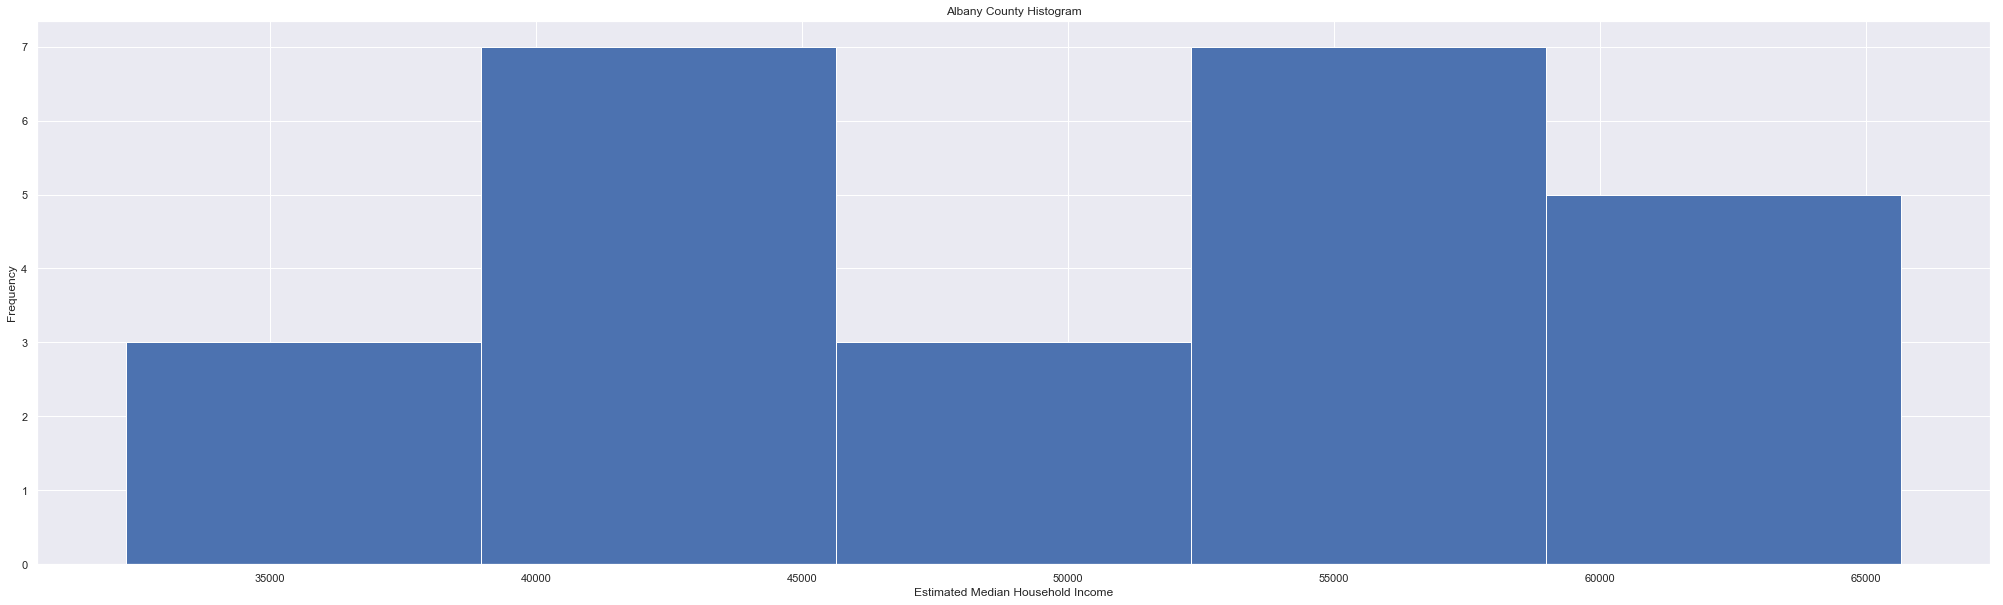

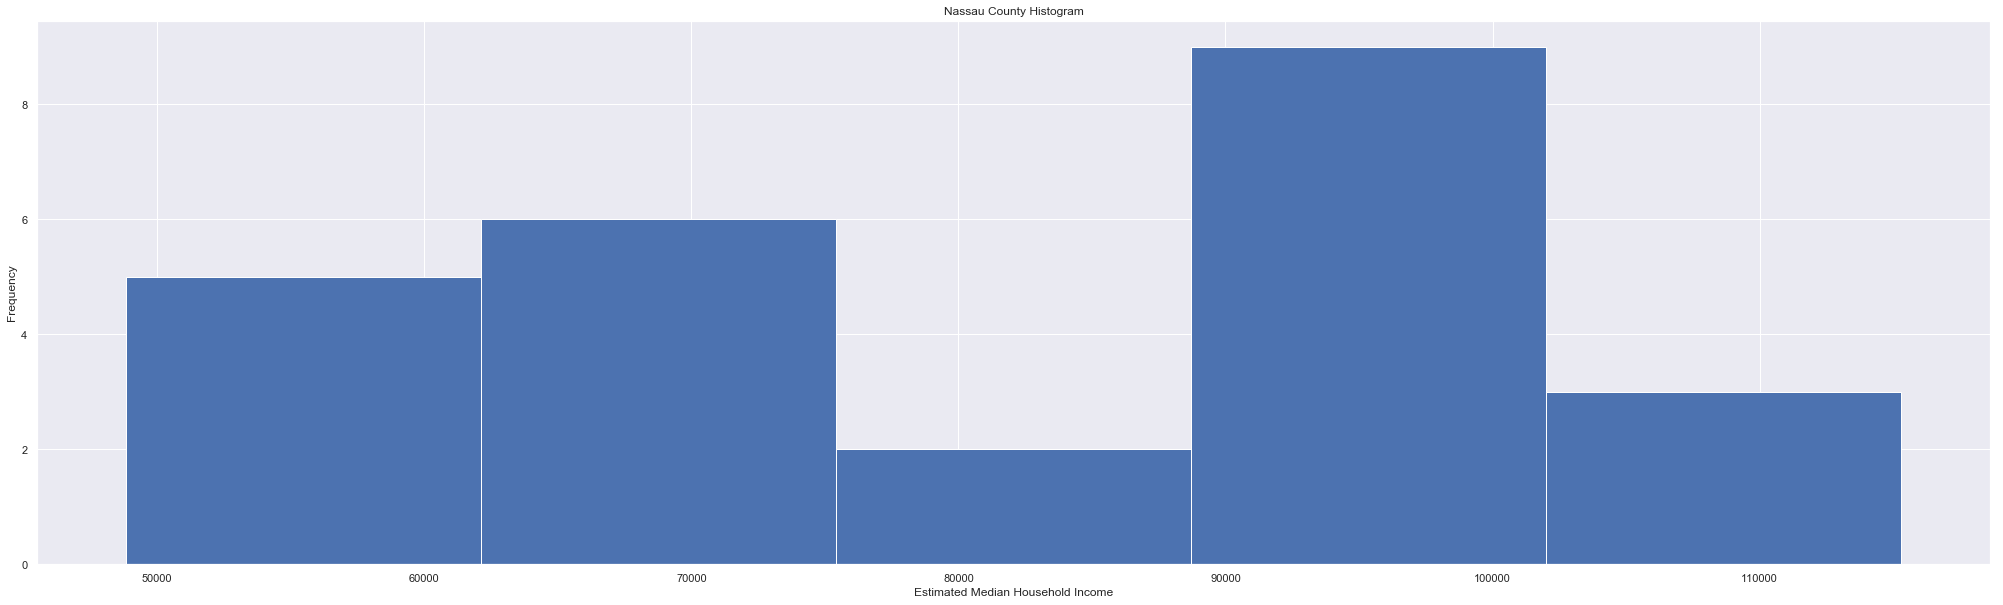

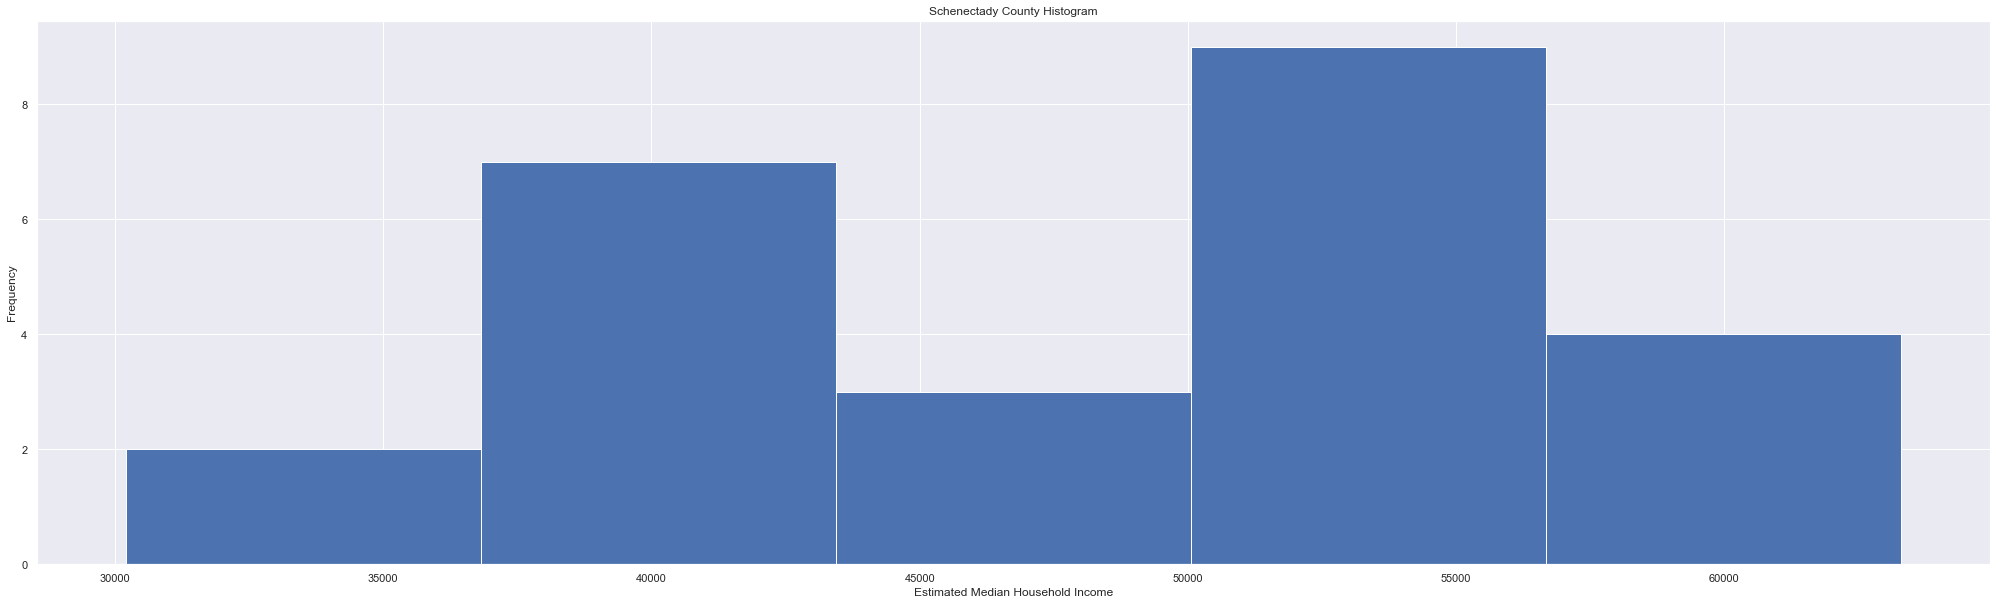

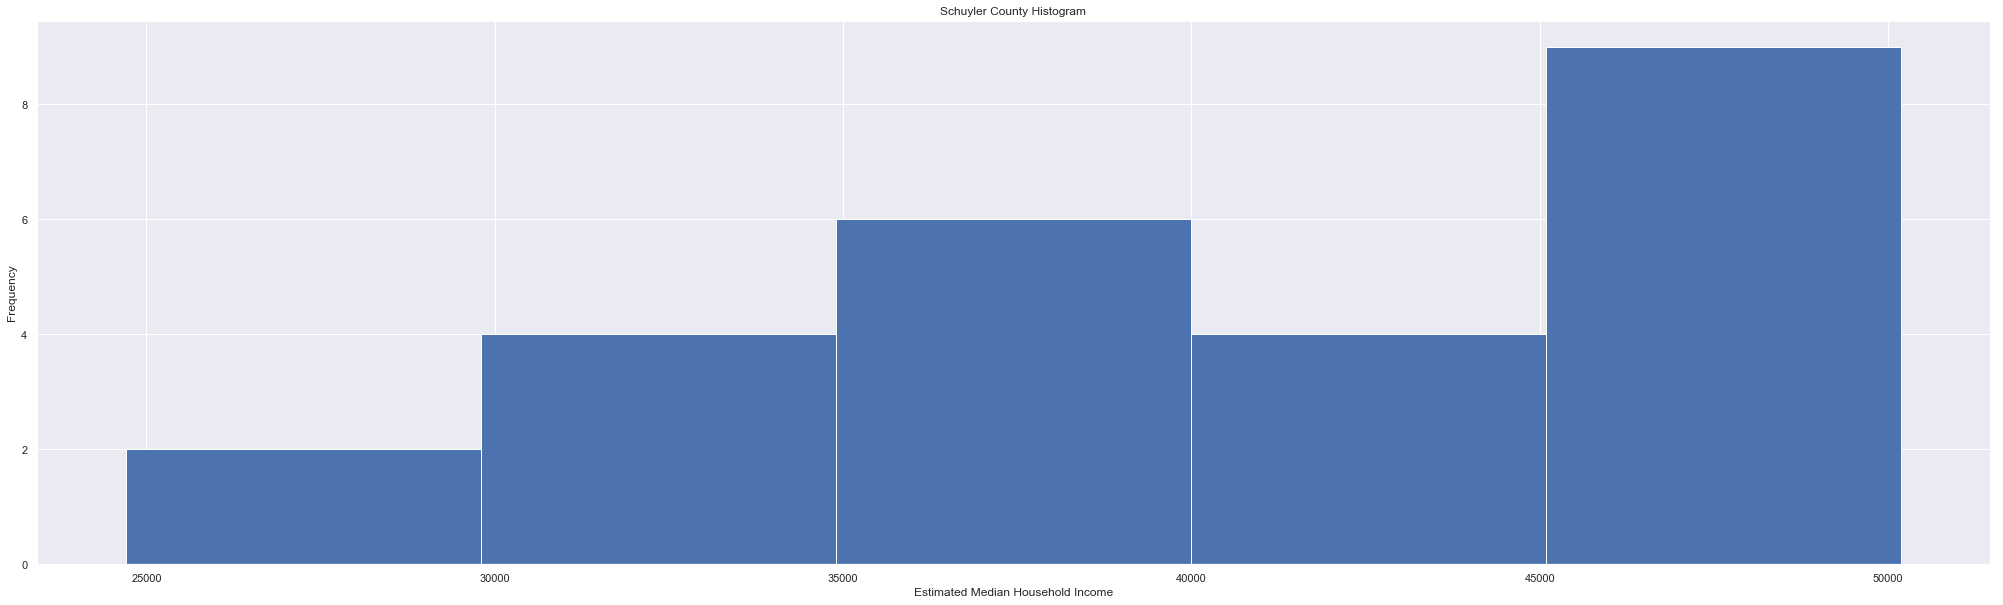

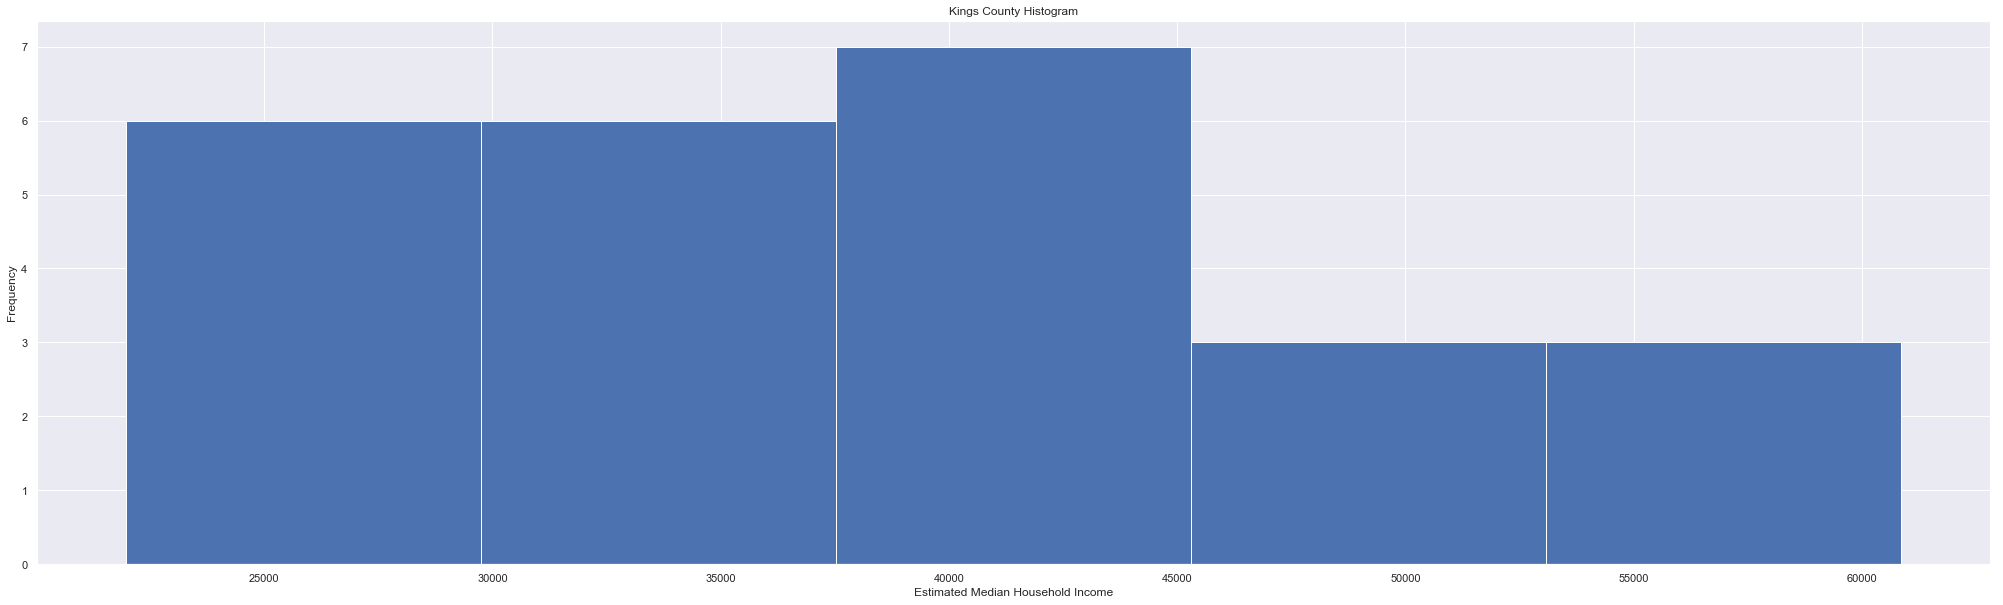

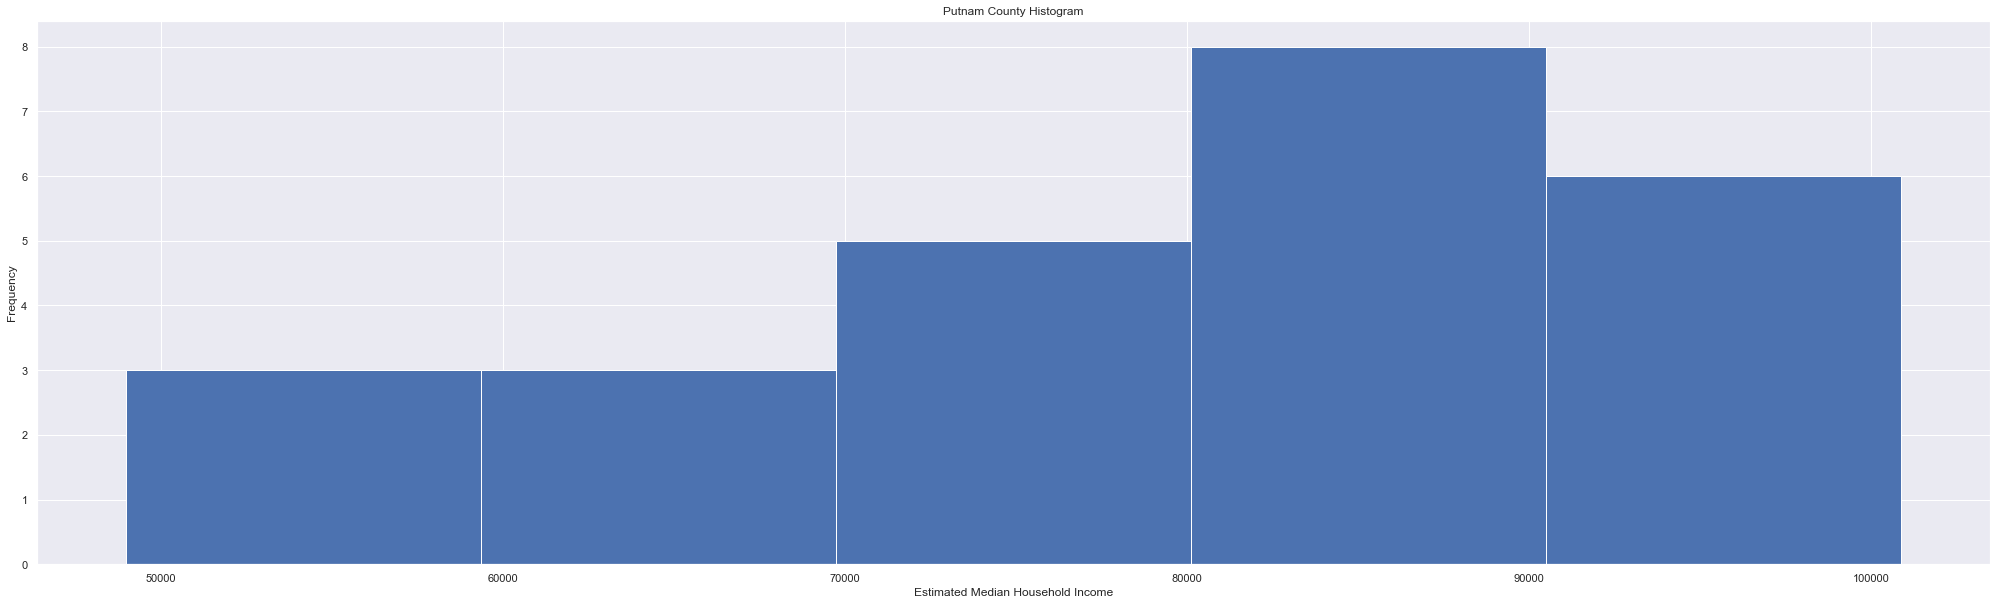

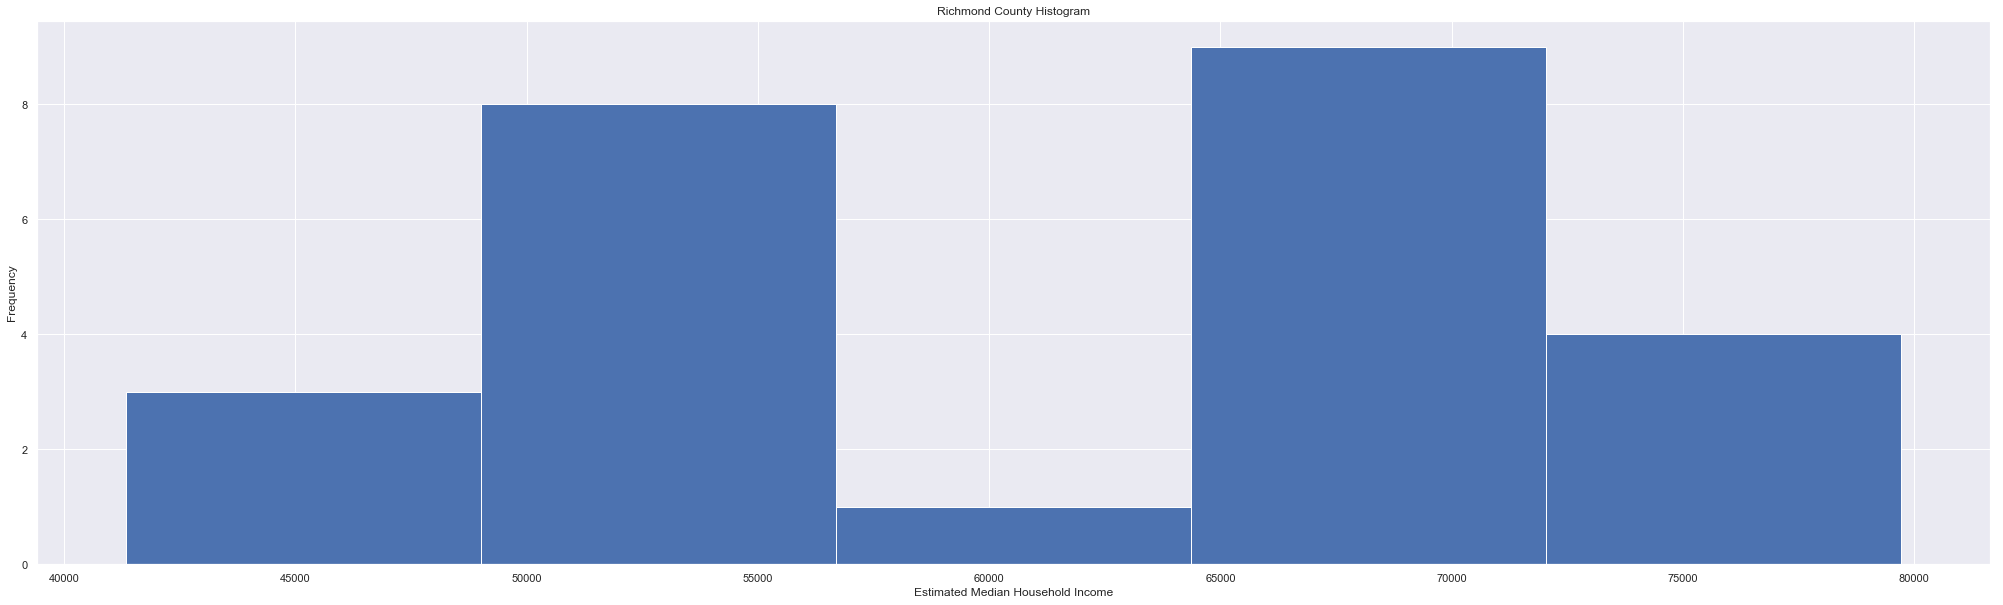

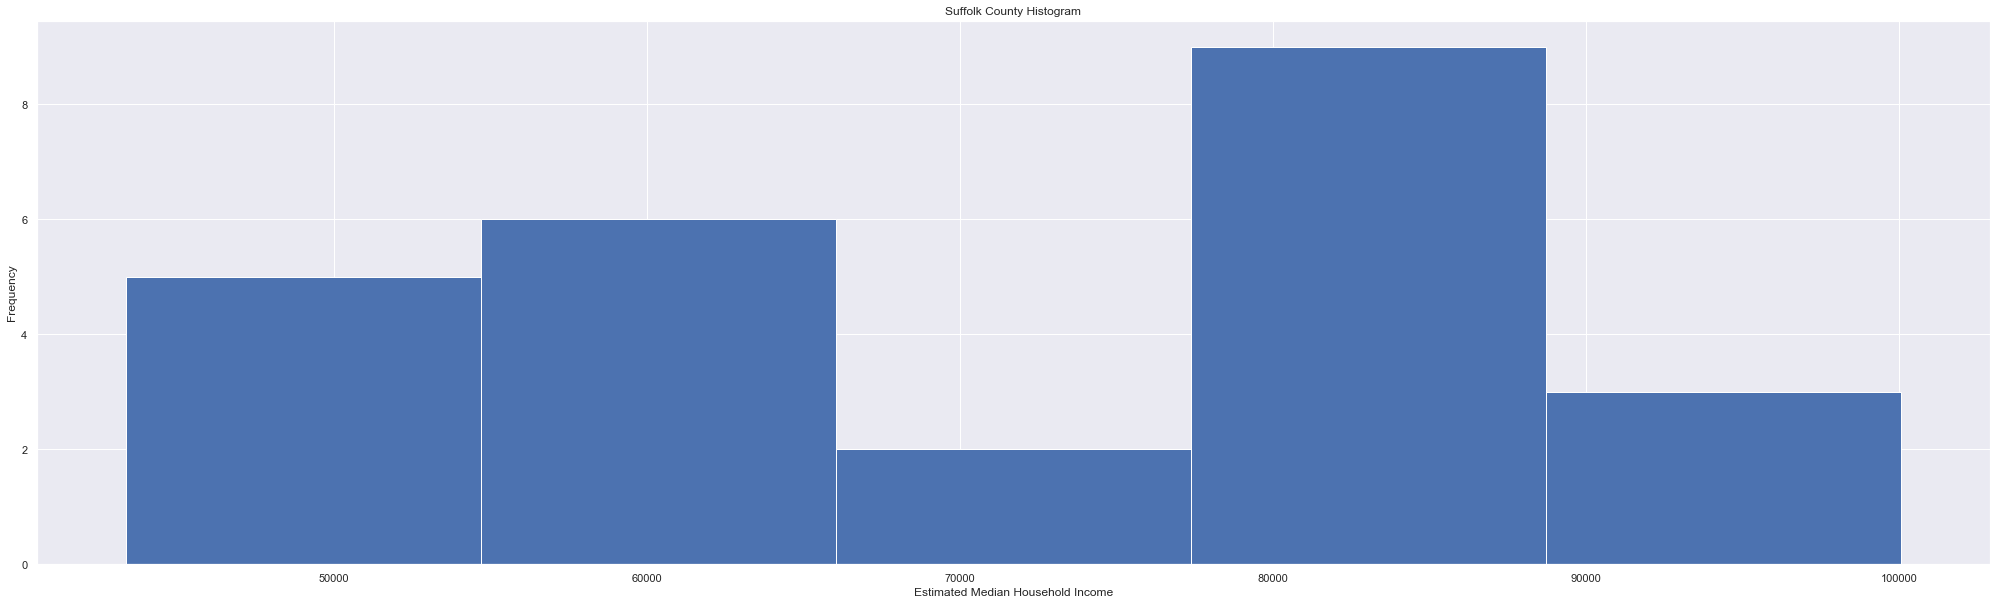

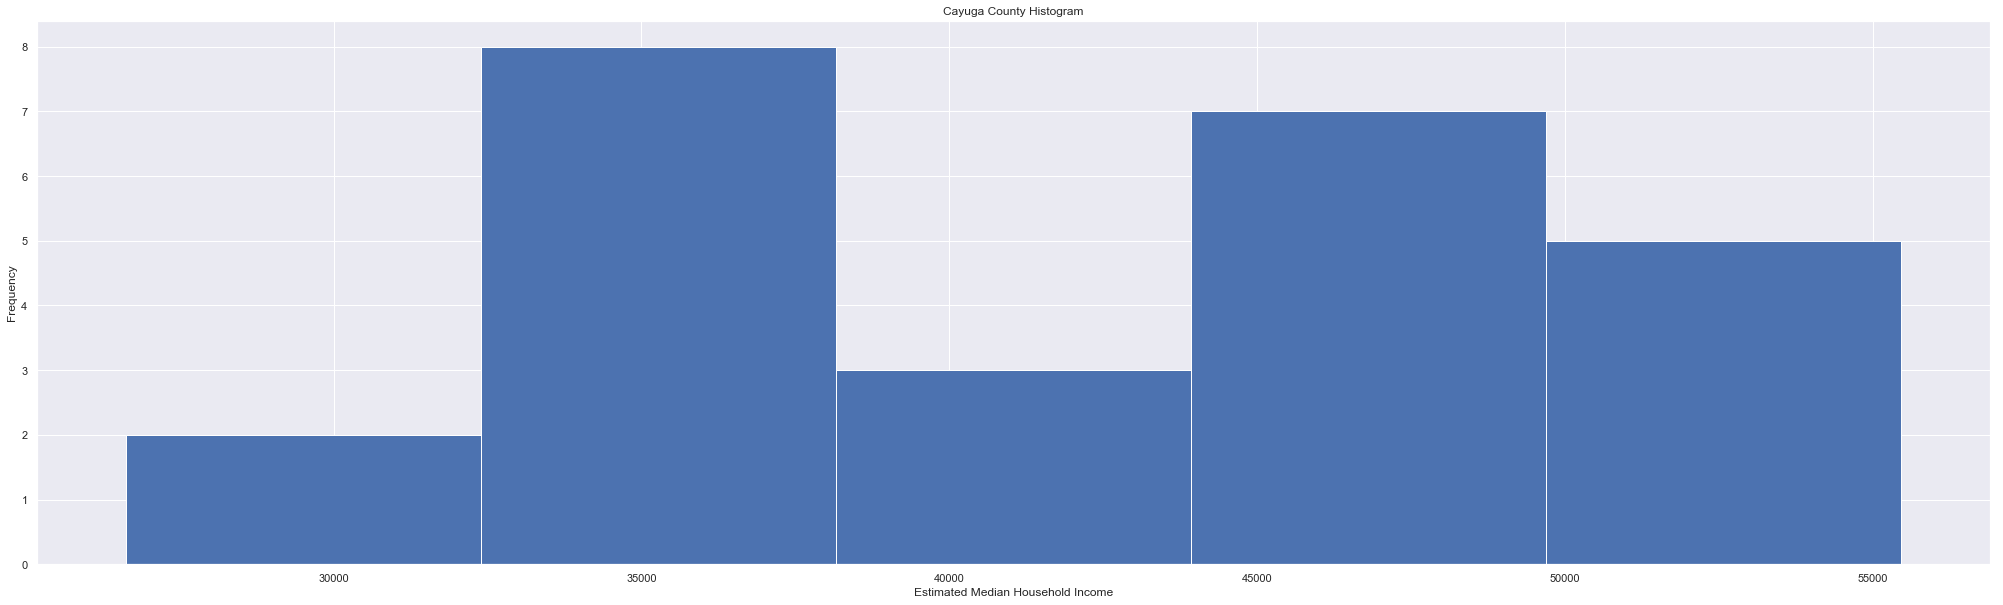

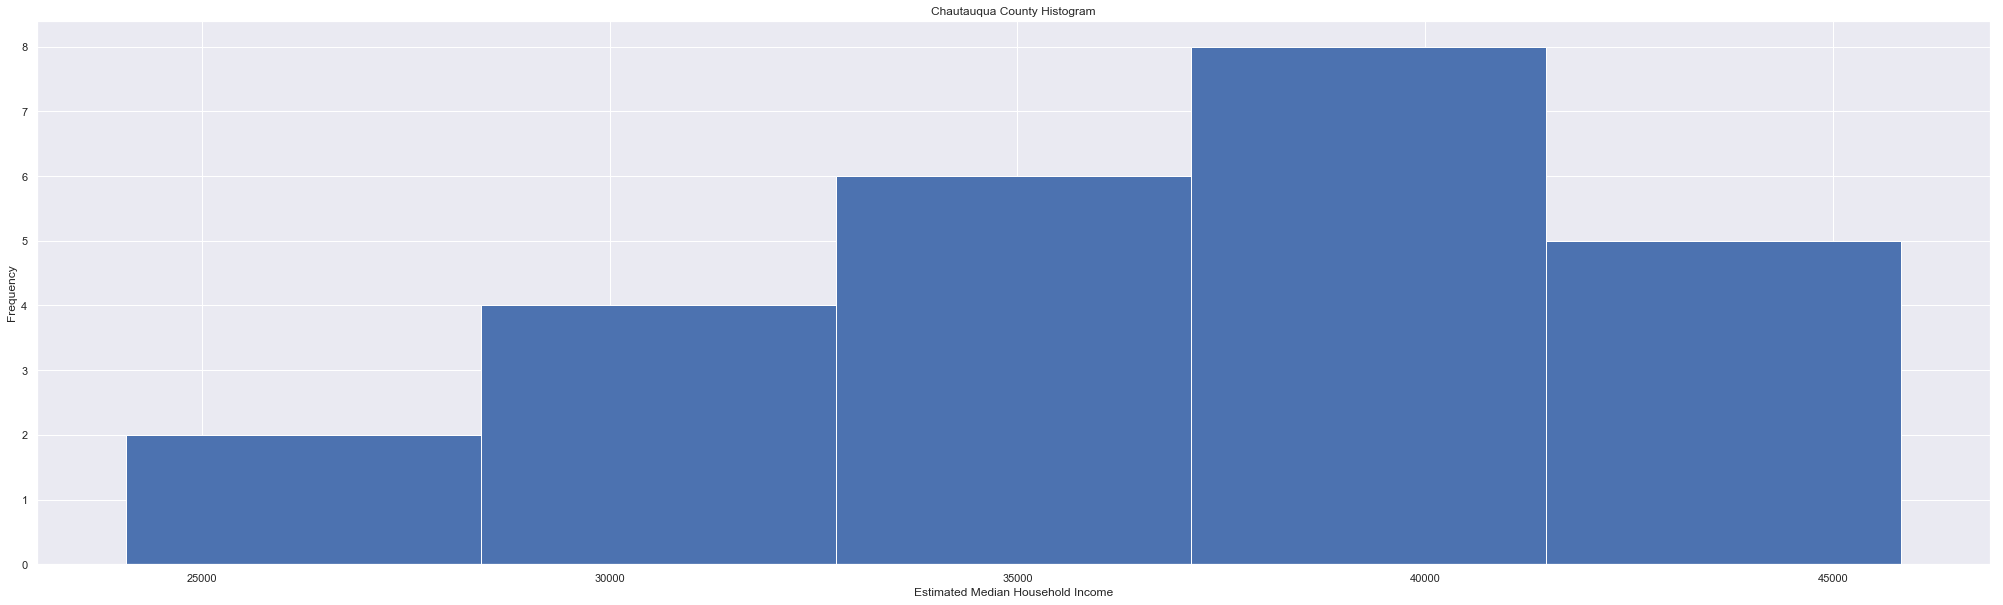

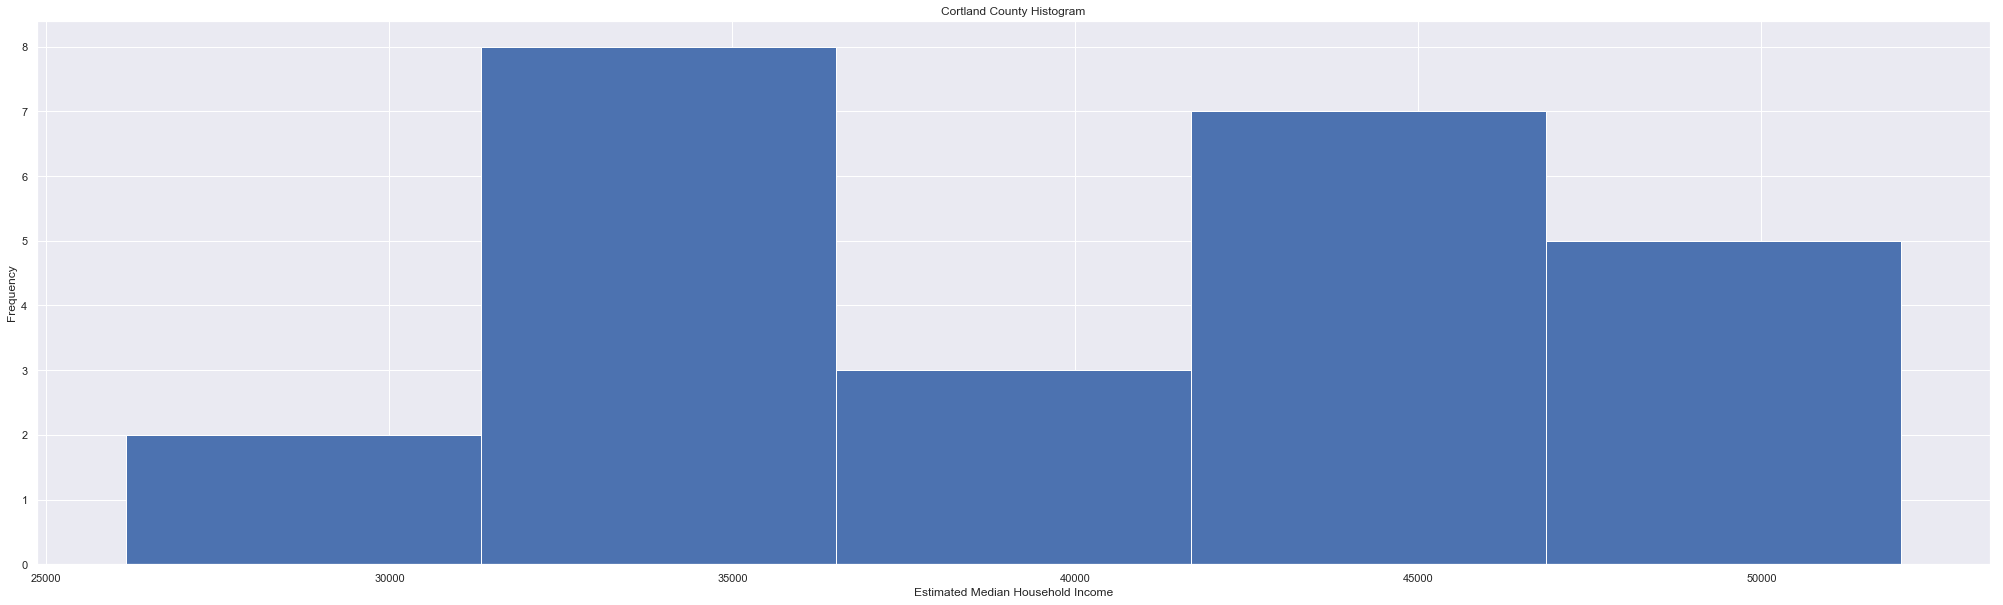

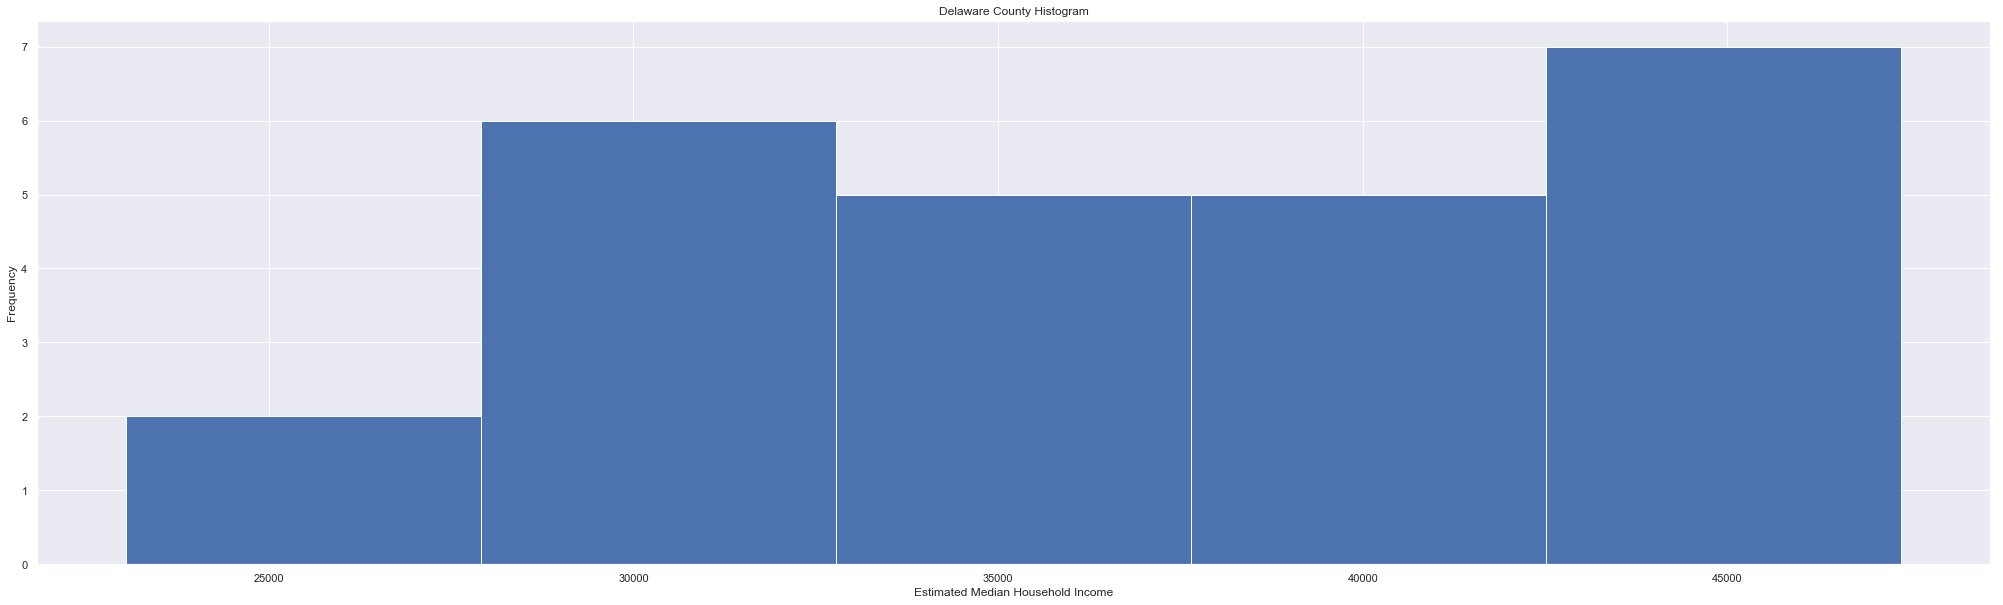

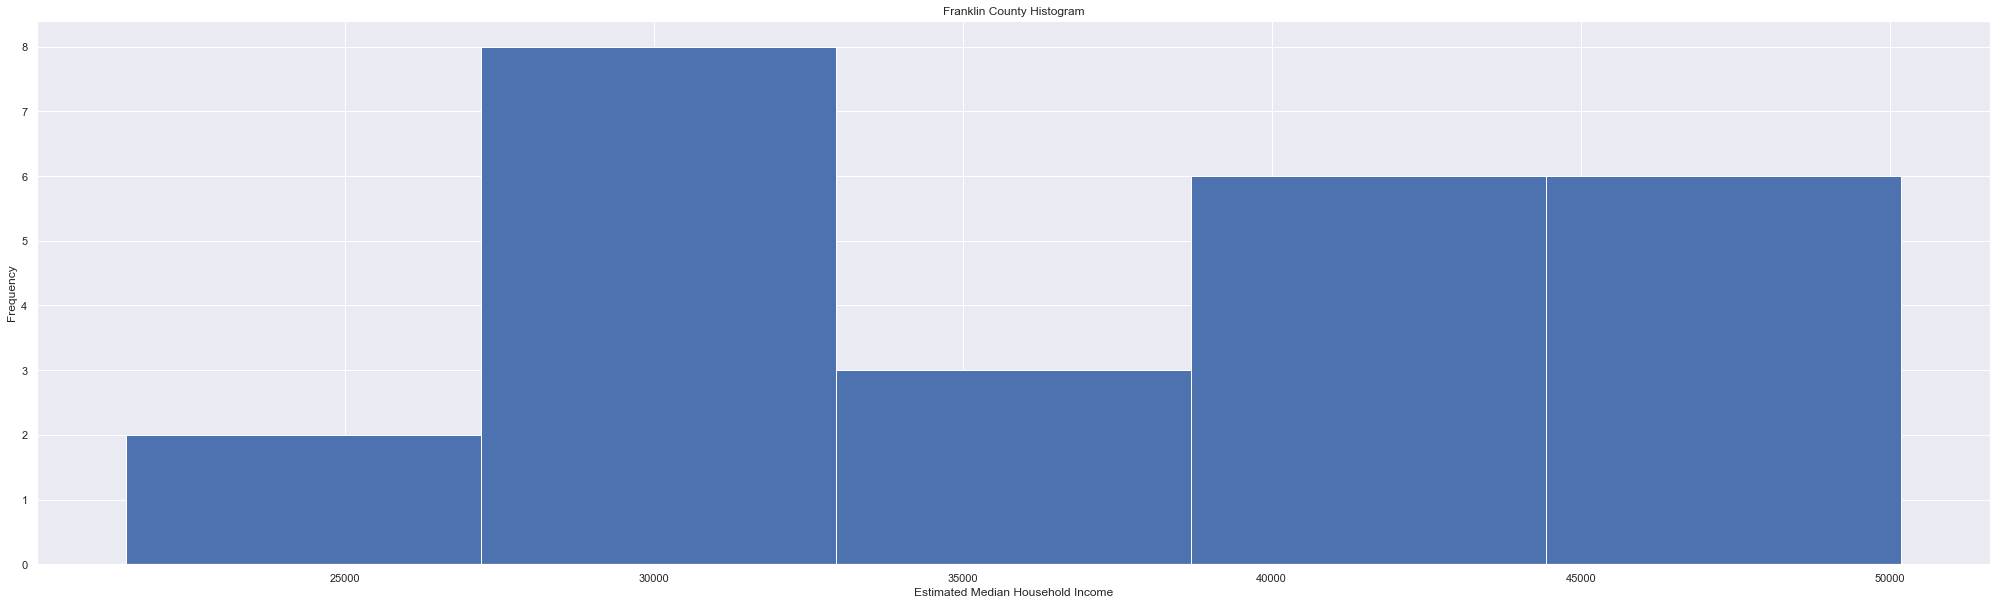

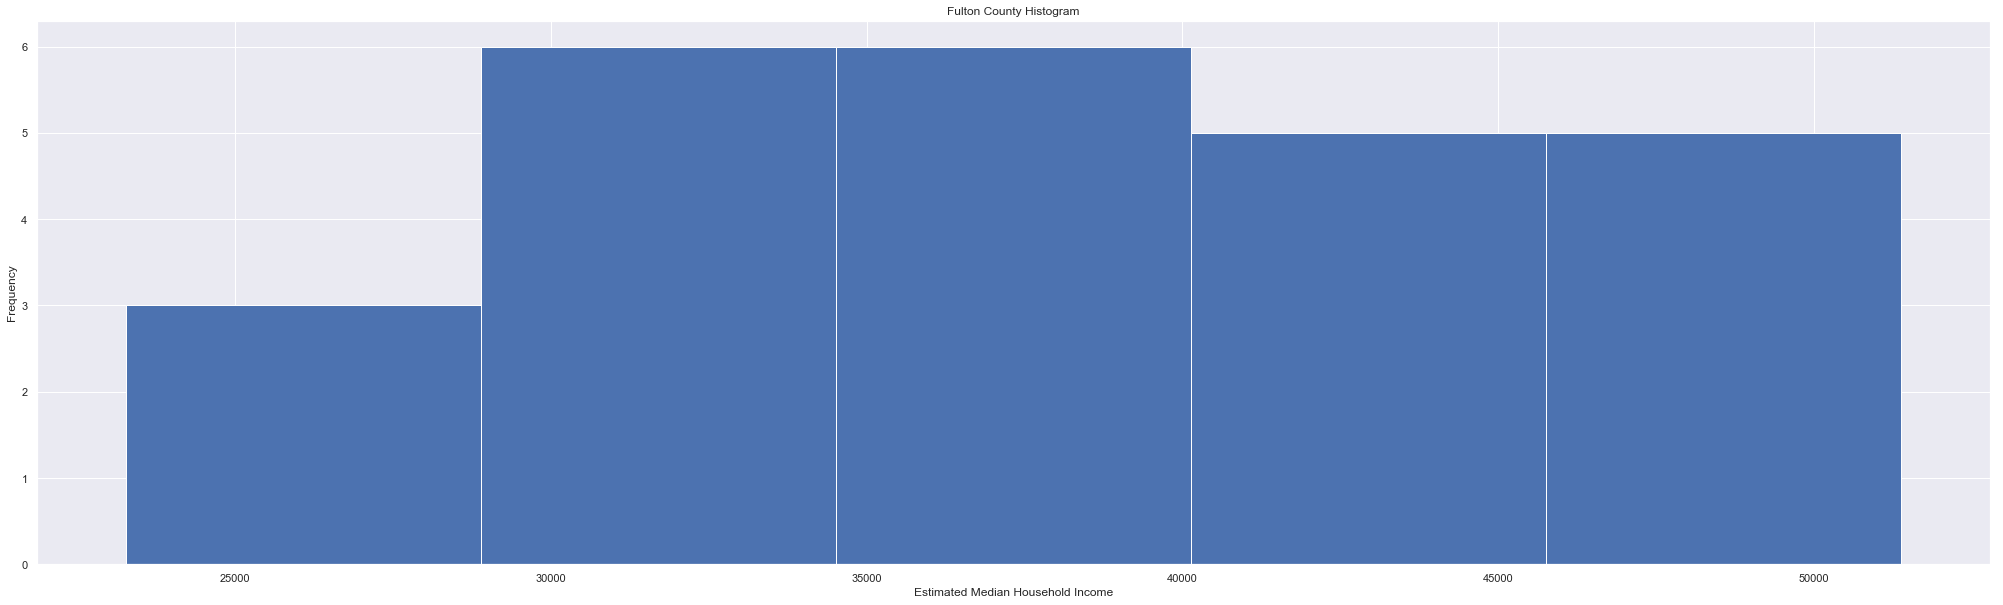

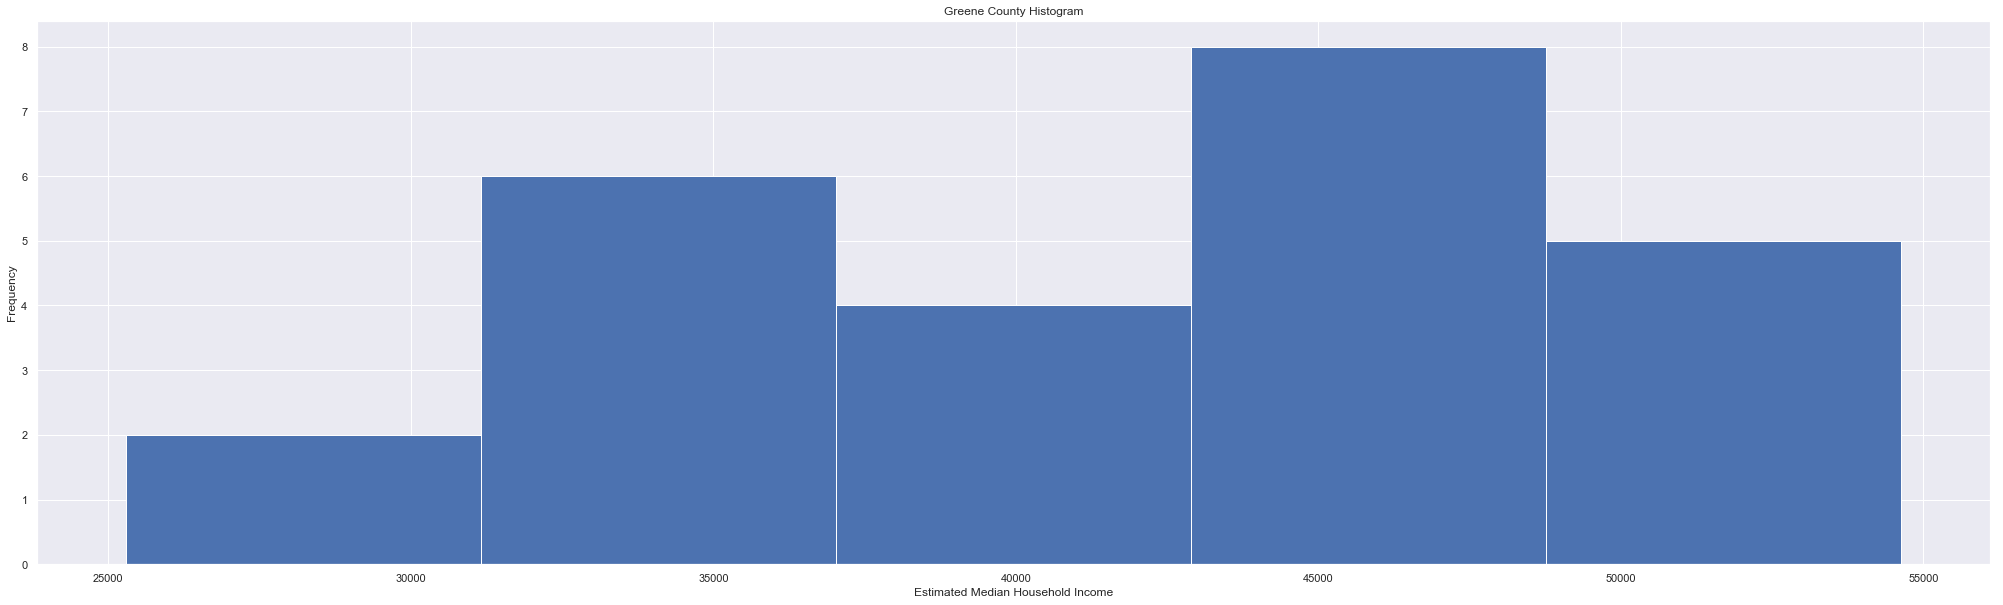

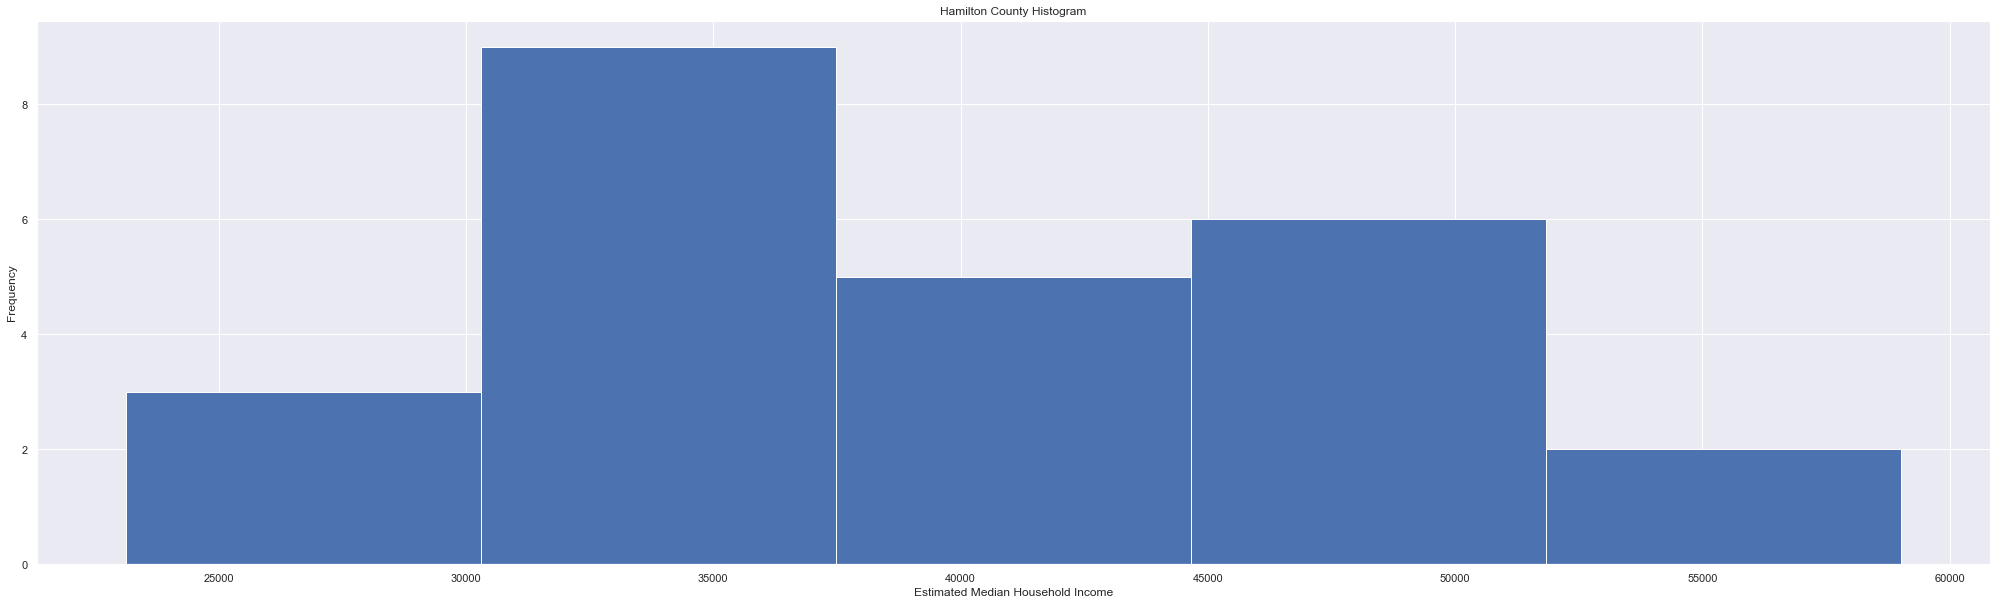

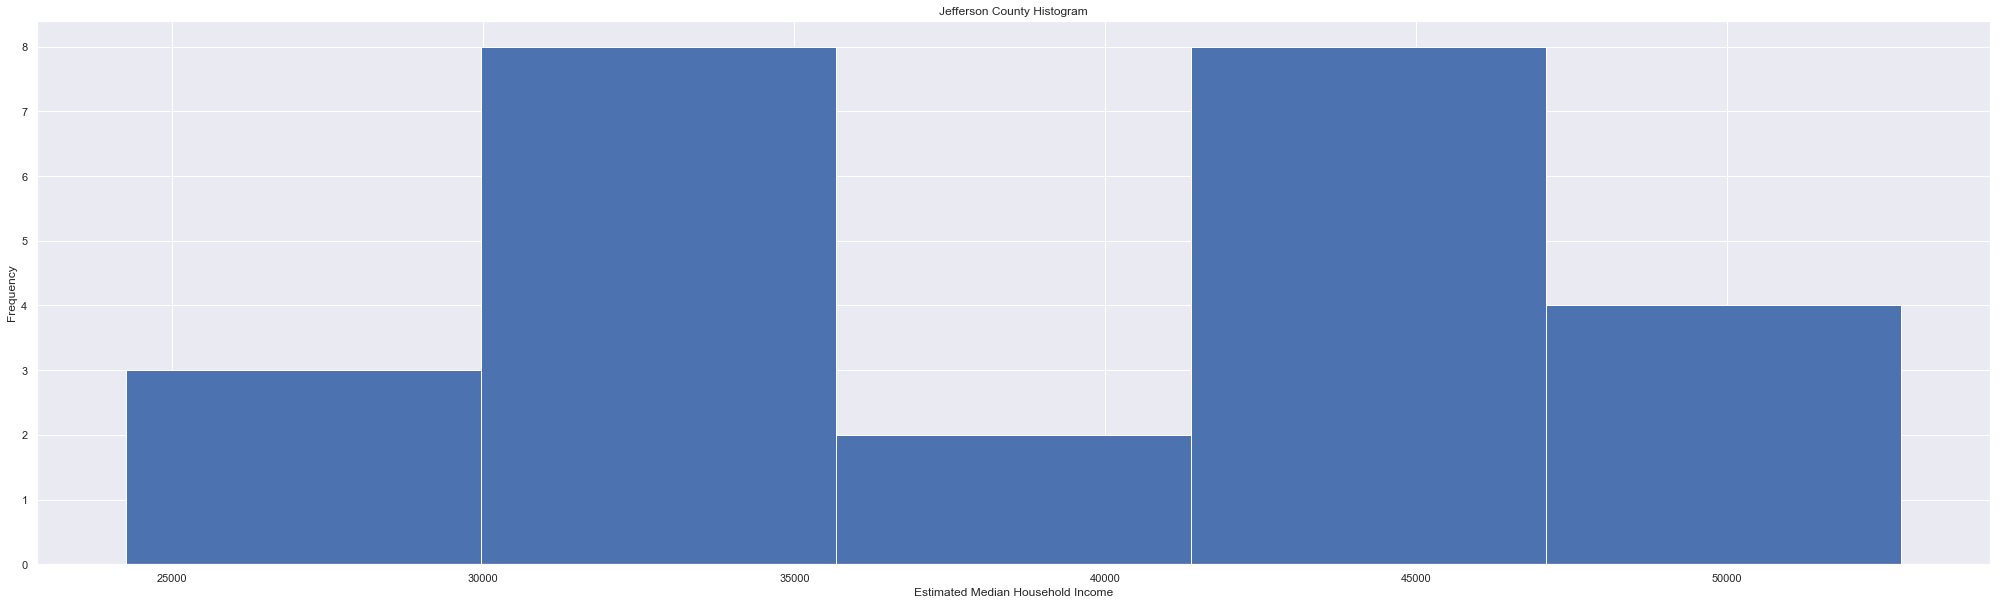

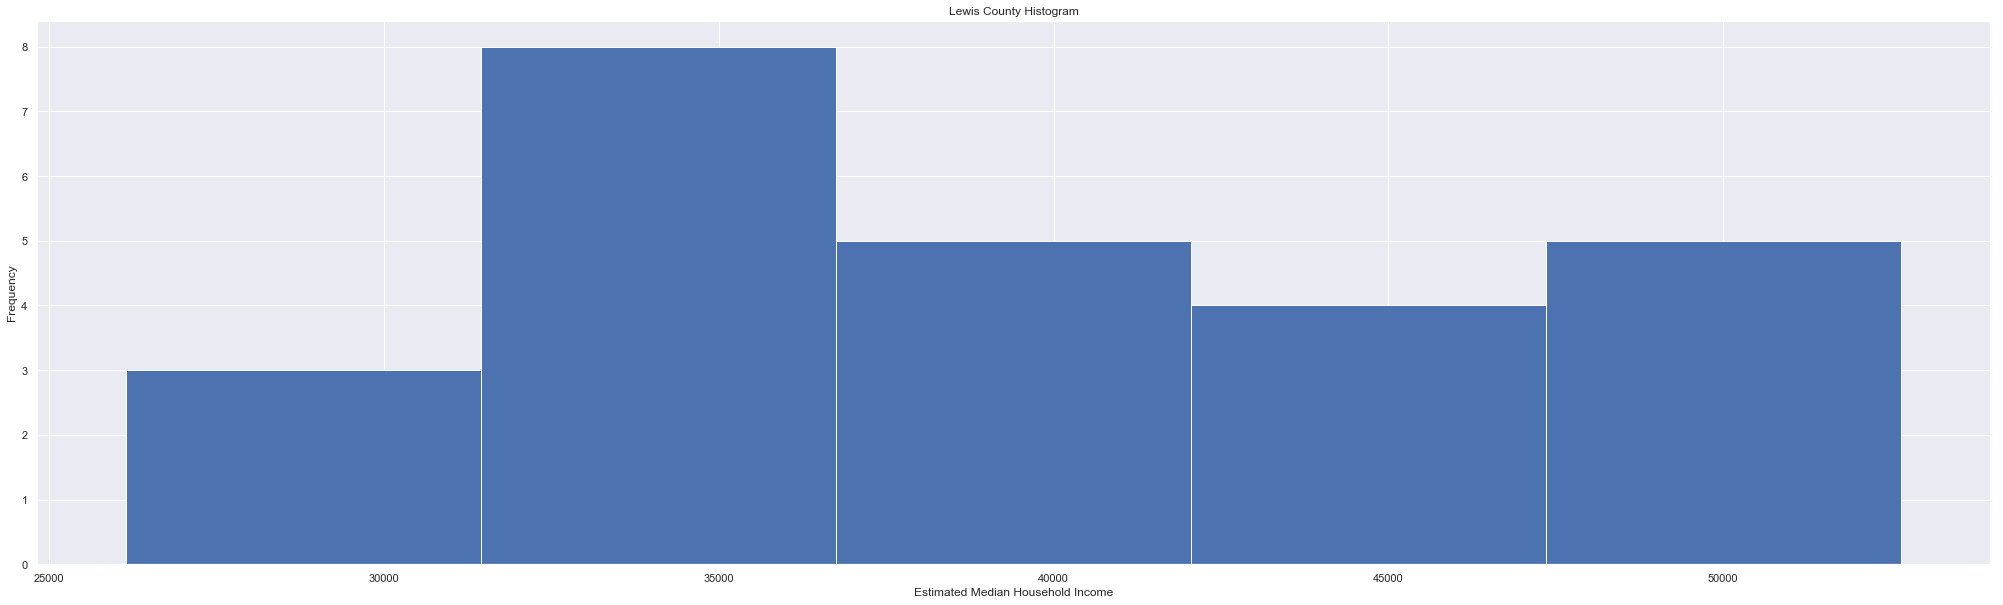

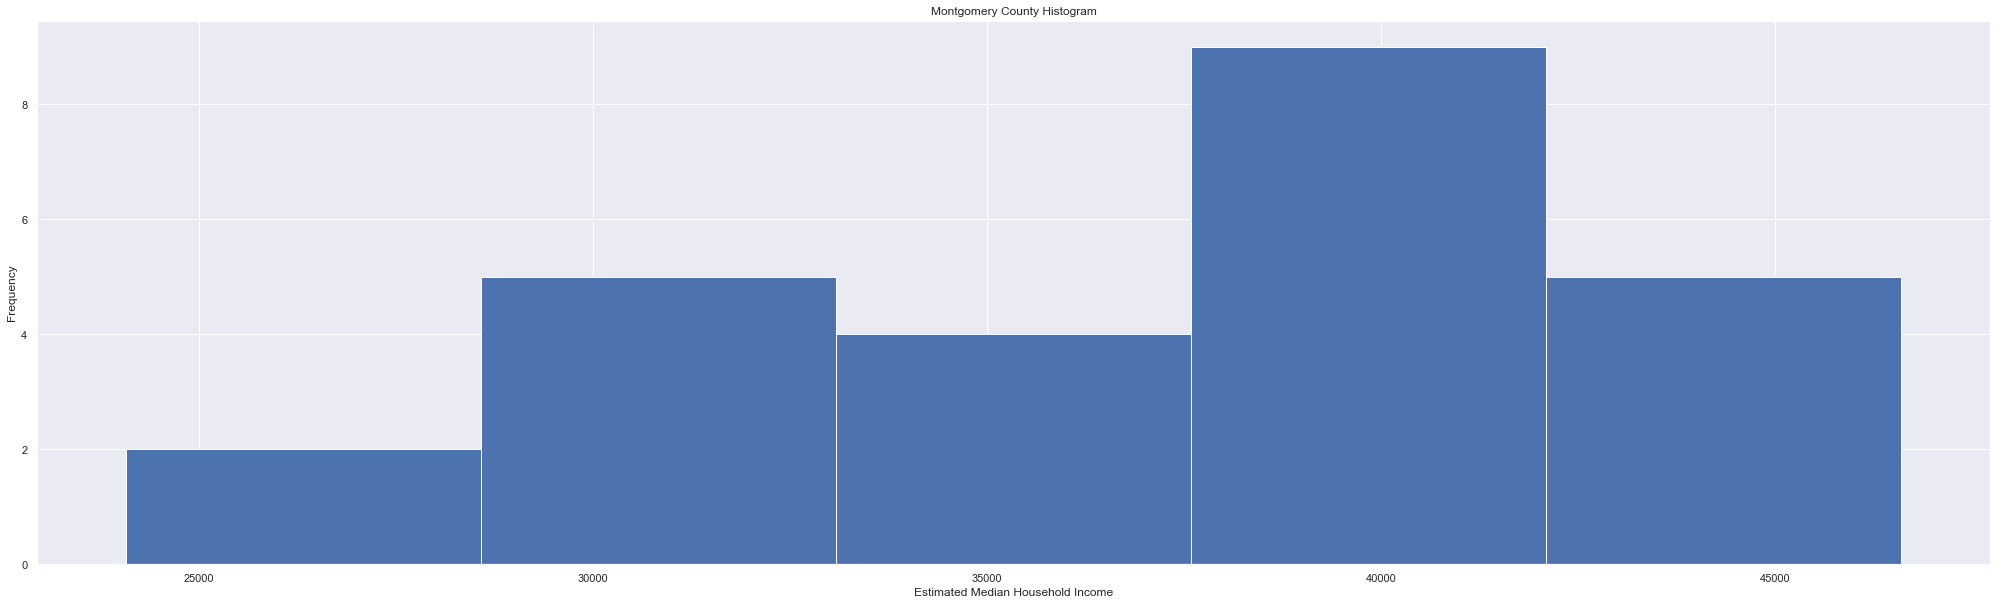

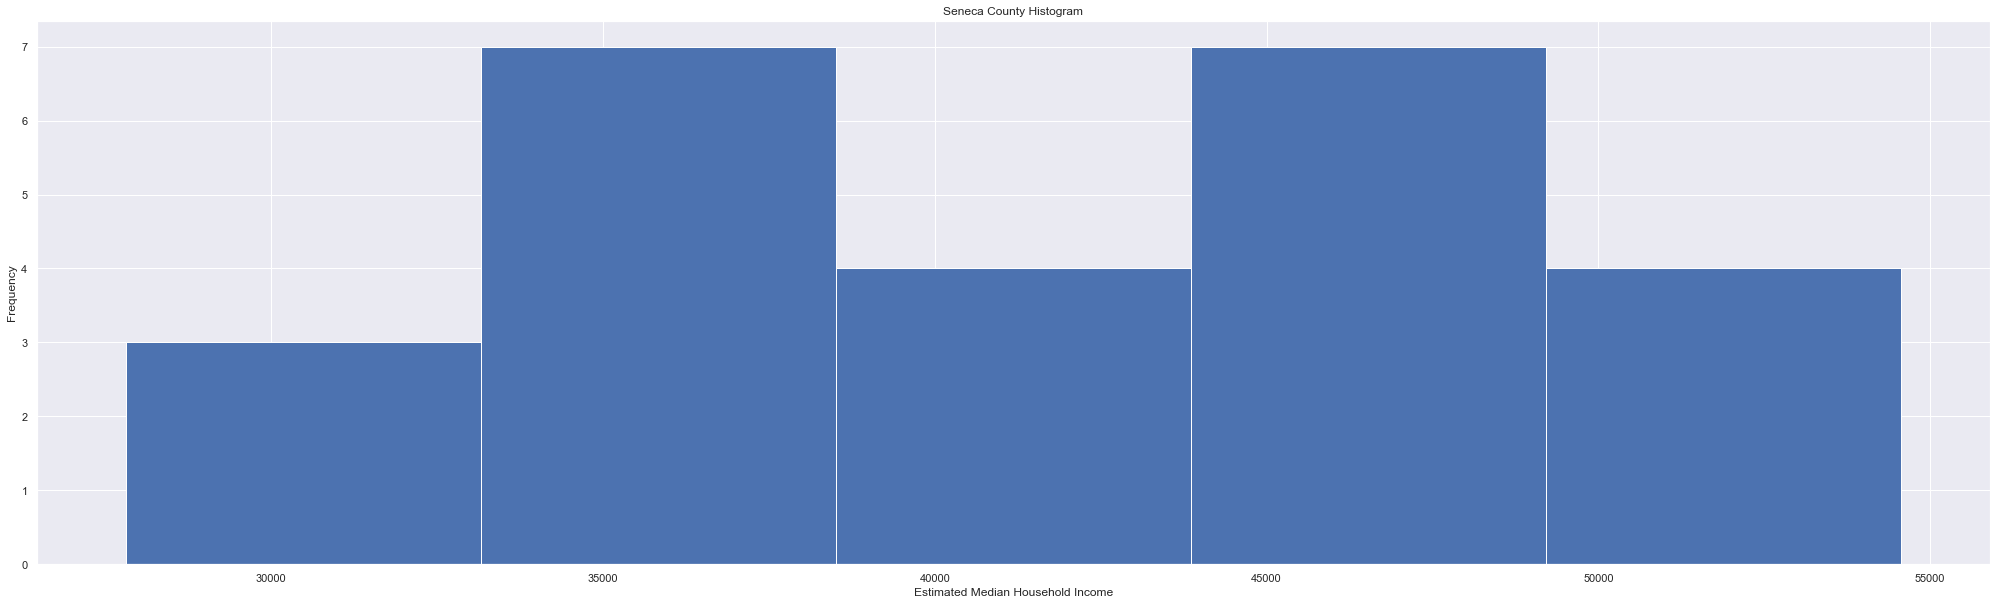

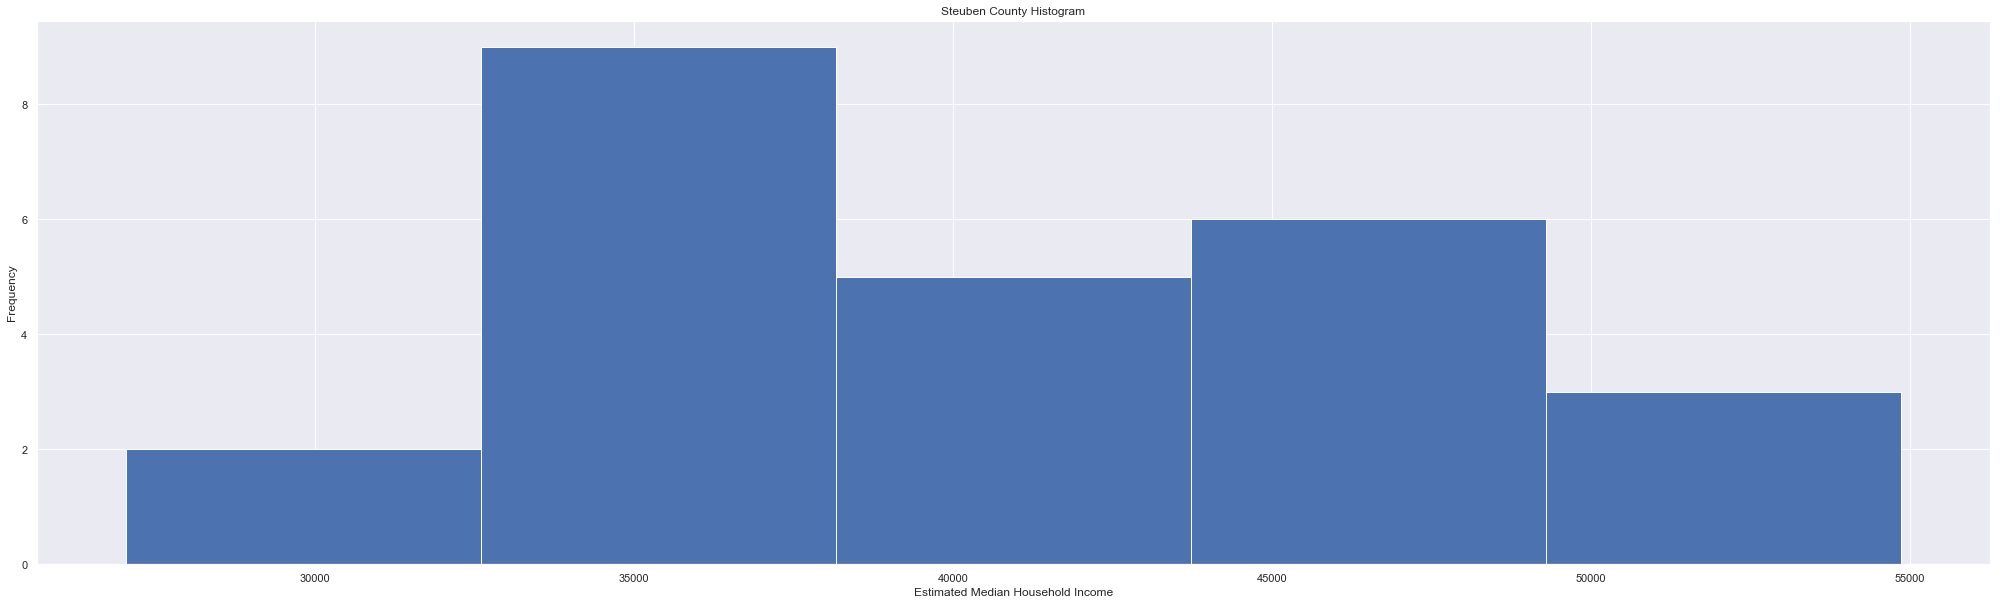

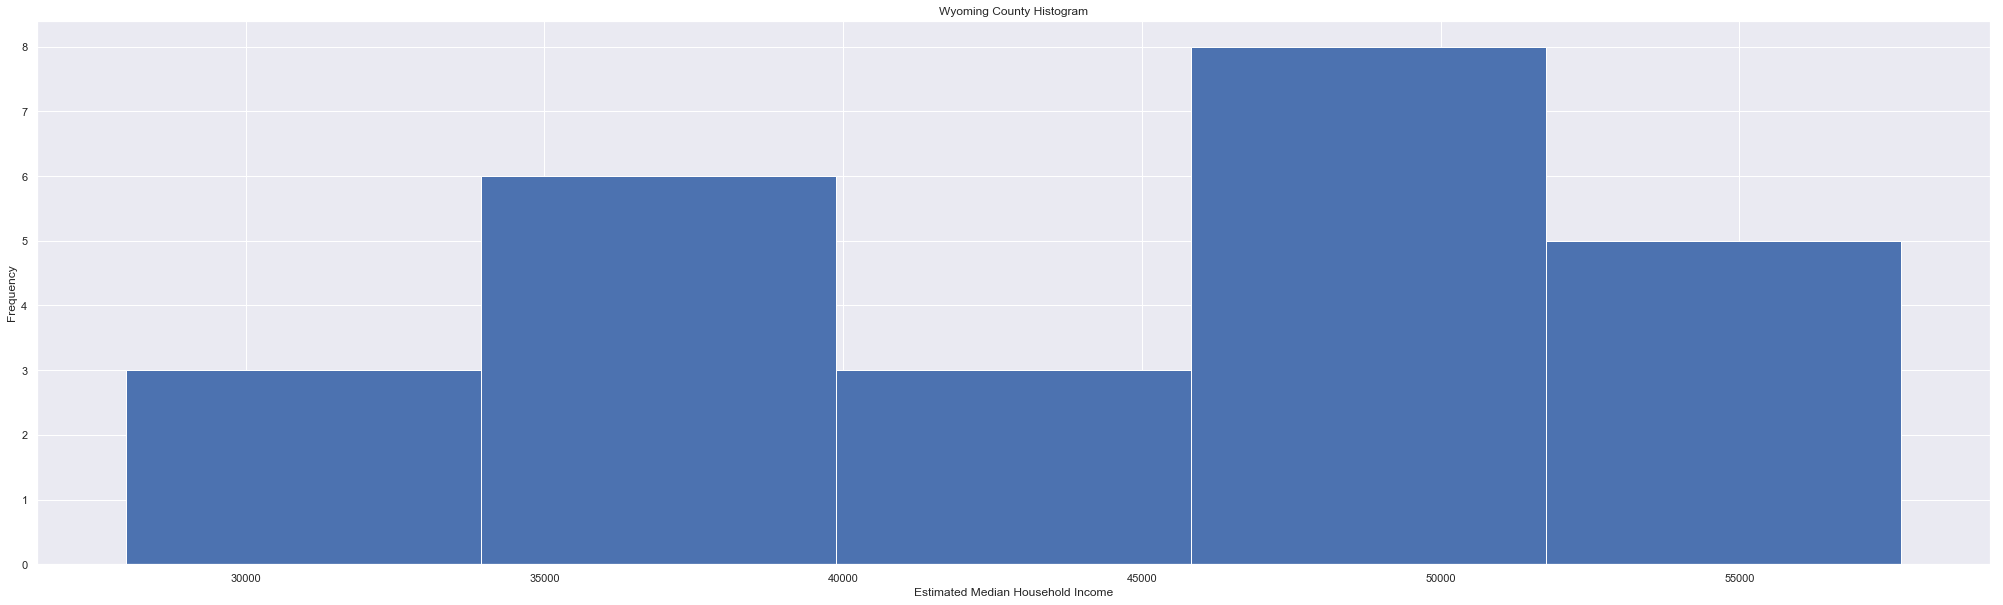

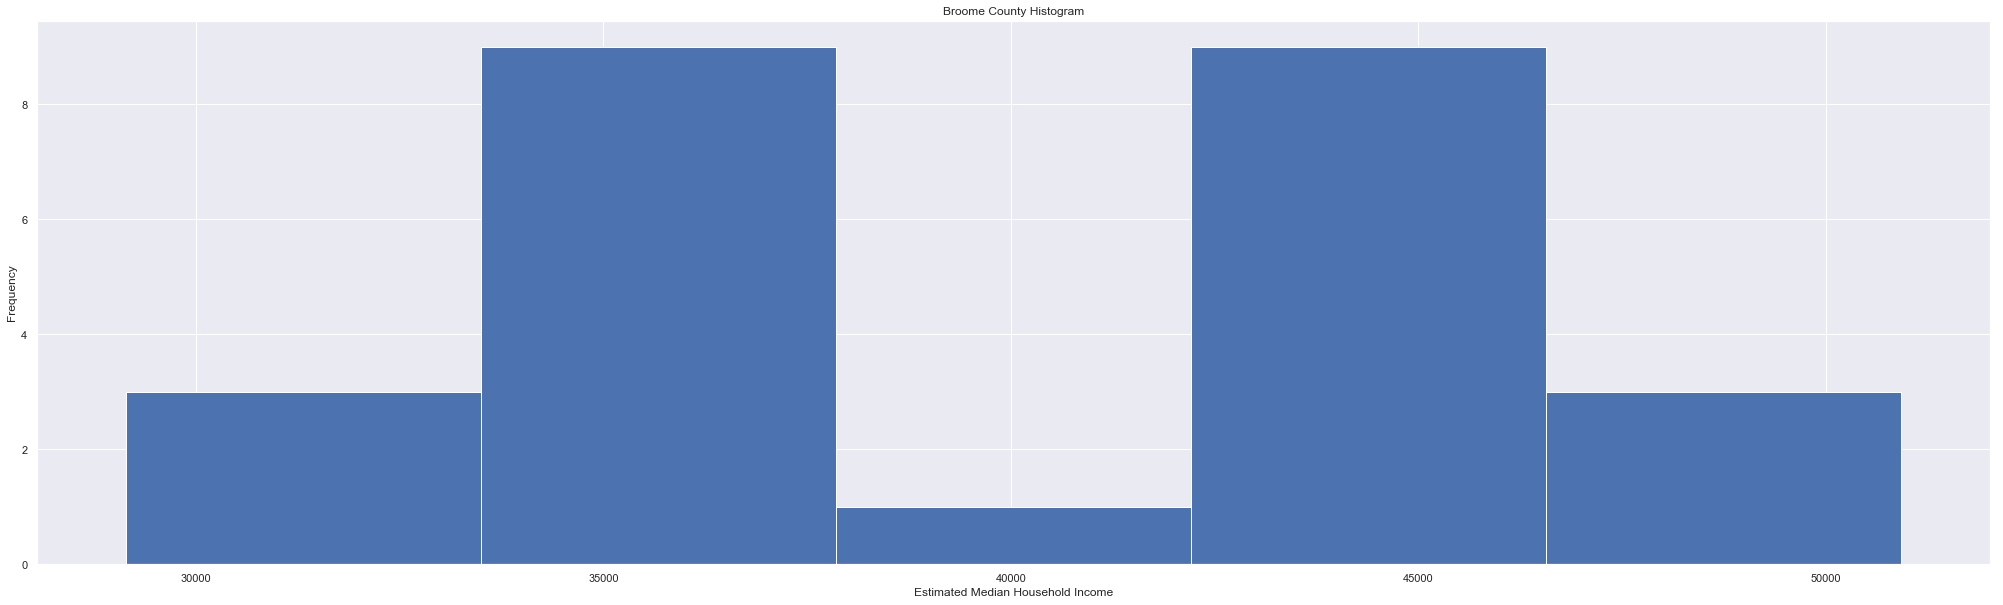

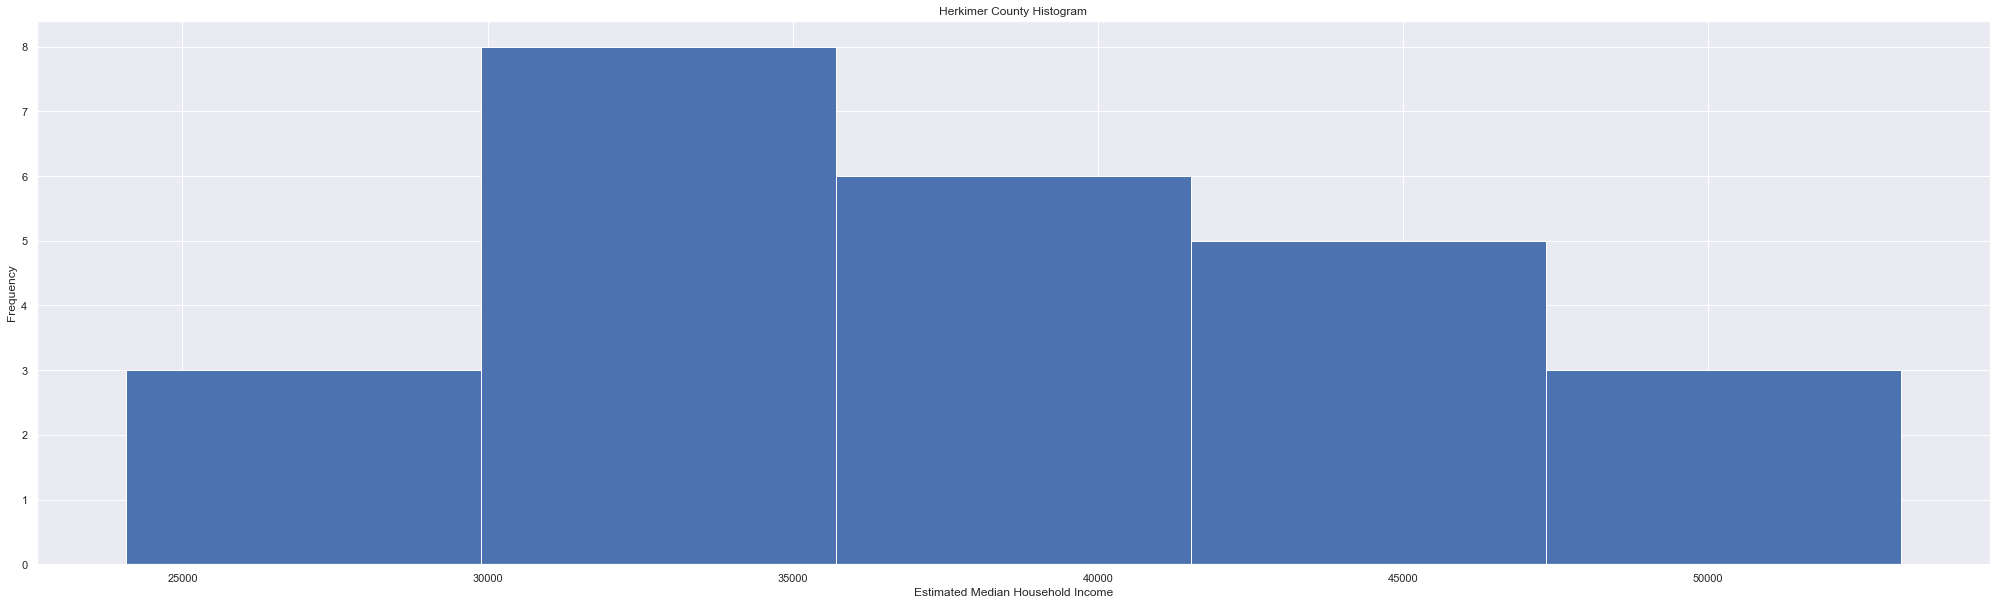

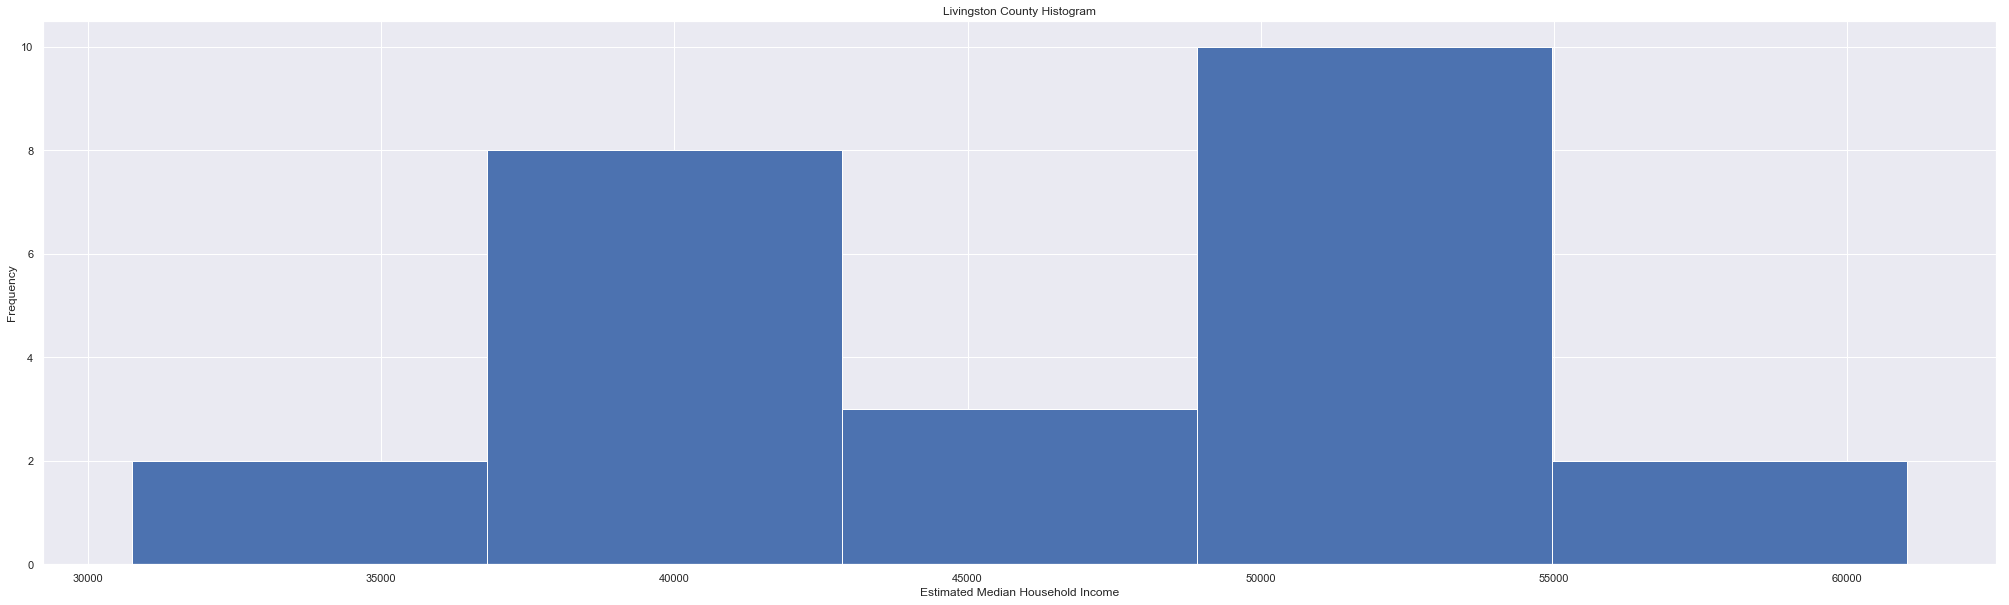

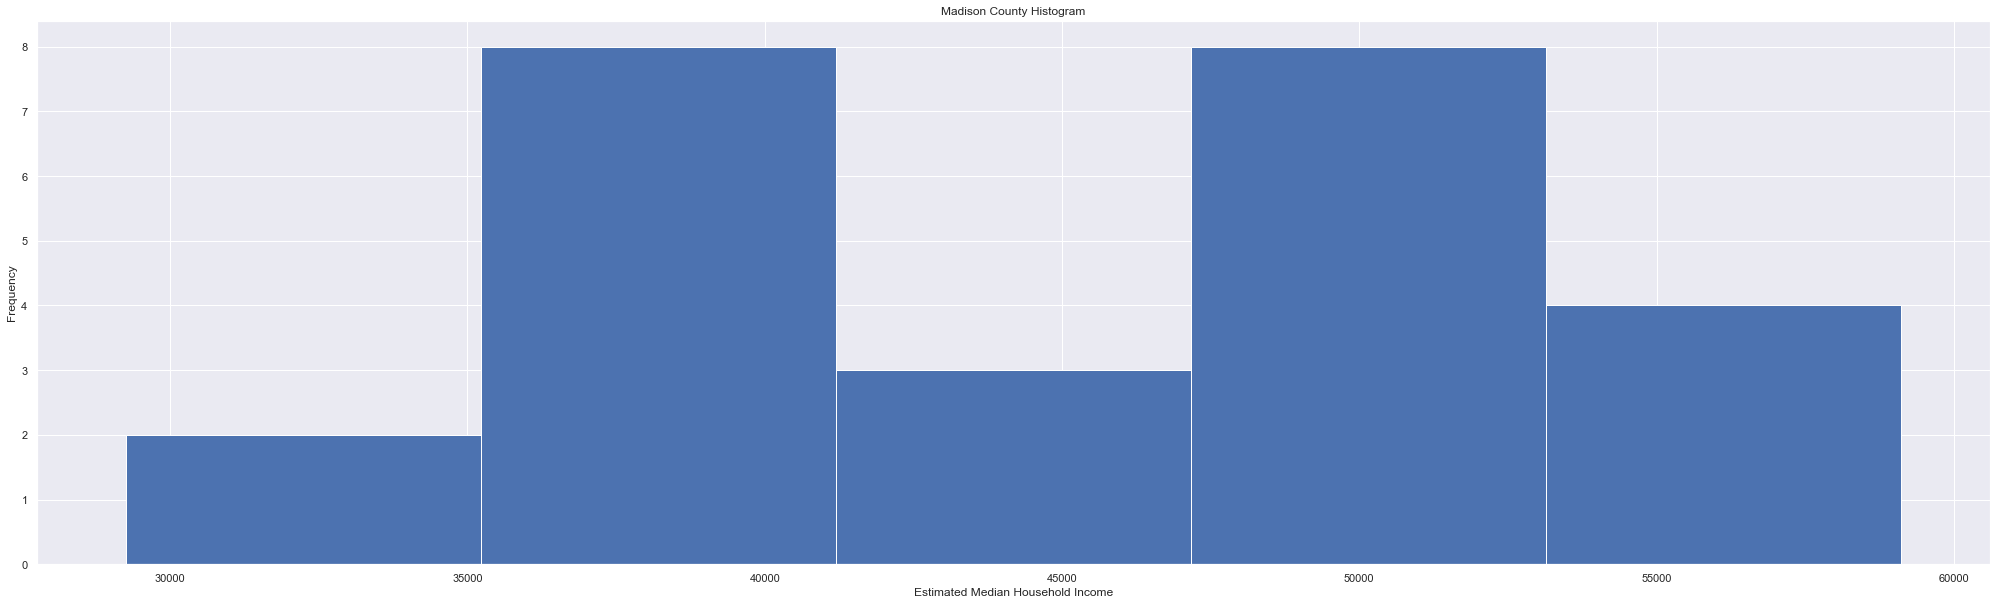

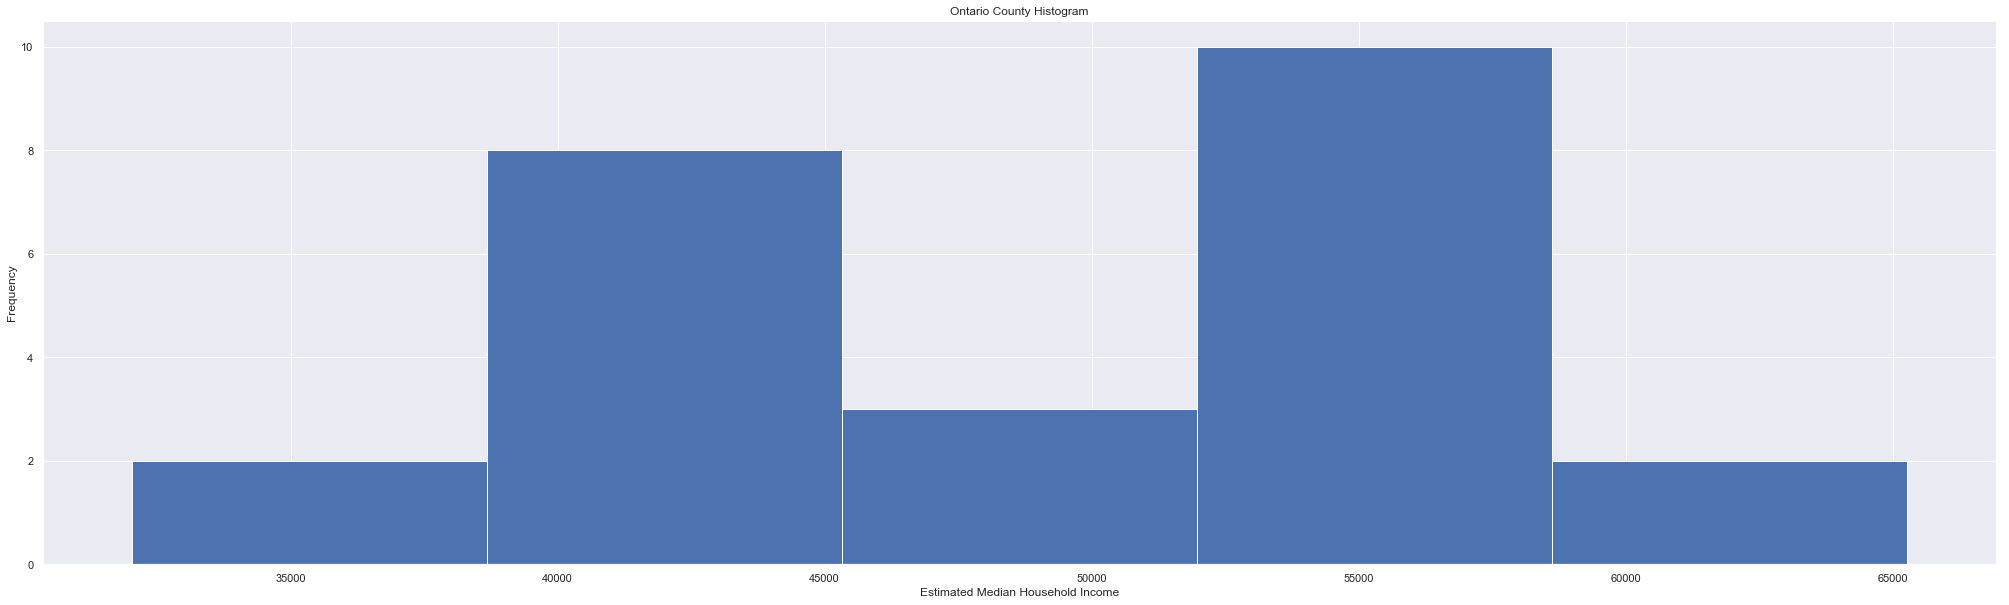

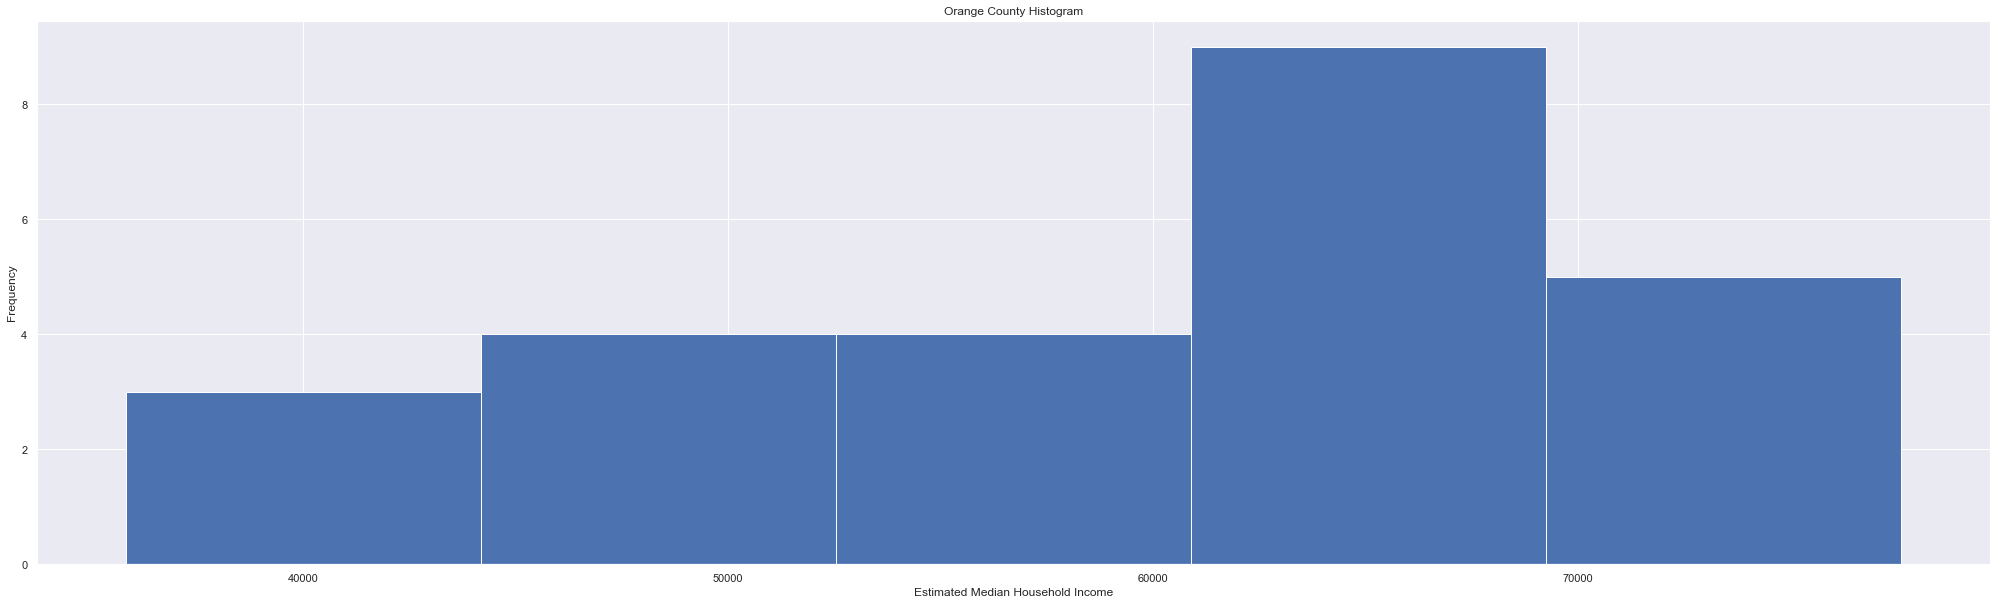

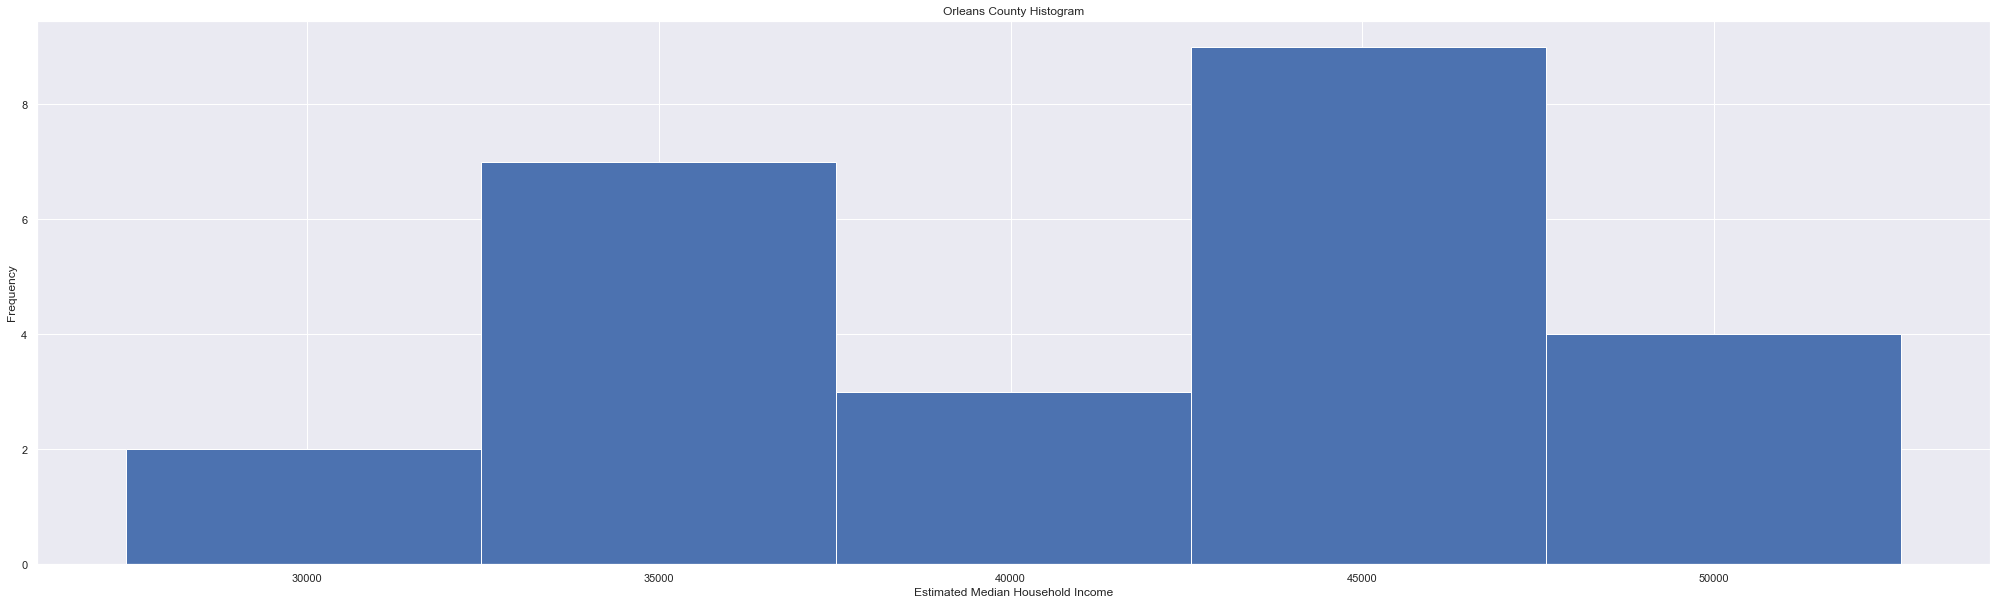

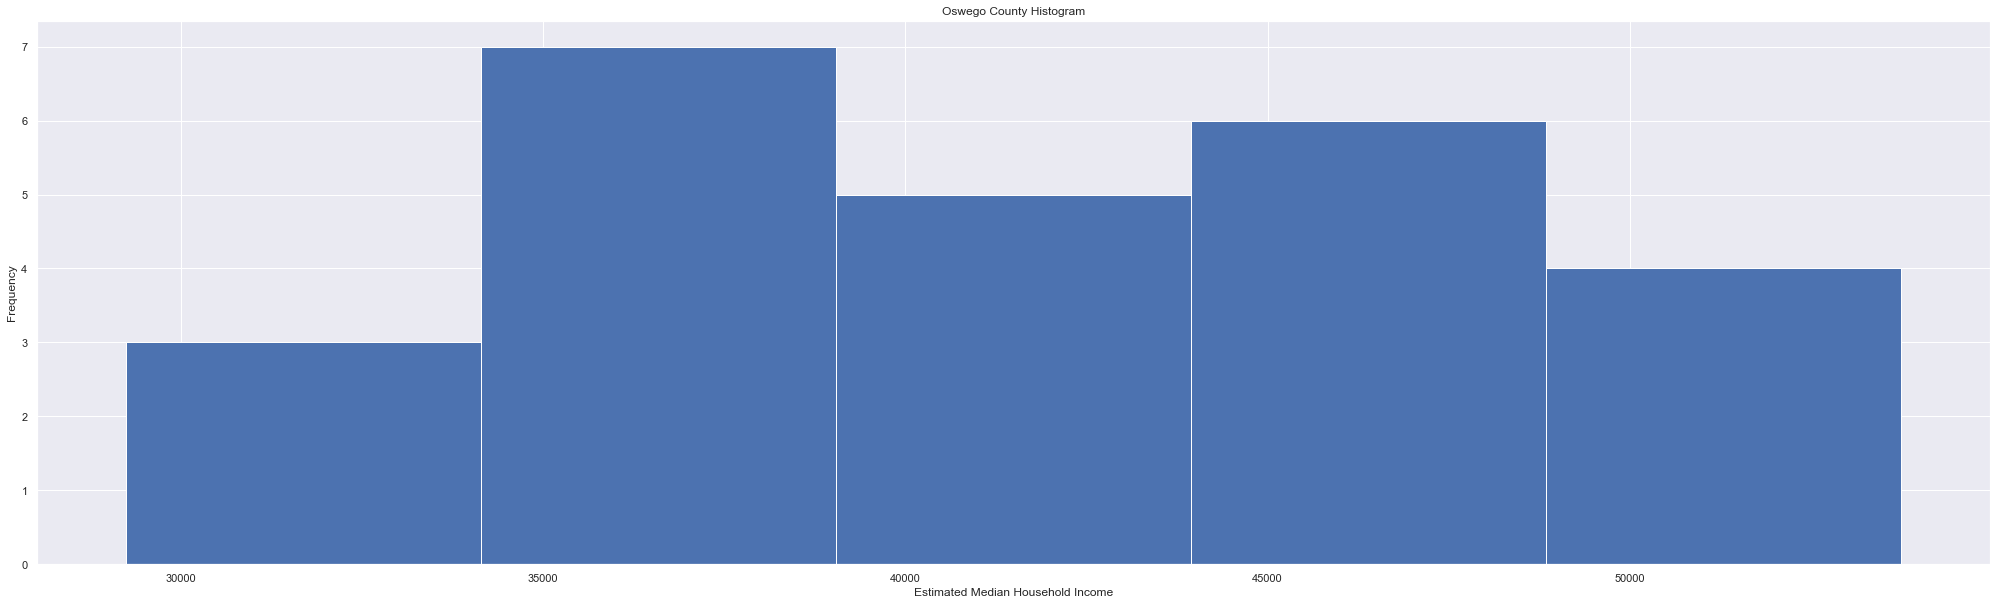

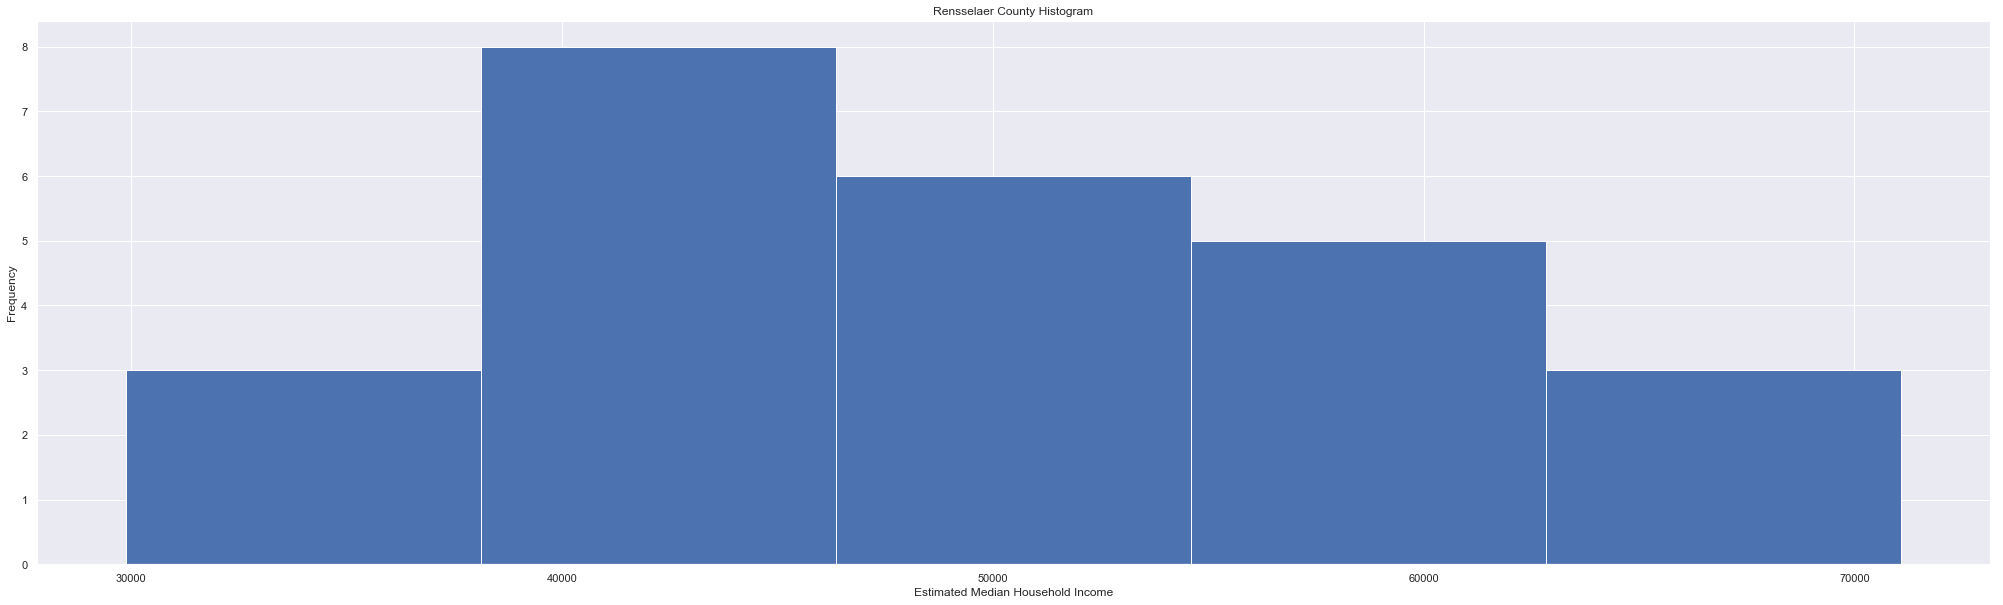

ValueError: Format ' lawrence county histogram' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

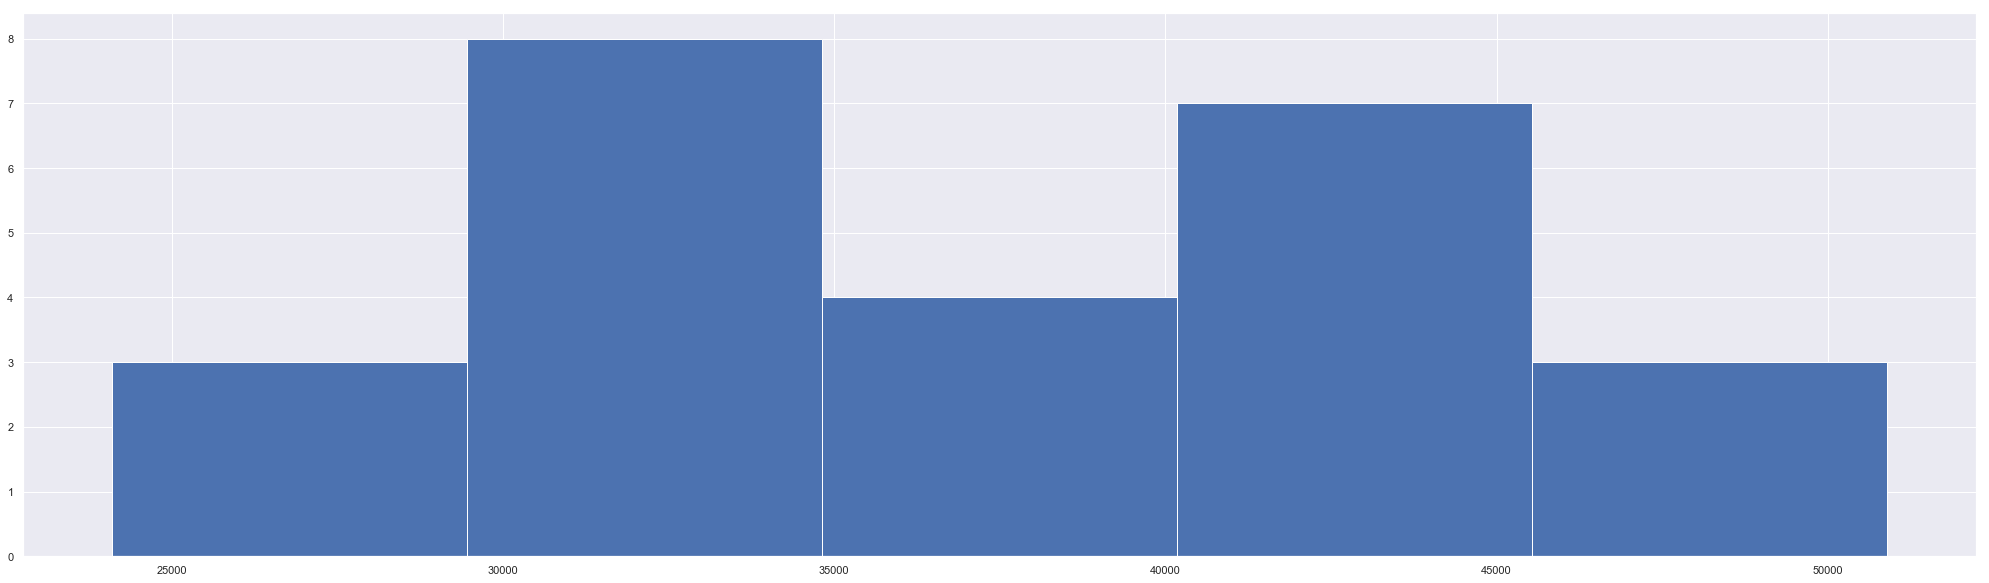

In [442]:
median_counties = median_data.columns
for counties in median_counties:
    median_histogram(counties)

In [443]:
#A histogram tells you how often each different value in a set occur.
#These are nice, but we need more.

In [444]:
median_data_intermediate = median_data[['Westchester County', 'Queens County', 'Rockland County', 'New York County', 'Dutchess County', 'Bronx County','Kings County', 'Putnam County', 'Richmond County', 'Suffolk County', 'Franklin County', 'Greene County', 'Jefferson County','Sullivan County', 'Yates County',
                                       'Ontario County', 'Orange County', 'Tompkins County', 'Saratoga County', 'Ulster County', 'Warren County', 'Washington County']]
median_data_transposed = median_data_intermediate.T
median_data_transposed.head()
#check shape for 22 counties
median_data_transposed.shape
#good

(22, 25)

In [445]:
median_counties = []
def median_data_for_each_county(str):
    a = median_data[str].mean()
    print(a)
    median_counties.append(a)
for counties in median_data_intermediate.columns:
    median_data_for_each_county(counties)
median_counties

70714.08
47566.96
72377.96
56592.76
60923.24
30063.92
38294.32
79117.44
61771.48
72817.68
37090.64
41912.48
39394.92
41219.04
39409.68
49645.6
59643.52
43943.2
59664.52
48766.32
45416.92
42223.36


[70714.08,
 47566.96,
 72377.96,
 56592.76,
 60923.24,
 30063.92,
 38294.32,
 79117.44,
 61771.48,
 72817.68,
 37090.64,
 41912.48,
 39394.92,
 41219.04,
 39409.68,
 49645.6,
 59643.52,
 43943.2,
 59664.52,
 48766.32,
 45416.92,
 42223.36]

In [446]:
df_median_columns = pd.DataFrame(median_data_intermediate).columns
df_median_counties = pd.DataFrame(median_counties)
df_median_counties.columns = ['Average of Median Household Income for each County']
df_median_counties_with_indexes=df_median_counties.set_index(df_median_columns)
second_step = df_median_counties_with_indexes
second_step.head()

Average of Median Household Income for each County
Westchester County                                           70714.08 
Queens County                                                47566.96 
Rockland County                                              72377.96 
New York County                                              56592.76 
Dutchess County                                              60923.24

In [447]:
medNYS = medNYS.set_index('observation_date').rename({'observation_date':'Observation Date','1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
medNYS = medNYS.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
medNYS = medNYS.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
medNYS

New York State
observation_date                
1984                       22027
1985                       23639
1986                       25025
1987                       26384
1988                       28915
1989                       31496
1990                       31591
1991                       31794
1992                       31051
1993                       31697
1994                       31899
1995                       33028
1996                       35410
1997                       35798
1998                       37394
1999                       39989
2000                       40744
2001                       42114
2002                       41966
2003                       42788
2004                       44649
2005                       47176
2006                       48222
2007                       48944
2008                       50461
2009                       50216
2010                       49781
2011                       50636
2012                       47680
2013                       49966
2014                       54310
2015                       58005
2016                       61437
2017                       61543
2018                       67274
2019                       71855

In [448]:
medNYS_mean = medNYS['New York State'].mean()
medNYS_mean

42414.0

In [449]:
second_step['Average of Median Household Income for each County'].mean()

51753.18363636364

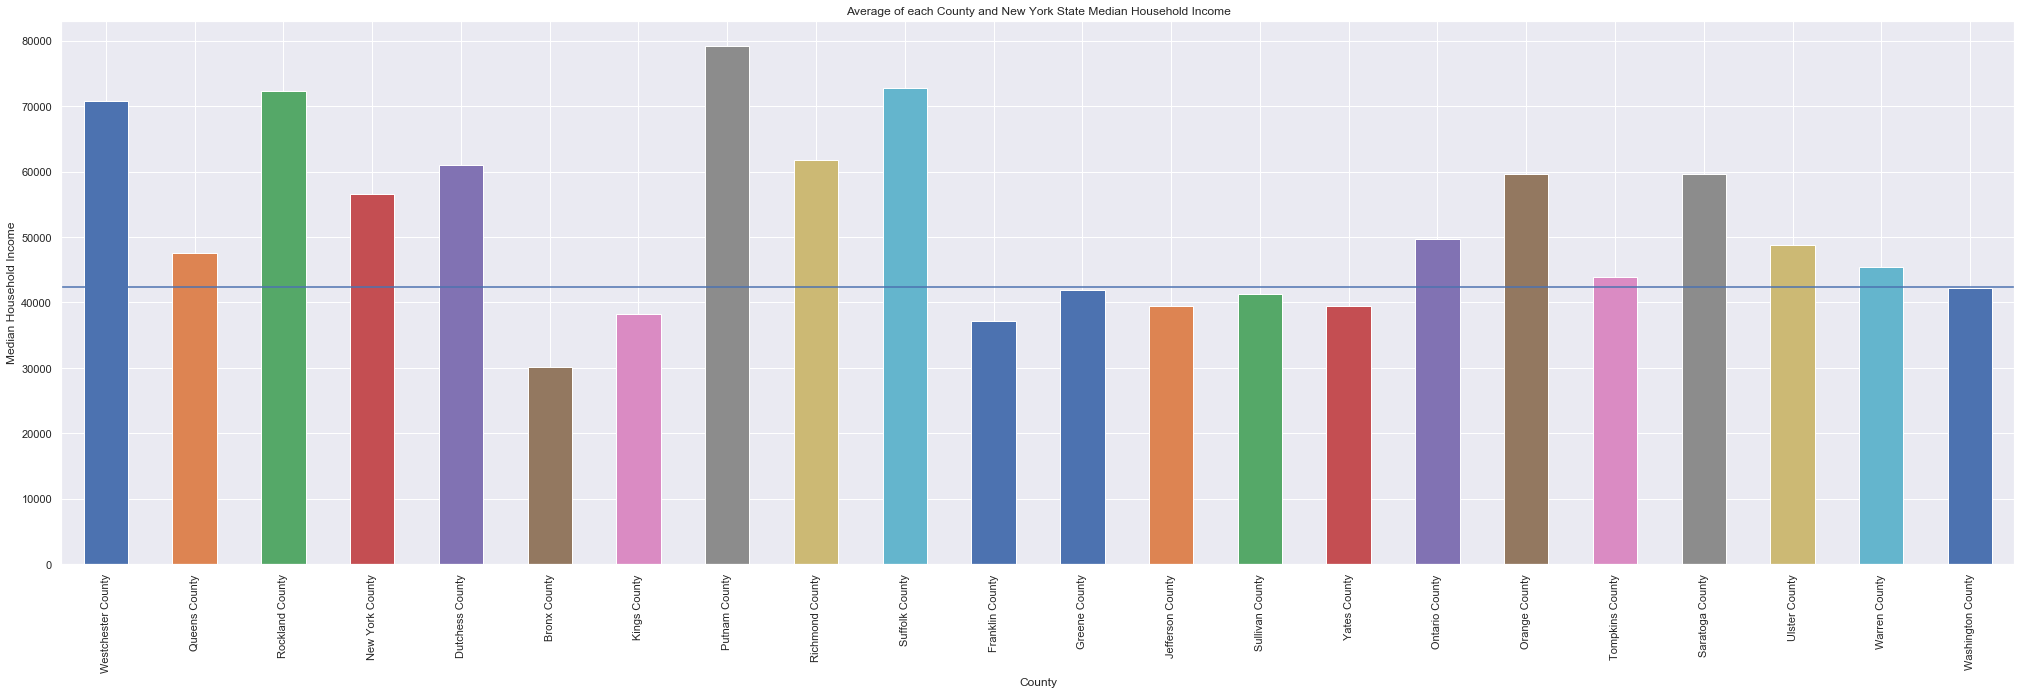

In [450]:
second = second_step['Average of Median Household Income for each County'].plot.bar()
plt.title('Average of each County and New York State Median Household Income')
plt.ylabel('Median Household Income')
plt.xlabel('County')
plt.savefig('Average of each County and New York State Median Household Income')
second.axhline(medNYS_mean) #using the state average
plt.show()


Given this hypothetical scenario, I would typically live in a county with higher wages, thus, a higher median household income since my wage is above average. Thus, I eliminated counties based off of the average median HI of NYS.

In [451]:
#Too close to call
median_data['Greene County'].mean() #Not Included


41912.48

In [452]:
median_data['Washington County'].mean() #Not Included

42223.36

In [453]:
#And then there were 14 (In no order other than reading from the graph):
#1. Westchester
#2. Queens
#3. Rockland
#4. New York
#5. Dutchess
#6. Putnam
#7. Richmond
#8. Suffolk
#9. Ontario
#10. Orange
#11. Tompkins
#12. Saratoga
#13. Ulster
#14. Warren

# Step 2c: Per Capita Data..And then there were 14.

In [454]:
#PER CAPITA DATA NEXT
per_capita_data.dropna()
per_capita_data.head()
per_capita_data = per_capita_data.rename({'observation_date':'Observation Date','1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
per_capita_data = per_capita_data.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
per_capita_data = per_capita_data.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
per_capita_data.head()
per_capita_data.shape
#63 columns because of New York State

(39, 64)

In [455]:
#Let's take the counties that have advanced to the next round:
per_capita_data = per_capita_data[['Westchester County', 'Queens County','Rockland County', 'New York County', 'Dutchess County', 'Putnam County', 'Richmond County', 'Suffolk County', 'Ontario County', 'Orange County', 'Tompkins County','Saratoga County', 'Ulster County', 'Warren County']]

In [456]:
transposed_per_capita_data = per_capita_data.T
transposed_per_capita_data.head()

observation_date     1980   1981   1982   1983   1984   1985   1986   1987  \
Westchester County  15547  17644  19214  20449  22767  24408  26110  27560   
Queens County       10750  12053  13150  14033  15415  16302  17296  18163   
Rockland County     12701  14233  15383  16429  18207  19367  20469  21914   
New York County     18174  20152  21747  23983  25687  28259  30685  34745   
Dutchess County     10529  11917  13350  14361  16055  17247  18359  19034   

observation_date     1988   1989   ...      2009    2010    2011    2012  \
Westchester County  30351  32369   ...     75153   76048   79996   87589   
Queens County       19515  21336   ...     36237   37202   38468   39469   
Rockland County     24294  25871   ...     48122   48572   50425   52326   
New York County     41126  44237   ...    114109  120443  131246  138865   
Dutchess County     20092  21884   ...     41342   42081   43763   45808   

observation_date      2013    2014    2015    2016    2017    2018  
Westchester County   86434   90407   93666   96308  103169  108976  
Queens County        39967   41351   43768   44781   47956   49777  
Rockland County      51694   53434   55314   55703   57966   60464  
New York County     142930  151128  154784  165216  182821  193940  
Dutchess County      46092   47572   49885   51499   53918   56365  

[5 rows x 39 columns]

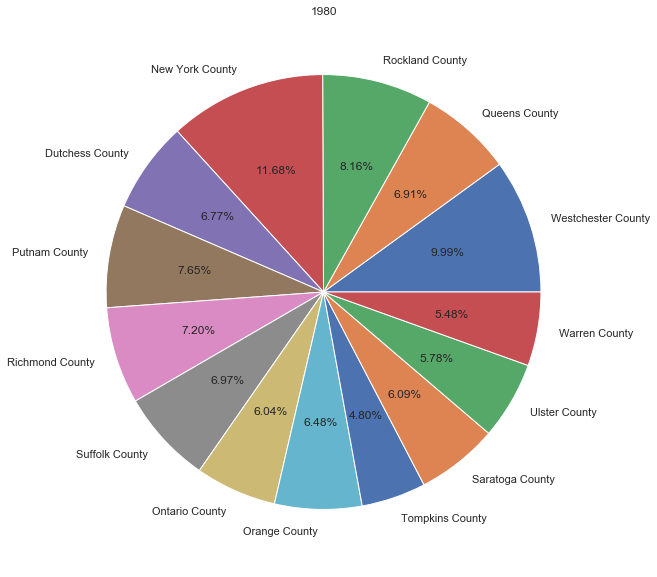

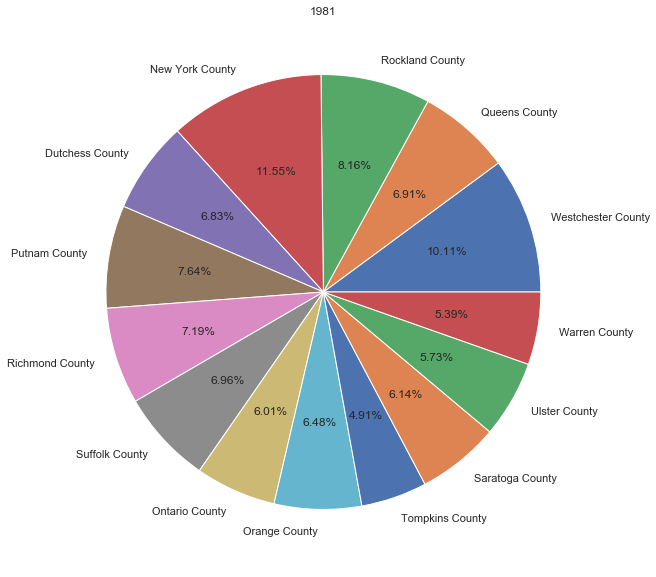

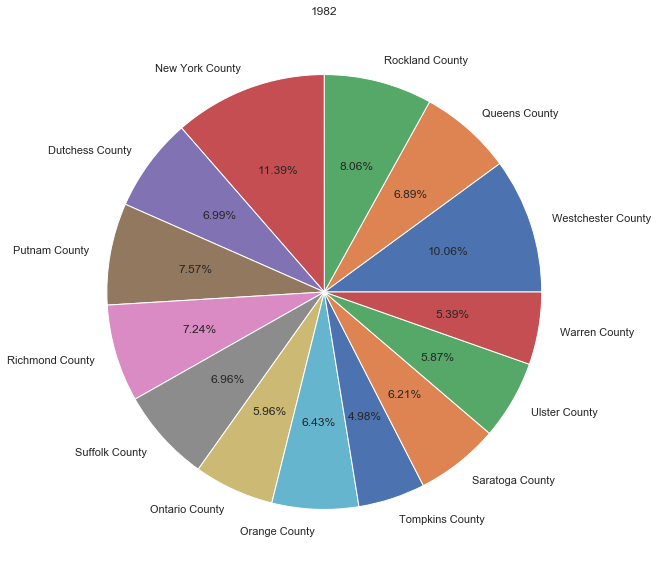

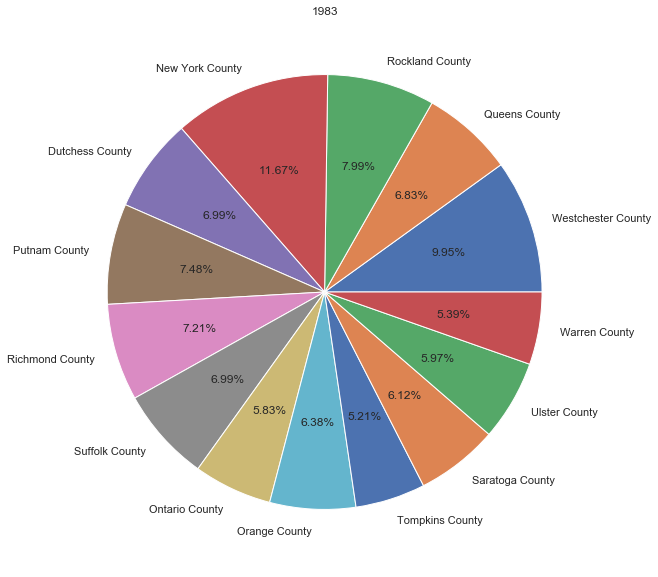

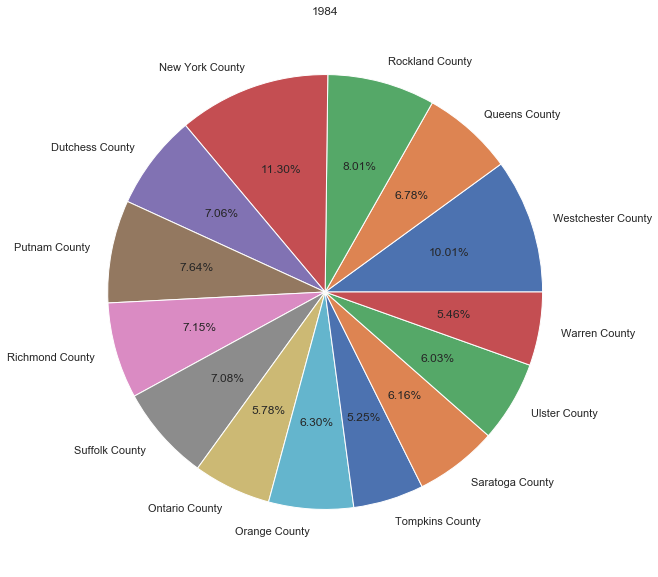

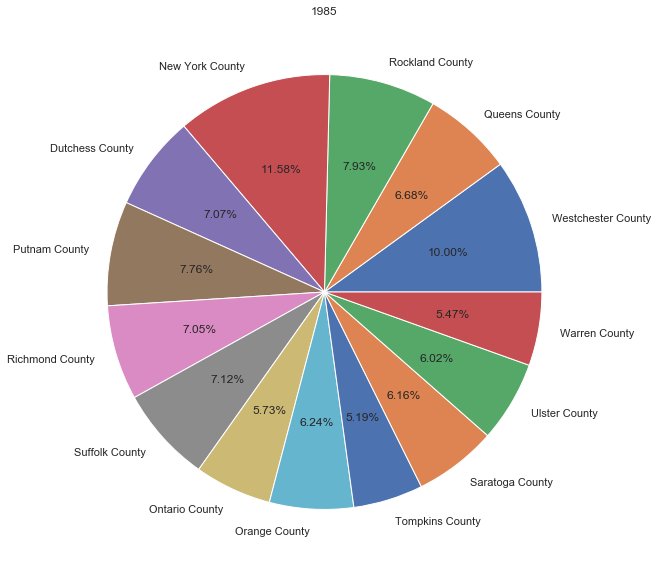

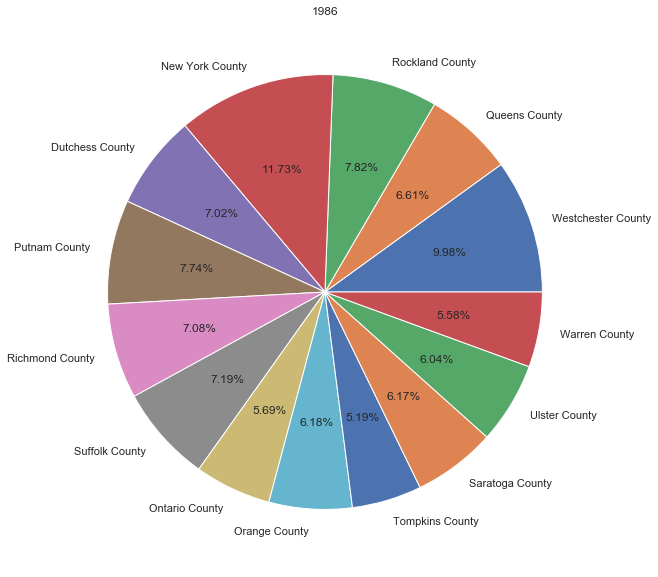

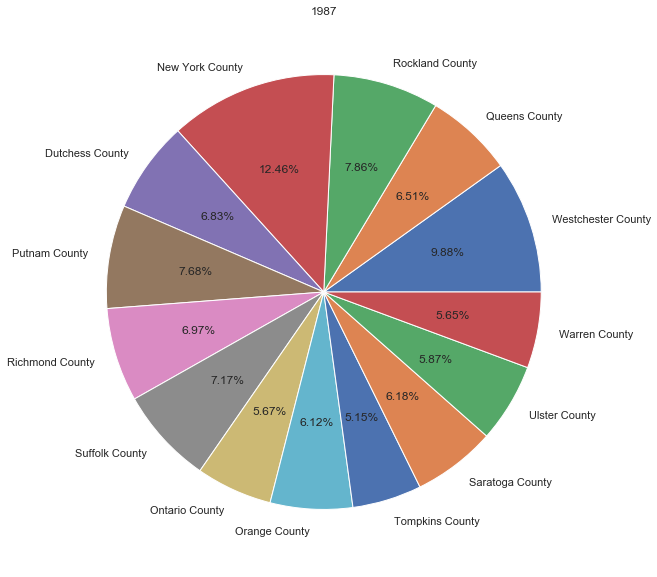

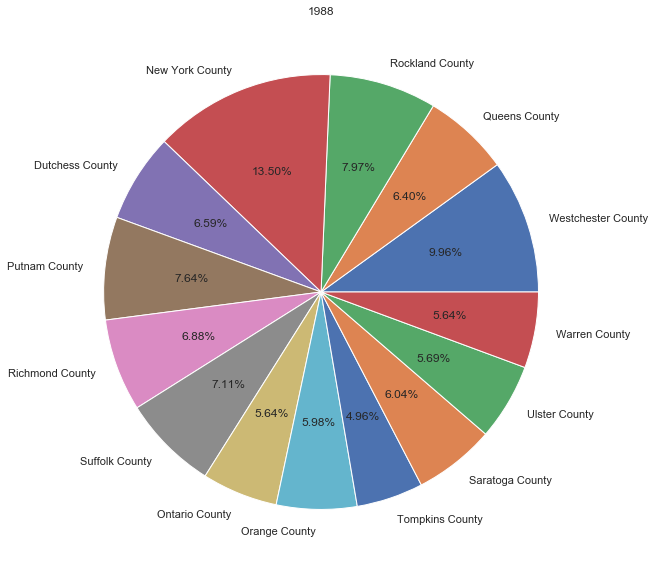

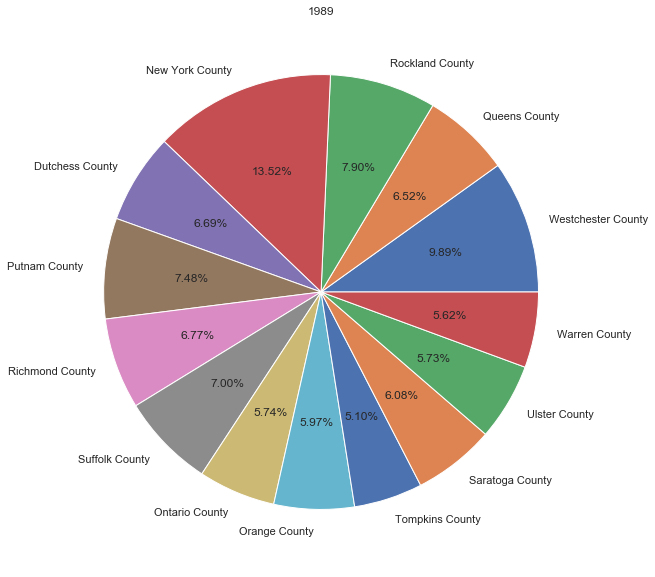

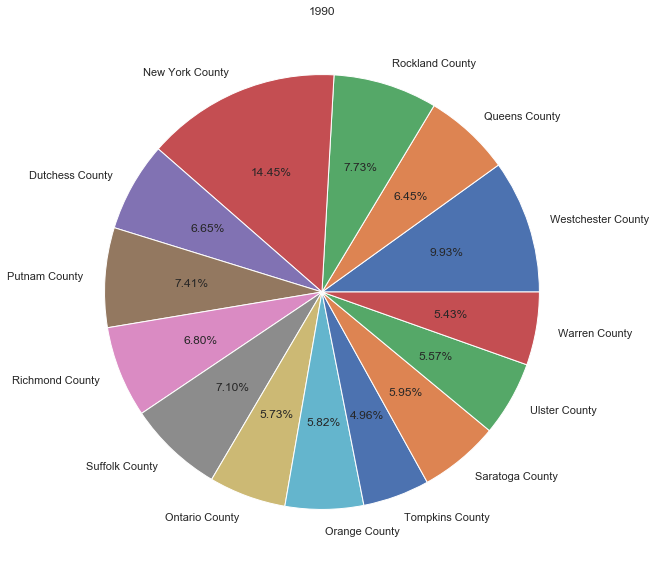

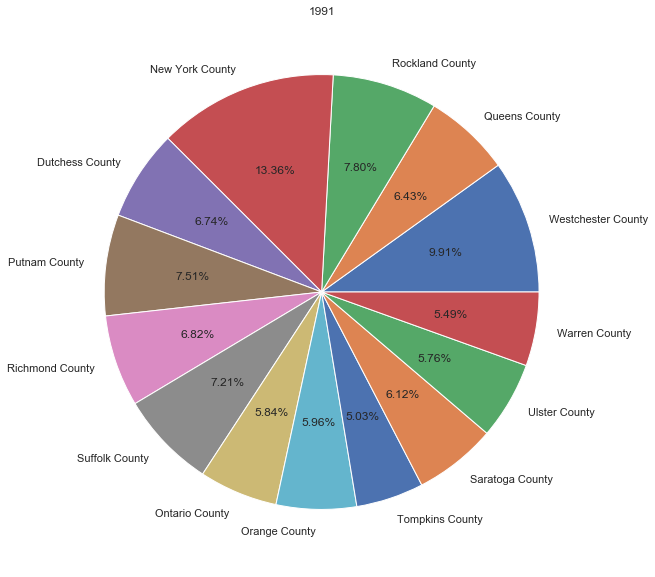

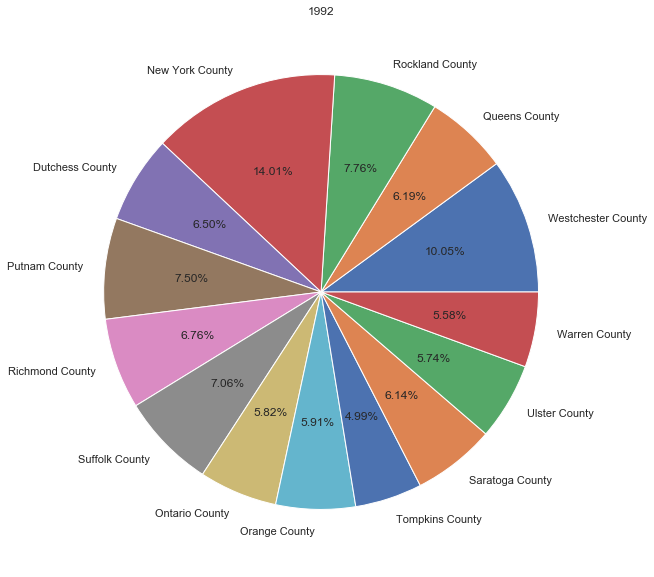

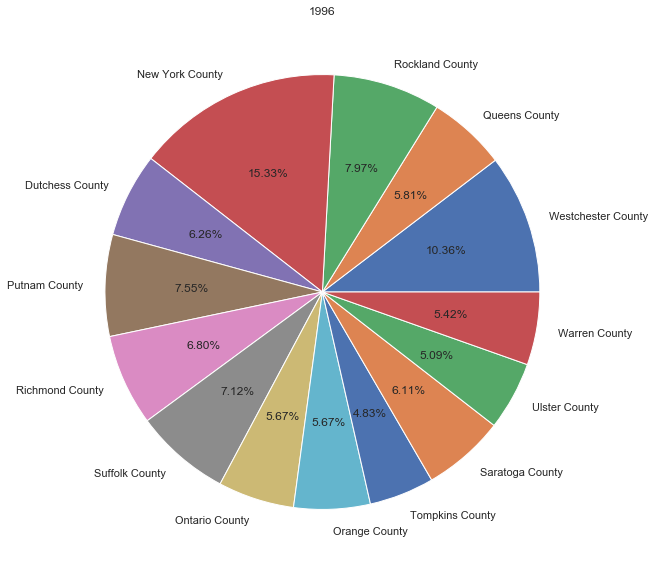

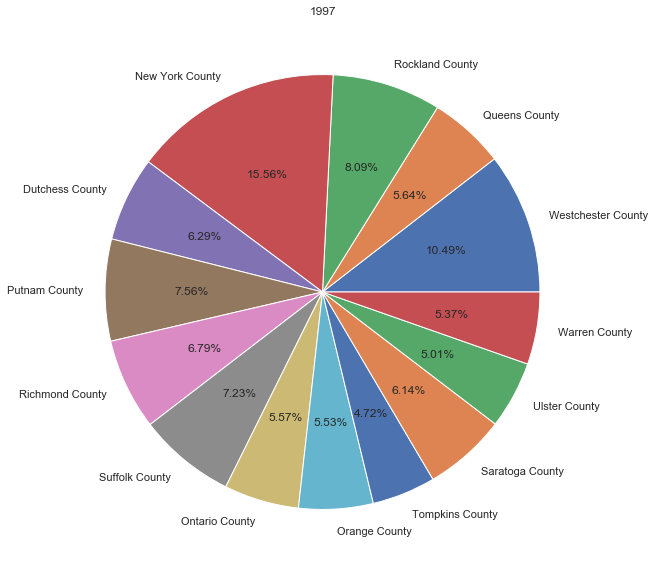

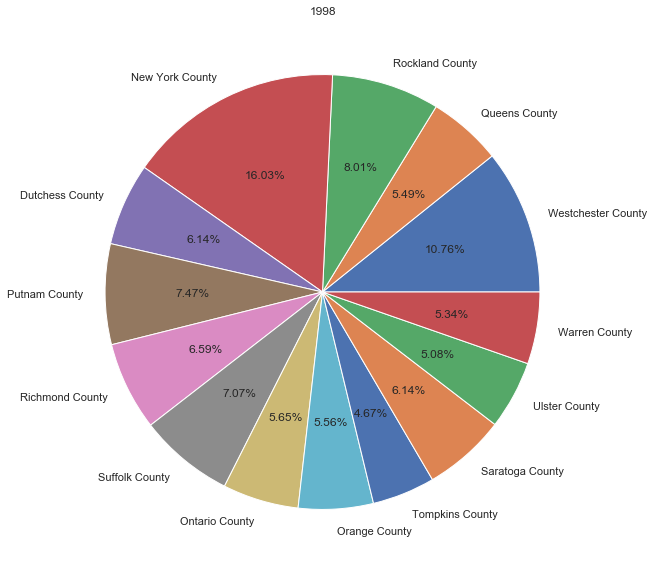

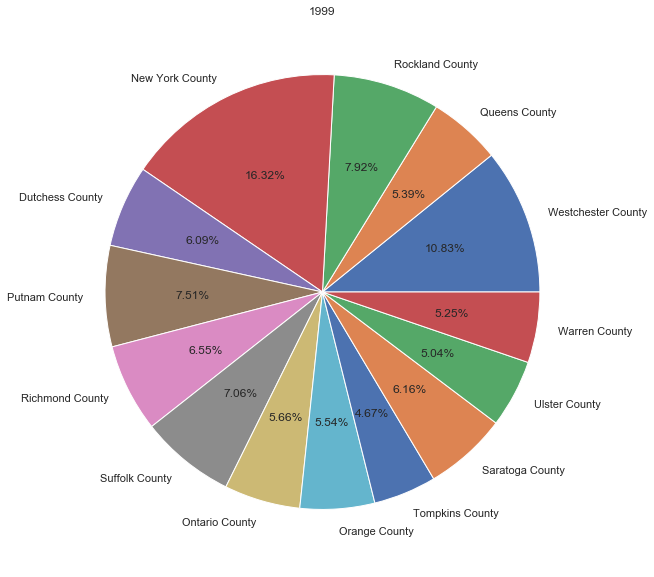

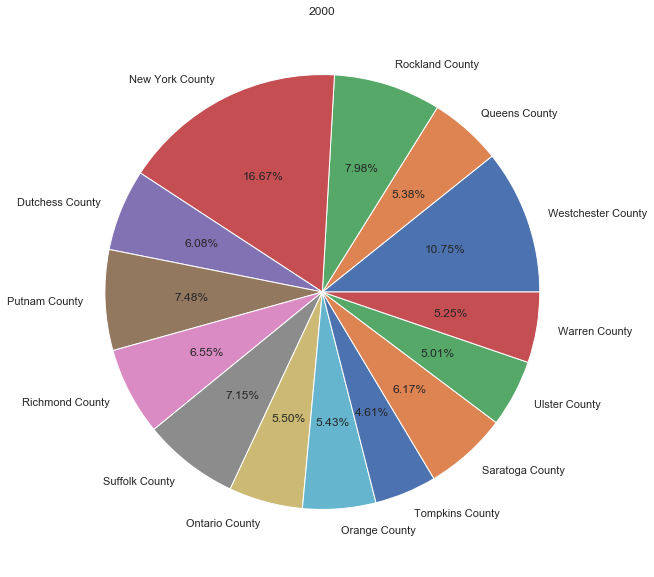

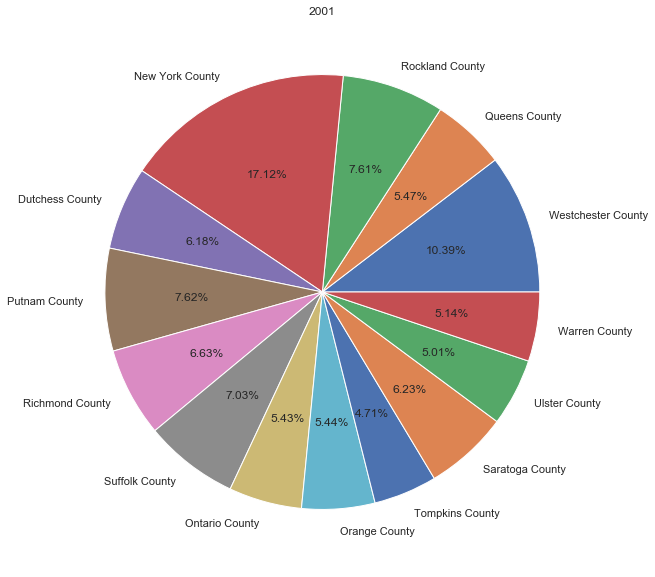

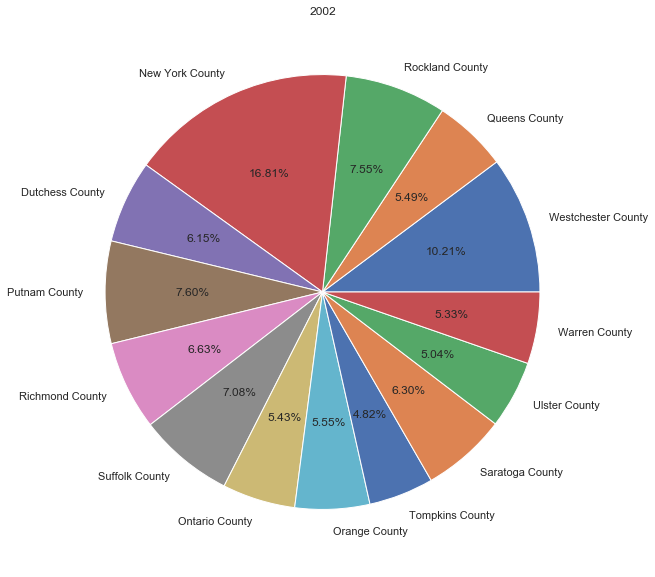

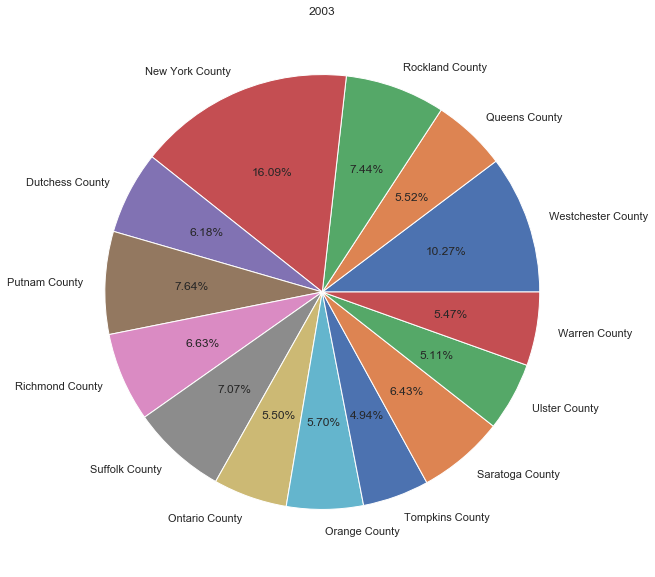

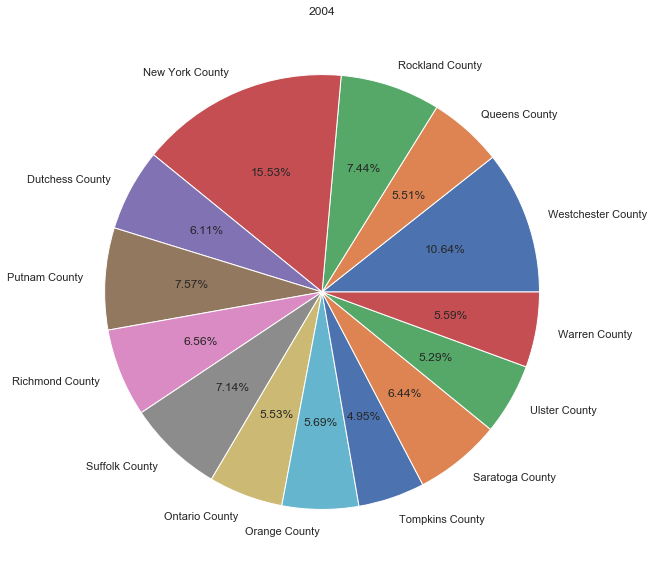

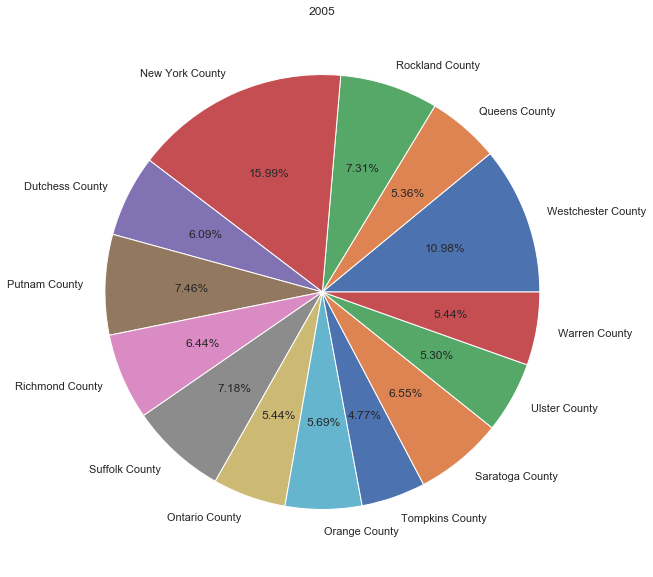

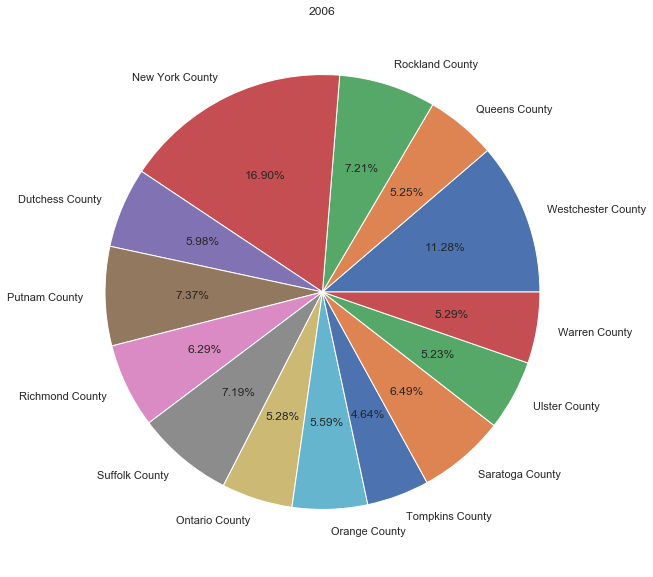

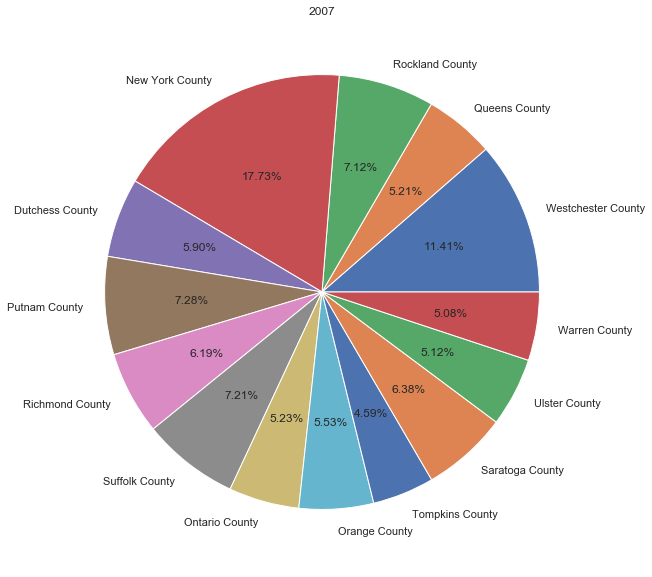

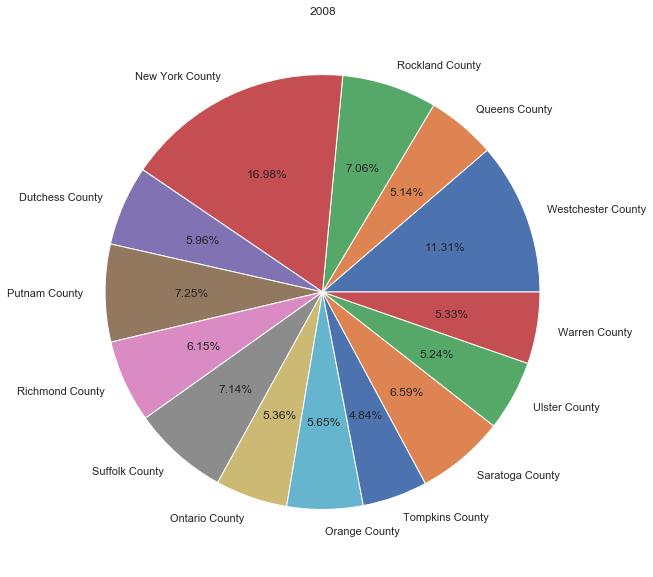

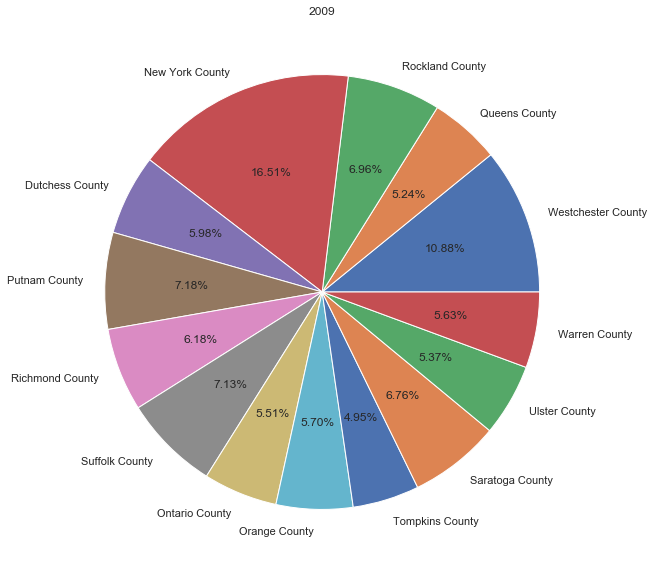

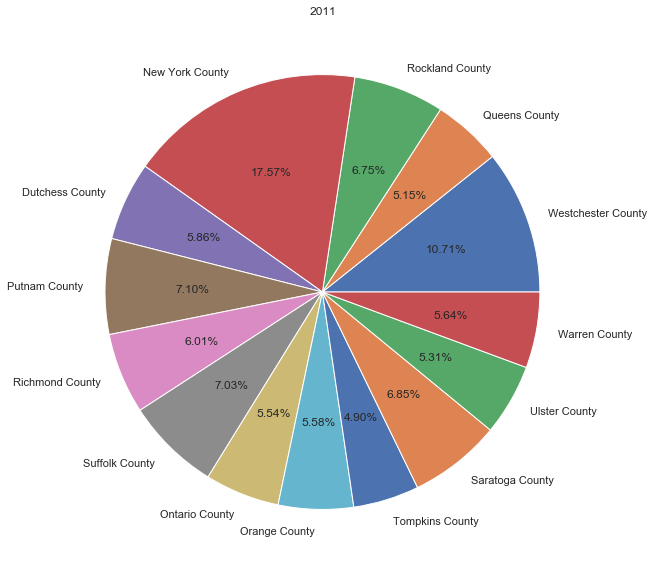

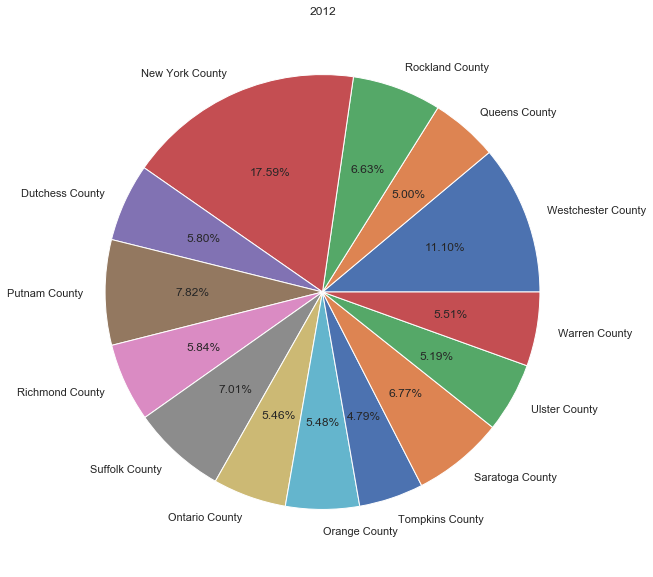

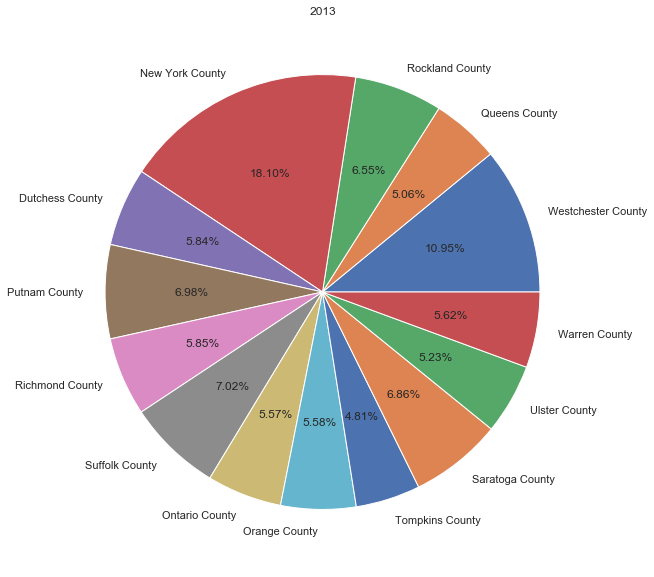

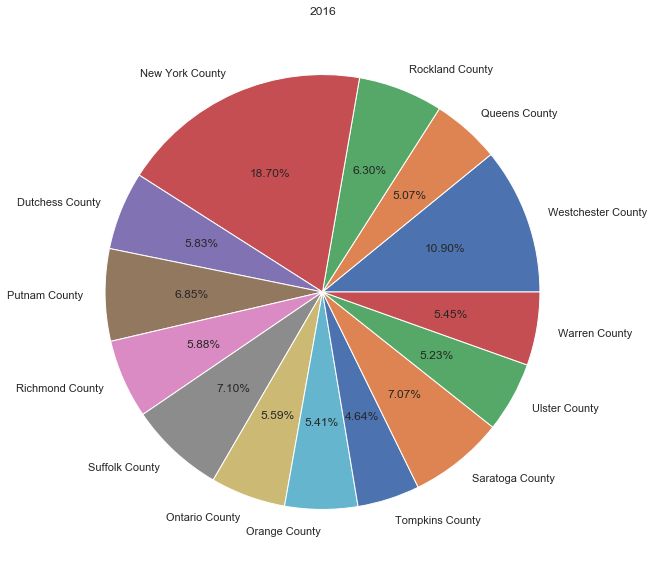

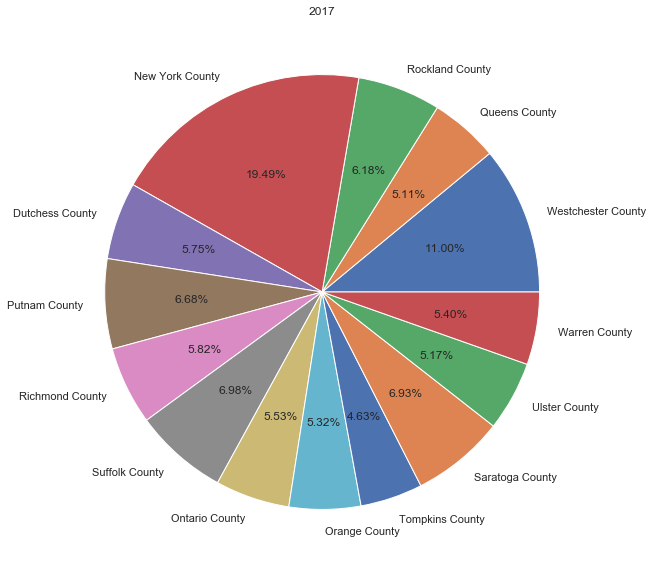

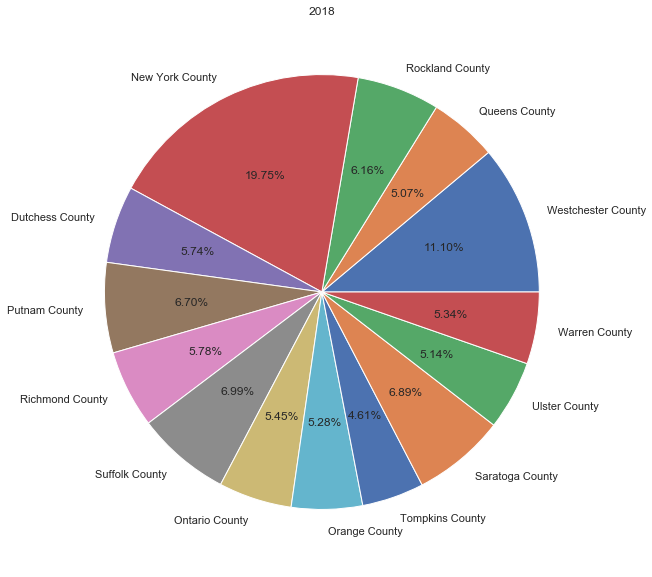

In [457]:
pie_columns = transposed_per_capita_data.columns
def per_capita_pie(str):
    plt.pie(labels = transposed_per_capita_data.index, x = transposed_per_capita_data[str], autopct='%1.2f%%')
    plt.title(pie)
    plt.savefig('Pie Plot Per Capita Data for' + " " + str)
    plt.show()
for pie in pie_columns:
    per_capita_pie(pie)

From the above graphs, the following may be concluded:

        From 1980 to 1984, the top five counties on teh basis of per_capita, in order, were:
                (In Order)
                1. New York
                2. Westchester
                3. Rockland
                4. Putnam
               5.  Richmond
                
        #From 1985 to 2009, the top five counties switched:
                # (In Order)
                1. New York
                2. Westchester
                3. Rockland
                4. Putnam
                5. **Suffolk**
                
        #From 2010 to 2012, the top five counties switched:
                (In Order)
                1. New York
                2. Westchester
                3. **Putnam**
                4. Suffolk
                5. **Saratoga**
                
        #From 2013 to 2014, the top five counties switched:
                (In Order)
                1. New York
                2. Westchester
                3. **Suffolk**
                4. Putnam
                5. Saratoga
            
        #From 2015 to 2018, the top five counties switched:
                (In Order)
                1. New York
                2. Westchester
                3. Suffolk
                4. **Saratoga**
                5. Putnam
        
New York and Westchester counties retained their first and second ranking each year, respecitvely.

 For purposes of this hypothetical scenario, I will pick the top 5(6) counties since my hypothetical salary is above average for NYS.

**We will continue on with all counties in the above rankings, that is,
New York, Westchester, Putnam, Suffolk, Rockland, Saratoga**

# The last two are only measurements - We want to trim down to 1

# Step 2d: Unemployment Data - With the 6 remaining

In [458]:
unemp_data = unemp_data.dropna()
unemp_data = unemp_data.rename({'observation_date':'Observation Date','1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
unemp_data = unemp_data.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
unemp_data = unemp_data.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
unemp_data.head()

Westchester County  New York County  Queens County  \
observation_date                                                       
1990                             3.5              6.0            6.0   
1991                             5.4              7.7            8.0   
1992                             6.2              9.4           10.6   
1993                             5.5              9.0            9.7   
1994                             4.9              7.6            8.3   

                  Rockland County  Cattaraugus County  Dutchess County  \
observation_date                                                         
1990                          3.3                 6.4              3.0   
1991                          5.6                 9.0              5.2   
1992                          6.4                10.0              6.7   
1993                          6.2                 8.8              8.6   
1994                          5.3                 8.3              6.9   

                  Oneida County  Bronx County  Albany County  Nassau County  \
observation_date                                                              
1990                        4.5           8.4            3.0            3.7   
1991                        6.6          10.4            4.7            5.7   
1992                        7.0          13.1            5.0            7.0   
1993                        6.2          12.2            4.2            5.9   
1994                        5.3          10.1            4.1            5.1   

                 ...   St. Lawrence County  Saratoga County  Schoharie County  \
observation_date ...                                                            
1990             ...                   8.0              3.6               5.2   
1991             ...                   9.8              5.5               7.2   
1992             ...                   9.8              5.8               8.4   
1993             ...                   8.9              5.0               6.8   
1994             ...                   9.4              4.8               6.2   

                  Tioga County  Tompkins County  Ulster County  Wayne County  \
observation_date                                                               
1990                       4.3              3.8            3.7           4.8   
1991                       5.9              4.3            5.9           6.5   
1992                       6.6              4.7            6.6           7.3   
1993                       6.4              4.1            7.4           6.1   
1994                       6.8              3.8            6.6           6.1   

                  Warren County  Washington County  NYS  
observation_date                                         
1990                        5.9                5.4  5.4  
1991                        8.8                7.4  7.3  
1992                        9.5                8.1  8.6  
1993                        8.4                6.8  7.9  
1994                        7.8                6.3  6.9  

[5 rows x 64 columns]

In [459]:
unemp_data = unemp_data[['New York County', 'Westchester County', 'Putnam County', 'Suffolk County', 'Rockland County', 'Saratoga County']]

In [460]:
transposed_unemp_data = unemp_data.T
transposed_unemp_data

observation_date    1990  1991  1992  1993  1994  1995  1996  1997  1998  \
New York County      6.0   7.7   9.4   9.0   7.6   6.9   7.4   7.9   6.7   
Westchester County   3.5   5.4   6.2   5.5   4.9   4.4   4.1   3.7   3.3   
Putnam County        3.3   5.3   6.0   5.3   4.7   3.9   3.6   3.0   2.7   
Suffolk County       4.4   6.9   8.2   7.3   6.2   5.4   4.6   4.2   3.6   
Rockland County      3.3   5.6   6.4   6.2   5.3   4.9   4.3   4.0   3.4   
Saratoga County      3.6   5.5   5.8   5.0   4.8   4.7   4.3   3.9   3.5   

observation_date    1999  ...   2010  2011  2012  2013  2014  2015  2016  \
New York County      5.8  ...    8.6   7.8   8.0   7.5   6.1   4.9   4.6   
Westchester County   3.4  ...    7.4   7.1   7.3   6.2   5.1   4.5   4.3   
Putnam County        2.9  ...    7.2   7.0   7.2   6.1   4.9   4.3   4.0   
Suffolk County       3.6  ...    7.7   7.6   7.8   6.6   5.4   4.7   4.4   
Rockland County      3.4  ...    7.5   7.1   7.3   6.3   5.2   4.5   4.2   
Saratoga County      3.3  ...    6.9   6.7   6.8   5.8   4.7   4.1   3.8   

observation_date    2017  2018  2019  
New York County      4.1   3.7   3.5  
Westchester County   4.5   3.9   3.8  
Putnam County        4.2   3.7   3.7  
Suffolk County       4.5   3.9   3.7  
Rockland County      4.3   3.7   3.6  
Saratoga County      4.0   3.5   3.4  

[6 rows x 30 columns]

In [461]:
sns.lineplot(x = unemp_data.index, y = unemp_data['New York County'])
sns.lineplot(x = unemp_data.index, y = unemp_data['Suffolk County'])
sns.lineplot(x = unemp_data.index, y = unemp_data['Rockland County'])
sns.lineplot(x = unemp_data.index, y = unemp_data['Westchester County'])
sns.lineplot(x = unemp_data.index, y = unemp_data['Saratoga County'])
sns.lineplot(x = unemp_data.index, y = unemp_data['Putnam County'])
plt.xlabel('Year')
plt.ylabel("Unemployment Rate")
plt.title('Unemployment Rate of Remaining Six Counties')
plt.legend(["New York County", "Suffolk County", "Rockland County", "Westchester County", "Saratoga County", "Putnam County"])
plt.savefig('Unemployment Rate of Remaining Six Counties 1990-2019')
plt.show()

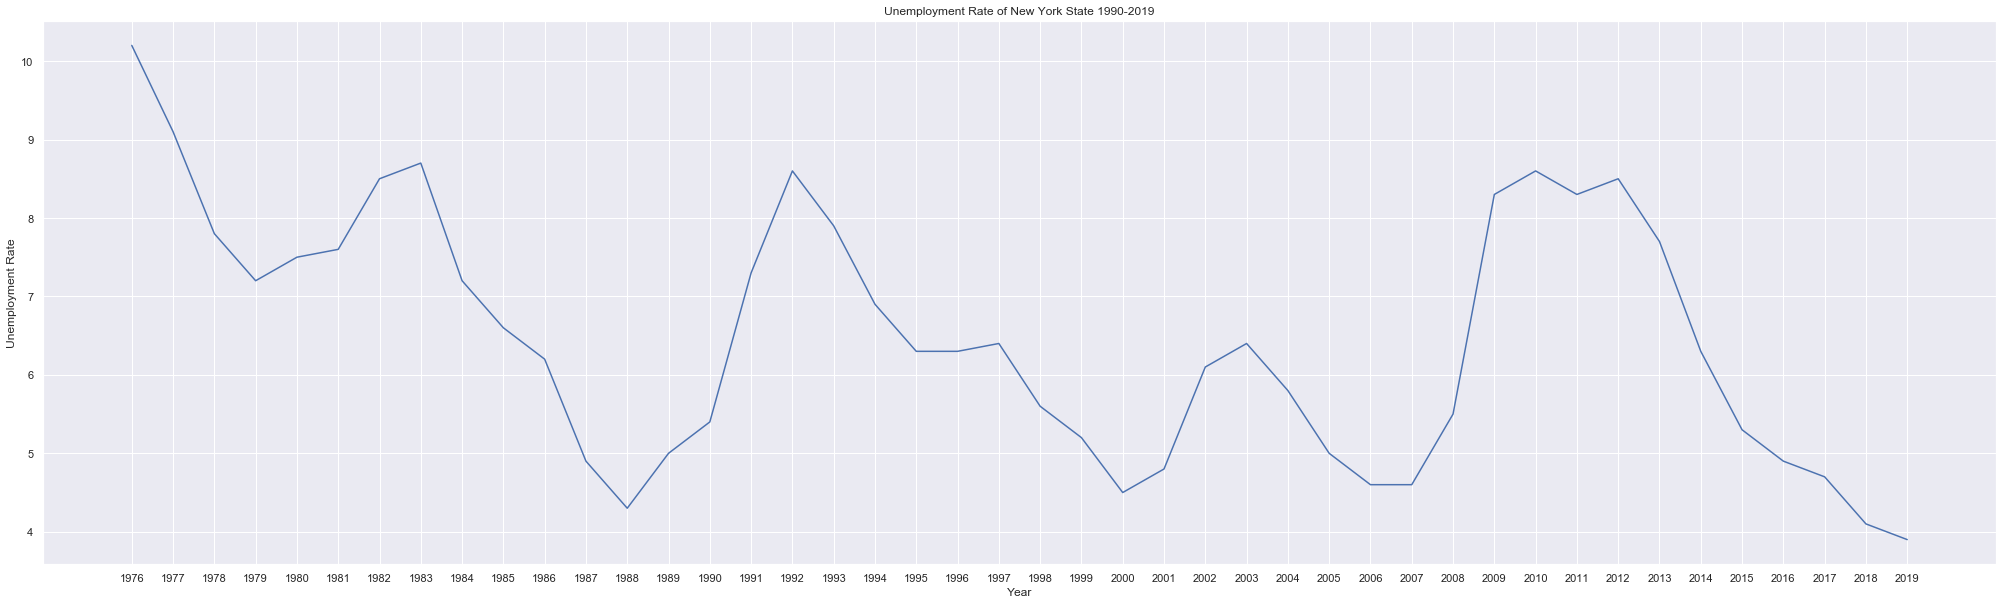

In [463]:
unempNYS = unempNYS.rename({'1976-01-01':'1976', '1977-01-01':'1977', '1978-01-01':'1978', '1979-01-01':'1979','1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
unempNYS = unempNYS.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
unempNYS = unempNYS.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
unempNYS = unempNYS.dropna()
unempNYS = unempNYS.set_index('observation_date')
unempNYS
sns.lineplot(x = unempNYS.index, y = unempNYS['NYS'])
plt.title('Unemployment Rate of New York State 1990-2019')
plt.ylabel('Unemployment Rate')
plt.xlabel('Year')
plt.savefig('Unemployment Rate of New York State 1990-2019')
plt.show()

In [464]:
all_unemp = pd.merge(unemp_data, unempNYS, left_index = True, right_index = True, how = 'inner')
all_unemp.head()

New York County  Westchester County  Putnam County  \
observation_date                                                       
1990                          6.0                 3.5            3.3   
1991                          7.7                 5.4            5.3   
1992                          9.4                 6.2            6.0   
1993                          9.0                 5.5            5.3   
1994                          7.6                 4.9            4.7   

                  Suffolk County  Rockland County  Saratoga County  NYS  
observation_date                                                         
1990                         4.4              3.3              3.6  5.4  
1991                         6.9              5.6              5.5  7.3  
1992                         8.2              6.4              5.8  8.6  
1993                         7.3              6.2              5.0  7.9  
1994                         6.2              5.3              4.8  6.9

In [465]:
#However, we can more easily visualize the correlation with a correlation graph!
unemp_correlation = all_unemp.corr()
unemp_correlation

New York County  Westchester County  Putnam County  \
New York County            1.000000            0.648657       0.598870   
Westchester County         0.648657            1.000000       0.992942   
Putnam County              0.598870            0.992942       1.000000   
Suffolk County             0.775882            0.939417       0.939349   
Rockland County            0.714642            0.984661       0.977463   
Saratoga County            0.698624            0.972582       0.967162   
NYS                        0.922810            0.878169       0.849972   

                    Suffolk County  Rockland County  Saratoga County       NYS  
New York County           0.775882         0.714642         0.698624  0.922810  
Westchester County        0.939417         0.984661         0.972582  0.878169  
Putnam County             0.939349         0.977463         0.967162  0.849972  
Suffolk County            1.000000         0.967183         0.951639  0.940321  
Rockland County           0.967183         1.000000         0.980797  0.919665  
Saratoga County           0.951639         0.980797         1.000000  0.913060  
NYS                       0.940321         0.919665         0.913060  1.000000

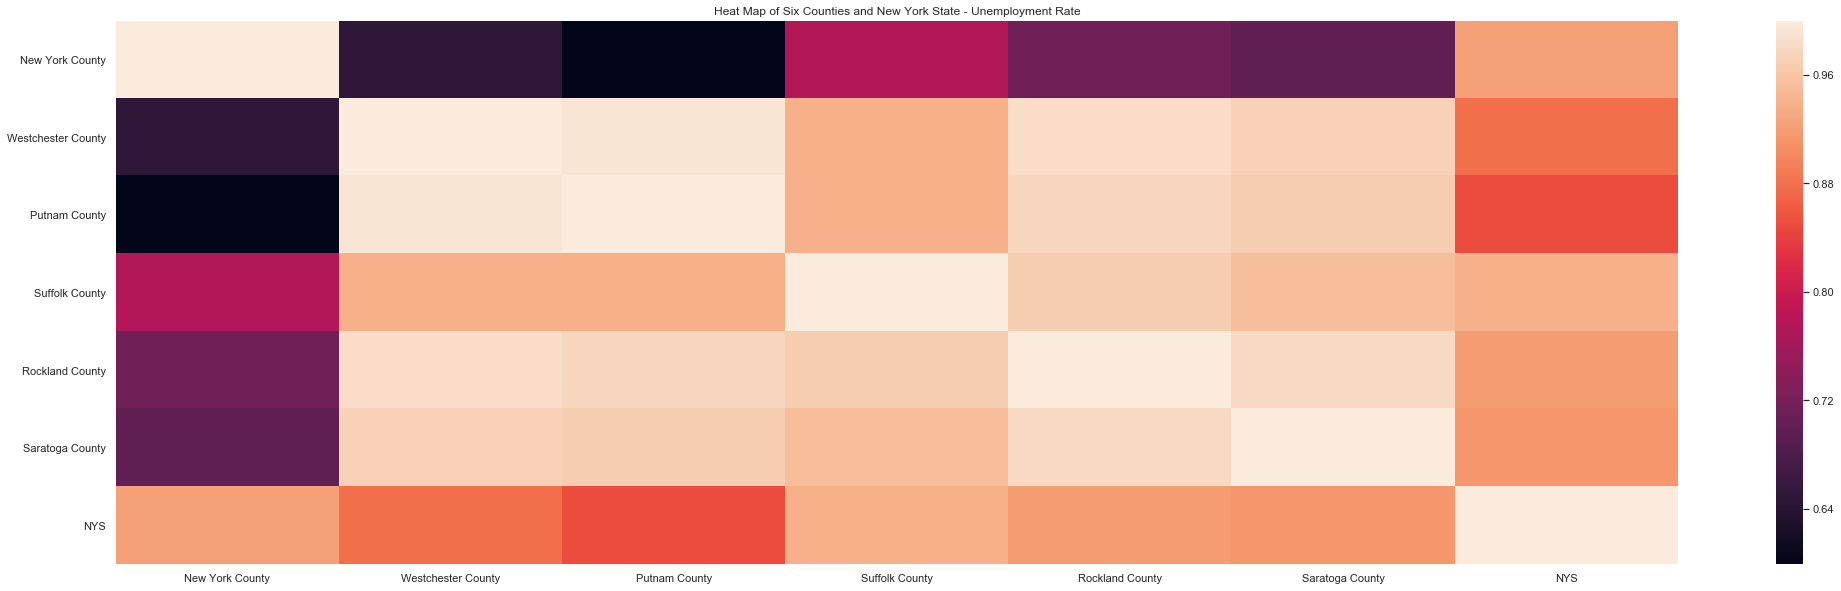

In [466]:
sns.heatmap(unemp_correlation)
plt.savefig('Heat Map of Six Counties and New York State - Unemployment Rate')
plt.title('Heat Map of Six Counties and New York State - Unemployment Rate')
plt.show()

From the graphs in 2d, the following may be concluded:
        Unemployment trends between NYS and the remaining 6 counties was greatest in Suffolk County 
        Trends the least between New York State and Putnam County

I am risk averse, thus, I will not enjoy my county to be strongly and weakly correlated with overall economic trends of NYS. Thus, I eliminated the outliers of these results.
If unemployment increases or decreases, I would like to be as stable as possible, and minimize any
"swings" in the economy of my county.

I will eliminate the strongest, Suffolk (0.940321).
I will elimate the weakest, Putnam (0.849972).

This leaves (In no particular order):
1. New York County
2. Westchester County
3. Rockland County

# Step 2e: HPI Data (Housing Price Index)

In [467]:
hpi_data
hpi_data = hpi_data.rename({'observation_date':'Observation Date','1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'})
hpi_data = hpi_data.rename({'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018'})
hpi_data = hpi_data.rename({'2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
hpi_data = hpi_data[['New York County', 'Westchester County', 'Saratoga County', 'Rockland County', 'Putnam County', 'Suffolk County']]
hpi_data.head()
#We do not want to drop NA here, because we would lose other data

New York County  Westchester County  Saratoga County  \
observation_date                                                         
1980                          NaN               27.22            44.90   
1981                          NaN               31.50            42.63   
1982                          NaN               34.53            41.85   
1983                          NaN               36.67            49.17   
1984                          NaN               43.82            54.23   

                  Rockland County  Putnam County  Suffolk County  
observation_date                                                  
1980                        29.84          29.56           23.94  
1981                        33.25          32.61           28.02  
1982                        35.26          38.09           33.26  
1983                        38.63          40.01           36.38  
1984                        45.37          47.87           43.44

In [468]:
hpiNYS = hpiNYS.set_index('observation_date')
hpiNYS = hpiNYS.rename({'1980-01-01':'1980','1981-01-01':'1981','1982-01-01':'1982','1983-01-01':'1983', '1984-01-01':'1984', '1985-01-01':'1985', '1986-01-01':'1986', '1987-01-01':'1987', '1988-01-01':'1988', '1989-01-01':'1989', '1990-01-01':'1990', '1991-01-01':'1991', '1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994', '1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997', '1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000',
                       '2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003', '2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006', '2007-01-01':'2007', '2017-01-01':'2017', '2018-01-01':'2018',
                       '2008-01-01':'2008', '2009-01-01':'2009', '2010-01-01':'2010', '2011-01-01':'2011', '2012-01-01':'2012', '2013-01-01':'2013', '2014-01-01':'2014', '2015-01-01':'2015', '2016-01-01':'2016', '2019-01-01':'2019'})
hpiNYS = hpiNYS.dropna()
hpiNYS.head()

New York State
observation_date                
1980                      108.26
1981                      112.97
1982                      129.28
1983                      136.86
1984                      159.73

In [469]:
all_hpi = pd.merge(hpi_data, hpiNYS, left_index = True, right_index = True, how = 'outer')
all_hpi.head()

New York County  Westchester County  Saratoga County  \
observation_date                                                         
1980                          NaN               27.22            44.90   
1981                          NaN               31.50            42.63   
1982                          NaN               34.53            41.85   
1983                          NaN               36.67            49.17   
1984                          NaN               43.82            54.23   

                  Rockland County  Putnam County  Suffolk County  \
observation_date                                                   
1980                        29.84          29.56           23.94   
1981                        33.25          32.61           28.02   
1982                        35.26          38.09           33.26   
1983                        38.63          40.01           36.38   
1984                        45.37          47.87           43.44   

                  New York State  
observation_date                  
1980                      108.26  
1981                      112.97  
1982                      129.28  
1983                      136.86  
1984                      159.73

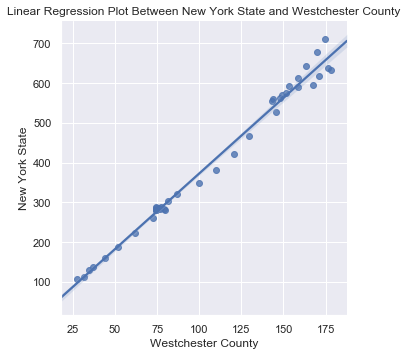

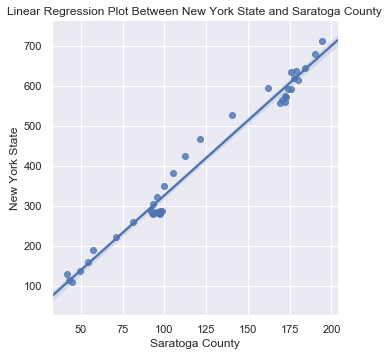

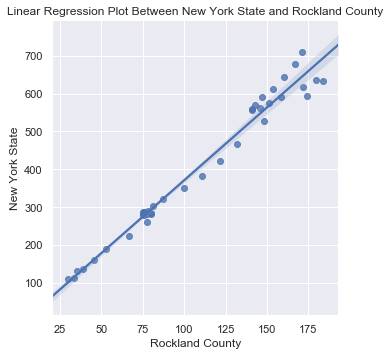

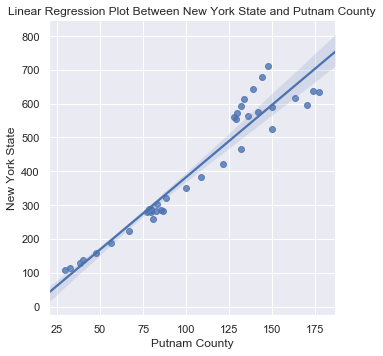

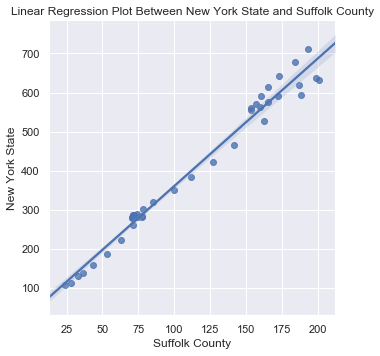

In [470]:
def lm_plot_hpi(str):
    sns.lmplot(y='New York State', x=str, data = all_hpi)
    plt.title('Linear Regression Plot Between New York State and' + ' ' + str)
    plt.savefig('Linear Regression Plot Between New York State and' + ' ' + str)
    plt.show
six_counties_and_NYS = ['Westchester County', 'Saratoga County', 'Rockland County', 'Putnam County', 'Suffolk County']
for six in six_counties_and_NYS:
    lm_plot_hpi(six)

In [471]:
#These plots are too close to extract findings, let's bring out numeric data

In [472]:
#Let's create another correlation map:
hpi_correlation = all_hpi.corr()
hpi_correlation

New York County  Westchester County  Saratoga County  \
New York County            1.000000            0.820656         0.962797   
Westchester County         0.820656            1.000000         0.977340   
Saratoga County            0.962797            0.977340         1.000000   
Rockland County            0.766938            0.998415         0.967801   
Putnam County              0.662124            0.983556         0.936632   
Suffolk County             0.789076            0.997642         0.967650   
New York State             0.898662            0.994433         0.989905   

                    Rockland County  Putnam County  Suffolk County  \
New York County            0.766938       0.662124        0.789076   
Westchester County         0.998415       0.983556        0.997642   
Saratoga County            0.967801       0.936632        0.967650   
Rockland County            1.000000       0.990479        0.998411   
Putnam County              0.990479       1.000000        0.985238   
Suffolk County             0.998411       0.985238        1.000000   
New York State             0.988598       0.961865        0.989819   

                    New York State  
New York County           0.898662  
Westchester County        0.994433  
Saratoga County           0.989905  
Rockland County           0.988598  
Putnam County             0.961865  
Suffolk County            0.989819  
New York State            1.000000

In [473]:
sns.heatmap(hpi_correlation)
plt.savefig('Heat Map of Six Counties and New York State - HPI')
plt.title('Heat Map of Six Counties and New York State - HPI')
plt.show()

I am risk averse, thus, I will not enjoy my county being strongly or weakly correlated with the overall trends of HPI of NYS. However, I would like my counties to be on the less-risky side, since that means it has an overall stable housing market

Top Three (In no particular order):
1. New York County
2. Putnam County
3. Rockland County

Combining the Top Three, I will take the most frequent top two:
    New York County vs. Rockland County

# What I Know:
These two counties, New York and Rockland, both:

1. Increased their population as more people moved into NY (2a). This means that many people are attracted to these counties for one or more reasons. Regardless, I want the hustle and bustle, so I am satisfied with this requirement.
            
2/3. (Data Scientist Salary Insight and Tech Jobs)
Per (https://www.glassdoor.com/Salaries/new-york-state-data-scientist-salary-SRCH_IL.0,14_IS428_KO15,29.htm?clickSource=searchBtn), my hypothetical scenario allows me to earn a Data Science salary above average. Thus, to be realistic in my hypothetical scenario, I would most likely move to one of these areas to follow areas of higher-paying jobs.
            
4. Unemployment: showed stable correlation with NYS

5. HPI: showed least correlation, less risky with NYS
                

At the moment, I could pick either New York County or Rockland County to live in. However, I have decided to add some subjectivity to this choice.

# A bit more subjective:

** The section below was used from lecture. The best way for me to learn a concept is by going
through the motions and applying it to my own example, thus, I have used the lecture code.

In [479]:
import requests
from bs4 import BeautifulSoup

Favorite Coffee:
Starbucks

Fast Food:
Pret A Manger

Bank:
Capital One

In [480]:
import_coffee_rockland = requests.get("https://www.yellowpages.com/search?search_terms=coffee&geo_location_terms=Rockland+County%2C+NY")
import_coffee_new_york = requests.get("https://www.yellowpages.com/search?search_terms=coffee&geo_location_terms=New+York%2C+NY")

In [481]:
import_ff_rockland = requests.get("https://www.yellowpages.com/search?search_terms=fast+food&geo_location_terms=rockland+county%2C+ny")
import_ff_new_york = requests.get("https://www.yellowpages.com/search?search_terms=fast+food&geo_location_terms=new+york%2C+NY")

In [482]:
import_banks_rockland = requests.get("https://www.yellowpages.com/search?search_terms=banks&geo_location_terms=rockland+county%2C+ny")
import_banks_new_york = requests.get("https://www.yellowpages.com/search?search_terms=banks&geo_location_terms=new+york%2C+ny")

In [483]:
type(import_coffee_rockland)

requests.models.Response

In [484]:
def read_content(a):
    a.content #everything loaded
    soup = BeautifulSoup(a.content) #creating and reading the soup variable
    soup.prettify() #adds indentation, don't need for this purpose, but following lecture notes
    soup.find_all("a") #list all the anchor tags (<a>)
    print(soup.find_all("h1")) #get all the h1 tags
    
    for link in soup.find_all("a"):
           link.get("href"), '*****', link.text  #Find all the links
        
    for link in soup.find_all("a"):
        print("<a href= '%s'>%s</a>" %(link.get("href"), link.text)) #get all links and display in proper format
        
    for link in soup.find_all("a"):
        print("<a href='{}'>{}</a>".format(link.get("href"), link.text)) #same result as above, but teaching myself from lecture
        
    g_data = soup.find_all('div', attrs={'class':'info'}) #createa a variable and get the coffee stores' information
        
    for item in g_data: #print each coffee shop
            print(item.text)
    
    for item in g_data: #get items as a list
            print(item.contents[3])
    
    for item in g_data: #print the 0th element content and text 
            print(item.contents[0])
    
    print('************************')

    for item in g_data: #print the 0th element content and text 
            print(item.contents[0].text)
    
    for item in g_data: #name and address of the places
            print(item.contents[0].text)
            print(item.contents[2].text)
    
    import csv

    coffeefile = open('coffee.csv', 'w') #import, open, and separate the file by commas
    coffeewriter = csv.writer(coffeefile, delimiter=',')

    for item in g_data: #properly formatting the name, address, location, and phone for easy parsing
            item1 = (item.contents[0].find_all("a", attrs={"class":"business-name"})[0].text)
            print(item1)
            item2 = (item.contents[2].find_all("div", {'class':'street-address'})[0].text)
            print(item2)
            item3 = (item.contents[2].find_all("div", {'class':'locality'})[0].text)
            print(item3)
            item4 = (item.contents[2].find_all("div", {'class':'phone'})[0].text)
            print(item4)
            print()
    coffeewriter.writerow([item1, item2, item3, item4])


# Rockland County

In [485]:
read_content(import_coffee_rockland)

[<h1>Coffee in New City, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-city-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-city-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-city-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-city-

In [486]:
read_content(import_banks_rockland)

[<h1>Banks in New City, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-city-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-city-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-city-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-city-n

IndexError: list index out of range

In [487]:
read_content(import_ff_rockland)

[<h1>Fast Food in New City, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-city-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-city-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-city-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-city-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-city-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-city-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-city-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-ci

# Rockland County - Results

Does it have my favorite coffee shops?
Yes

Does it have my favorite fast food chains?
**No**

Does it have my banks?
Yes

# New York County

In [488]:
read_content(import_coffee_new_york)

[<h1>Coffee in New York, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-york-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-york-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-york-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-york-

In [489]:
read_content(import_ff_new_york)

[<h1>Fast Food in New York, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-york-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-york-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-york-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-yo

IndexError: list index out of range

In [490]:
read_content(import_banks_new_york)

[<h1>Banks in New York, NY</h1>]
<a href= '/'></a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-body-shops'>Auto Body Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-glass-repair'>Auto Glass Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-parts'>Auto Parts</a>
<a href= 'https://www.yellowpages.com/new-york-ny/auto-repair'>Auto Repair</a>
<a href= 'https://www.yellowpages.com/new-york-ny/car-detailing'>Car Detailing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/oil-change'>Oil Change</a>
<a href= 'https://www.yellowpages.com/new-york-ny/roadside-assistance'>Roadside Assistance</a>
<a href= 'https://www.yellowpages.com/new-york-ny/tire-shops'>Tire Shops</a>
<a href= 'https://www.yellowpages.com/new-york-ny/towing'>Towing</a>
<a href= 'https://www.yellowpages.com/new-york-ny/window-tinting'>Window Tinting</a>
<a href= 'https://www.yellowpages.com/new-york-ny/barber-shops'>Barber Shops</a>
<a href= 'https://www.yellowpages.com/new-york-n

IndexError: list index out of range

# New York County - Results

Does it have my favorite coffee shop?
**Yes**

Does it have my favorite fast food chain?
**Yes**

Does it have my bank?
**Yes**

# And the winner is....

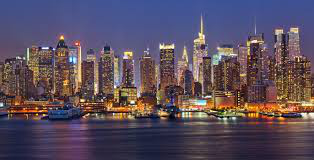

In [491]:
from PIL import Image
import os
night_image = Image.open('Manhattan_Night.jpeg')
night_image



NEW YORK COUNTY (Manhattan)

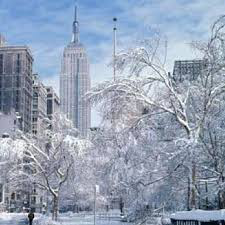

In [492]:
day_image = Image.open('Manhattan_Winter.jpeg')
day_image

Although this county passed my numeric and subjective tests, its photographs are also very pleasant.

I am happy with my choice.

# Final words about this conclusion are located in my powerpoint

# Clarification on Unemployment Definition

It is important to remember the definition of Unemployable (persons not available to be counted in the labor force). More importantly, it is important to recocgnize those who are unemployed BUT NOT considered in the unemployment ratio:
- Unemployed: Those who would like to work, or are avaiable to work, but are not employed. 
- Not employed, and not considered in the unemployment measure:
        - Those who are not looking for work
        - Students
        - Stay-at-home makers
        - Retirees
        - Anyone younger than 16

# Sources Used - Works Cited

FRED Database (Definitions of each variable are located within the FRED database when downloading data): https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/#:~:text=in%20your%20browser.-,What%20is%20FRED%3F,Federal%20Reserve%20Bank%20of%20St.

Unemployment Definition Disclaimer: https://www.investopedia.com/terms/u/unemployment.asp I was also an Economics major in undergraduate, so this terms is very familiar to me

Sentdex - matplotlib - pandas

Data School - Youtube - Pandas

Stack Overflow

https://seaborn.pydata.org/generated/seaborn.lmplot.html (Seaborn Library)

Class lecture (Again, the web scraping was used from class)

Data Scientist Average Salary Numbers: https://www.glassdoor.com/Salaries/new-york-state-data-scientist-salary-SRCH_IL.0,14_IS428_KO15,29.htm?clickSource=searchBtn